<a href="https://colab.research.google.com/github/tivanello/fase2/blob/main/notebooks%5CFINAL_TECH_CHALLENGE_FASE_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
# Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data

# Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no
modelo.

# Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

# Entregas Esperadas
Você deverá apresentar ao time de investimentos:
Storytelling Técnico
Apresentação com os seguintes requisitos:
• Aquisição e exploração dos dados;
• Estratégia de engenharia de atributos, caso seja realizado (por exemplo: variações, médias móveis, etc)
• Preparação da base para previsão (definição de target, janela de tempo, etc.);
• Escolha e justificativa do modelo utilizado;
• Resultados e análise de métricas que garantem que o modelo está confiável;

# Justificativa Técnica
Explique claramente:
• Por que você escolheu o(s) modelo(s) utilizados (ex: árvores, regressão logística, LSTM, etc.);
• Como tratou a natureza sequencial dos dados (ex: janelas deslizantes, features lagged);
• Quais os trade-offs entre acuracidade e overfitting.

#Quais documentos devo subir na plataforma? As entregas deverão conter necessariamente:
• Uma pasta zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub com seu projeto.
• Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas da sua preferência, como o CANVAS, por exemplo.
• Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Note que é necessário que todos os membros do grupo apareçam no vídeo.

**Dica: Utilize o maior intervalo de tempo possível para atingir maior  acuracidade no modelo preditivo.**

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas oportunidades para discutir sobre as dificuldades encontradas, além de pegar dicas valiosas com especialistas e colegas de turma. Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

**Importação dos arquivos.**

 tentei importar toda a série histórica, à partir de 01/08/1994,  porém o arquivo vinha apenas até 10/10/2014. Como solução realizei a importação de  dois arquivos e realizada junção dos dois nas linhas de comando abaixo. Iremos trabalhar com o arquivo com a série hitórica de 01/08/1994 até 01/08/2025

In [236]:
%cd /content
!rm -rf fase2
!git clone https://github.com/tivanello/fase2.git
!ls -la /content/fase2
!ls -la /content/fase2/data
!ls -la "/content/fase2/data/raw"


/content
Cloning into 'fase2'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 69 (delta 25), reused 29 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (69/69), 4.08 MiB | 10.04 MiB/s, done.
Resolving deltas: 100% (25/25), done.
total 28
drwxr-xr-x 5 root root 4096 Jan 11 01:32 .
drwxr-xr-x 1 root root 4096 Jan 11 01:32 ..
drwxr-xr-x 3 root root 4096 Jan 11 01:32 data
drwxr-xr-x 8 root root 4096 Jan 11 01:32 .git
-rw-r--r-- 1 root root  294 Jan 11 01:32 .gitignore
drwxr-xr-x 2 root root 4096 Jan 11 01:32 notebooks
-rw-r--r-- 1 root root    8 Jan 11 01:32 README.md
total 12
drwxr-xr-x 3 root root 4096 Jan 11 01:32 .
drwxr-xr-x 5 root root 4096 Jan 11 01:32 ..
drwxr-xr-x 2 root root 4096 Jan 11 01:32 raw
total 512
drwxr-xr-x 2 root root   4096 Jan 11 01:32  .
drwxr-xr-x 3 root root   4096 Jan 11 01:32  ..
-rw-r--r-- 1 root root 183966 Jan 11 01:32 'Dados Históricos - Ibovespa 1

In [237]:
import os
import pandas as pd

# 1) Clona o repositório (uma vez por sessão)
REPO_URL = "https://github.com/tivanello/fase2.git"
PASTA_REPO = "/content/fase2"

if not os.path.exists(PASTA_REPO):
    !git clone {REPO_URL} {PASTA_REPO}

# 2) Caminhos dentro do repo (exemplo: data/raw)
arquivo1 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 11-10-2014 16-09-2025.csv"
arquivo2 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 1994 10-10-2014.csv"

# 3) Carrega e unifica
df1 = pd.read_csv(arquivo1, thousands='.', decimal=',')
df2 = pd.read_csv(arquivo2, thousands='.', decimal=',')

df_ibovespa_baixado = pd.concat([df1, df2], ignore_index=True)
df_ibovespa_baixado.head()






,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16092025,144062,143547,144584,143547,"8,48B","0,36%"
1,15092025,143547,142292,144194,142292,"6,61B","0,90%"
2,12092025,142272,143151,143202,142241,"6,39B","-0,61%"
3,11092025,143151,142349,144013,142349,"7,57B","0,56%"
4,10092025,142349,141612,143182,141612,"7,14B","0,52%"


In [238]:
# df para trabalho, resgardado o ddf baixado do GIT
df_ibovespa = df_ibovespa_baixado.copy()
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,16092025,144062,143547,144584,143547,"8,48B","0,36%"
1,15092025,143547,142292,144194,142292,"6,61B","0,90%"
2,12092025,142272,143151,143202,142241,"6,39B","-0,61%"
3,11092025,143151,142349,144013,142349,"7,57B","0,56%"
4,10092025,142349,141612,143182,141612,"7,14B","0,52%"


Alterar os nomes das colunas retirando o maiusculo e acentuação e Vol. para volume e Var% para variacao. Será necessário instalar a biblioteca unicode ( biblioteca Python que remove acentos e caracteres especiais, convertendo textos para versões ASCII simples)


In [107]:
pip install unidecode

In [239]:
import unidecode

# Renomeia colunas: remove acentos e converte para minúsculas
df_ibovespa.columns = [unidecode.unidecode(col).lower().replace('vol.', 'volume').replace('var%', 'variacao') for col in df_ibovespa.columns]

# Visualiza o novo nome das colunas
print(df_ibovespa.columns)

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')


In [240]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,16092025,144062,143547,144584,143547,"8,48B","0,36%"
1,15092025,143547,142292,144194,142292,"6,61B","0,90%"
2,12092025,142272,143151,143202,142241,"6,39B","-0,61%"
3,11092025,143151,142349,144013,142349,"7,57B","0,56%"
4,10092025,142349,141612,143182,141612,"7,14B","0,52%"


Analisando o arquivo notei que a data não esta no formato correto, sendo necessária a sua formação


In [241]:
# Corrige a coluna 'data' para string de 8 dígitos (DDMMYYYY)
df_ibovespa['data'] = df_ibovespa['data'].astype(str).str.zfill(8)
df_ibovespa['data'] = pd.to_datetime(df_ibovespa['data'], format='%d%m%Y')

# Ordena por data
df_ibovespa = df_ibovespa.sort_values(by='data').reset_index(drop=True)



In [234]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_pct,variacao_dec,fechamento_amanha,tendencia
7777,2025-12-19,158473.0,157928.0,159552.0,157906.0,9.950000e+09,0.35,0.35,0.0035,158142.0,0
7778,2025-12-22,158142.0,158480.0,158634.0,157306.0,8.420000e+09,-0.21,-0.21,-0.0021,160456.0,1
7779,2025-12-23,160456.0,158144.0,160456.0,158144.0,6.570000e+09,1.46,1.46,0.0146,160897.0,1
7780,2025-12-26,160897.0,160456.0,160913.0,159359.0,4.790000e+09,0.27,0.27,0.0027,160490.0,0
7781,2025-12-29,160490.0,160897.0,161133.0,159702.0,5.610000e+09,-0.25,-0.25,-0.0025,161125.0,1


In [242]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao
7706,2025-09-10,142349,141612,143182,141612,"7,14B","0,52%"
7707,2025-09-11,143151,142349,144013,142349,"7,57B","0,56%"
7708,2025-09-12,142272,143151,143202,142241,"6,39B","-0,61%"
7709,2025-09-15,143547,142292,144194,142292,"6,61B","0,90%"
7710,2025-09-16,144062,143547,144584,143547,"8,48B","0,36%"


Verificando a formatação de cada coluna e se existem campos vazios ou nulos

In [243]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7711 non-null   datetime64[ns]
 1   ultimo    7711 non-null   int64         
 2   abertura  7711 non-null   int64         
 3   maxima    7711 non-null   int64         
 4   minima    7711 non-null   int64         
 5   volume    7710 non-null   object        
 6   variacao  7711 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 421.8+ KB


In [244]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,1
variacao,0


In [245]:
df_ibovespa[df_ibovespa["volume"].isnull()]

,data,ultimo,abertura,maxima,minima,volume,variacao
5324,2016-02-10,40377,40592,40592,39960,NaN,"-0,53%"


Como verificado há necessidade de corrigir um valor nulo (sem dado) de volume. Será incluido o valor do ultimo pregão do dia 05/02/2016 que teve a mesma variação
Além disso será necessário alterar o a formatação das colunas ultimo,   abertura, maxima, minima e volume. que estão int64 e object para float64. A coluna variacao de object para float, com formatação em % e data_br de object para date


In [246]:
# função para converter o dados da coluna volume em valor
def converter_volume(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.').strip()
        if valor.endswith('K'):
            return float(valor.replace('K', '')) * 1e3
        elif valor.endswith('M'):
            return float(valor.replace('M', '')) * 1e6
        elif valor.endswith('B'):
            return float(valor.replace('B', '')) * 1e9
        else:
            return float(valor)
    return valor  # já numérico

# Aplicar a função
df_ibovespa['volume'] = df_ibovespa['volume'].apply(converter_volume)

# Preencher valores ausentes com o valor da linha anterior
df_ibovespa['volume'] = df_ibovespa['volume'].apply(converter_volume)
df_ibovespa['volume'] = pd.to_numeric(df_ibovespa['volume'], errors='coerce')
df_ibovespa['volume'] = df_ibovespa['volume'].ffill()




In [247]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152,4201,4223,4091,5.390000e+09,"-1,17%"
1,1994-08-02,4311,4152,4311,4152,6.630000e+09,"3,83%"
2,1994-08-03,4392,4311,4426,4275,6.880000e+09,"1,88%"
3,1994-08-04,4355,4392,4406,4321,5.670000e+09,"-0,84%"
4,1994-08-05,4470,4355,4476,4329,5.140000e+09,"2,64%"


In [248]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7711 non-null   datetime64[ns]
 1   ultimo    7711 non-null   int64         
 2   abertura  7711 non-null   int64         
 3   maxima    7711 non-null   int64         
 4   minima    7711 non-null   int64         
 5   volume    7711 non-null   float64       
 6   variacao  7711 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 421.8+ KB


In [249]:
#Converter colunas ['ultimo', 'abertura', 'maxima', 'minima'] para float64

colunas_float = ['ultimo', 'abertura', 'maxima', 'minima']
df_ibovespa[colunas_float] = df_ibovespa[colunas_float].astype(float)


In [250]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,"-1,17%"
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,"3,83%"
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,"1,88%"
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,"-0,84%"
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,"2,64%"


In [251]:
df_ibovespa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7711 non-null   datetime64[ns]
 1   ultimo    7711 non-null   float64       
 2   abertura  7711 non-null   float64       
 3   maxima    7711 non-null   float64       
 4   minima    7711 non-null   float64       
 5   volume    7711 non-null   float64       
 6   variacao  7711 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 421.8+ KB


In [252]:
# Converte o cnteúdo da coluna variacao para float, respeitando o percentual -1.17% = 0.0117

s = df_ibovespa['variacao'].astype(str).str.strip().str.replace('%', '', regex=False)

# se tiver vírgula, converte PT-BR para padrão numérico
s = s.where(
    ~s.str.contains(',', na=False),
    s.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
)

df_ibovespa['variacao'] = pd.to_numeric(s, errors='coerce')

# formatos corretos
df_ibovespa['variacao_pct'] = df_ibovespa['variacao']          # -1.17  (% em pontos)
df_ibovespa['variacao_dec'] = df_ibovespa['variacao'] / 100    # -0.0117 (decimal)


In [253]:
df_ibovespa.info()
df_ibovespa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          7711 non-null   datetime64[ns]
 1   ultimo        7711 non-null   float64       
 2   abertura      7711 non-null   float64       
 3   maxima        7711 non-null   float64       
 4   minima        7711 non-null   float64       
 5   volume        7711 non-null   float64       
 6   variacao      7711 non-null   float64       
 7   variacao_pct  7711 non-null   float64       
 8   variacao_dec  7711 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 542.3 KB


,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_pct,variacao_dec
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,-1.17,-1.17,-0.0117
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,3.83,3.83,0.0383
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,1.88,1.88,0.0188
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,-0.84,-0.84,-0.0084
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,2.64,2.64,0.0264


In [254]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,0
variacao,0
variacao_pct,0
variacao_dec,0


Necessidade de criar a minha variável de tendência, onde:

1 = O fechamento do IBOVESPA no dia seguinte será maior que o de hoje (alta)

0 = O fechamento do IBOVESPA no dia seguinte será igual ou menor que o de hoje (sem alta)

In [255]:
# Criar o fechamento do dia seguinte

df_ibovespa = df_ibovespa.sort_values('data').reset_index(drop=True)

df_ibovespa['fechamento_amanha'] = df_ibovespa['ultimo'].shift(-1)

# Criar a variável de tendência (target)

df_ibovespa['tendencia'] = (df_ibovespa['fechamento_amanha'] > df_ibovespa['ultimo']).astype(int)

# remover a última linha (Será desconsiderado pois não há vomo prever a target, já que não há valor do dia seguinte)

df_ibovespa = df_ibovespa.dropna(subset=['fechamento_amanha']).reset_index(drop=True)

df_ibovespa.tail()



,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_pct,variacao_dec,fechamento_amanha,tendencia
7705,2025-09-09,141618.0,141794.0,142286.0,141605.0,7.480000e+09,-0.12,-0.12,-0.0012,142349.0,1
7706,2025-09-10,142349.0,141612.0,143182.0,141612.0,7.140000e+09,0.52,0.52,0.0052,143151.0,1
7707,2025-09-11,143151.0,142349.0,144013.0,142349.0,7.570000e+09,0.56,0.56,0.0056,142272.0,0
7708,2025-09-12,142272.0,143151.0,143202.0,142241.0,6.390000e+09,-0.61,-0.61,-0.0061,143547.0,1
7709,2025-09-15,143547.0,142292.0,144194.0,142292.0,6.610000e+09,0.90,0.90,0.0090,144062.0,1


In [256]:
# Quantidade + percentual do target (tendência)

dist = df_ibovespa['tendencia'].value_counts(dropna=False).sort_index()
pct  = df_ibovespa['tendencia'].value_counts(normalize=True, dropna=False).sort_index() * 100

resultado = pd.DataFrame({
    'qtd': dist,
    'pct_%': pct.round(2)
})

resultado.rename(index={0: '0 (sem alta)', 1: '1 (alta)'})


,qtd,pct_%
tendencia,,
0 (sem alta),3690,47.86
1 (alta),4020,52.14


In [257]:
# garantir ordenação
df_ibovespa = df_ibovespa.sort_values('data').reset_index(drop=True)

# últimos 30 registros (dias úteis de pregão, na prática)
df_30 = df_ibovespa.tail(30)

# distribuição (qtd e %)
dist = df_30['tendencia'].value_counts().sort_index()
pct  = df_30['tendencia'].value_counts(normalize=True).sort_index() * 100

resultado_30 = pd.DataFrame({
    'qtd': dist,
    'pct_%': pct.round(2)
}).rename(index={0:'0 (sem alta)', 1:'1 (alta)'})

resultado_30


,qtd,pct_%
tendencia,,
0 (sem alta),14,46.67
1 (alta),16,53.33


In [261]:
# Sanidade básica do dataset
# A partir desse pontos será utilizado o data frame "df"

df = df_ibovespa.sort_values('data').reset_index(drop=True)

print("Período:", df['data'].min().date(), "até", df['data'].max().date())
print("Linhas:", len(df))
print("\nNulos por coluna:")
print(df.isna().sum())

print("\nDtypes:")
print(df.dtypes)


Período: 1994-08-01 até 2025-09-15
Linhas: 7710

Nulos por coluna:
data                 0
ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao             0
variacao_pct         0
variacao_dec         0
fechamento_amanha    0
tendencia            0
dtype: int64

Dtypes:
data                 datetime64[ns]
ultimo                      float64
abertura                    float64
maxima                      float64
minima                      float64
volume                      float64
variacao                    float64
variacao_pct                float64
variacao_dec                float64
fechamento_amanha           float64
tendencia                     int64
dtype: object


In [262]:
# Validar “variacao_dec” contra retorno calculado do preço

df['ret_calc'] = df['ultimo'].pct_change()  # retorno calculado
df['dif_ret'] = df['ret_calc'] - df['variacao_dec']

df[['data','ultimo','variacao_dec','ret_calc','dif_ret']].tail(10)


,data,ultimo,variacao_dec,ret_calc,dif_ret
7700,2025-09-02,140335.0,-0.0067,-0.006710,-0.000010
7701,2025-09-03,139864.0,-0.0034,-0.003356,0.000044
7702,2025-09-04,140993.0,0.0081,0.008072,-0.000028
7703,2025-09-05,142640.0,0.0117,0.011681,-0.000019
7704,2025-09-08,141792.0,-0.0059,-0.005945,-0.000045
7705,2025-09-09,141618.0,-0.0012,-0.001227,-0.000027
7706,2025-09-10,142349.0,0.0052,0.005162,-0.000038
7707,2025-09-11,143151.0,0.0056,0.005634,0.000034
7708,2025-09-12,142272.0,-0.0061,-0.006140,-0.000040
7709,2025-09-15,143547.0,0.0090,0.008962,-0.000038


In [263]:
df['dif_ret'].describe()


,dif_ret
count,7.709000e+03
mean,2.487978e-07
std,2.840524e-05
min,-5.422325e-05
25%,-2.413466e-05
50%,6.977758e-07
75%,2.447281e-05
max,5.752449e-05


In [265]:
# Checar outliers rápidos (principalmente volume)

q = df['volume'].quantile([0.01, 0.05, 0.95, 0.99])
q


,volume
0.01,1.070900e+06
0.05,1.594500e+06
0.95,1.112000e+10
0.99,1.643550e+10


## Interpretação dos percentis do volume (outliers rápidos)

Esse cálculo mostra percentis do volume para entender o comportamento típico e identificar picos.

- 1% = 1.070.900  
  Em 1% dos dias, o volume foi menor ou igual a ~1,07 milhão (dias de volume bem baixo).

- 5% = 1.594.500  
  Em 5% dos dias, o volume foi menor ou igual a ~1,59 milhão.

- 95% = 11.120.000.000  
  Em 95% dos dias, o volume foi menor ou igual a ~11,12 bilhões.

- 99% = 16.435.500.000  
  Em 99% dos dias, o volume foi menor ou igual a ~16,44 bilhões.  
  Portanto, apenas 1% dos dias fica acima disso (picos de volume).

Conclusão: o volume tem “cauda longa” (poucos dias com volumes muito altos), o que caracteriza presença de outliers no topo. - Gráfico abaixo

Ações comuns antes da modelagem:
- aplicar logaritmo para reduzir o impacto dos picos: log_volume = log1p(volume)
- ou padronizar/normalizar as variáveis (Scaler), dependendo do modelo

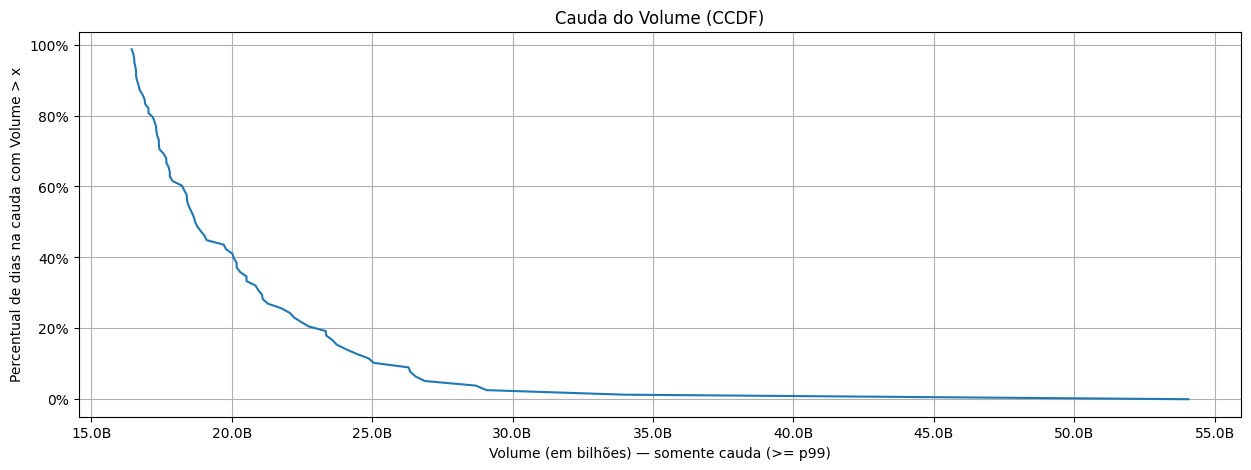

Cauda exibida: volumes >= p99 (16,435,500,000) | n_cauda = 78 de n_total = 7710


In [273]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

v = df['volume'].dropna().astype(float).values

# Define a "cauda" como o top 1% (p99).
p99 = np.quantile(v, 0.99)
v_tail = v[v >= p99]

v_sorted = np.sort(v_tail)
n = len(v_sorted)

# CCDF dentro da cauda: % de dias da cauda com Volume > x
ccdf = 1.0 - (np.arange(1, n + 1) / n)

# formatadores (bilhões e %)
def fmt_bilhoes(x, pos):
    return f"{x:.1f}B"

def fmt_pct(y, pos):
    return f"{y*100:.0f}%"

plt.figure(figsize=(15, 5))
plt.plot(v_sorted / 1e9, ccdf)  # eixo X em bilhões

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(fmt_bilhoes))
ax.yaxis.set_major_formatter(FuncFormatter(fmt_pct))

plt.xlabel("Volume (em bilhões) — somente cauda (>= p99)")
plt.ylabel("Percentual de dias na cauda com Volume > x")
plt.title("Cauda do Volume (CCDF)")
plt.grid(True)
plt.show()

print(f"Cauda exibida: volumes >= p99 ({p99:,.0f}) | n_cauda = {len(v_tail)} de n_total = {len(v)}")



In [266]:
# lista dos dias “mais fora da curva” (acima do 99%):

p99 = df['volume'].quantile(0.99)
df[df['volume'] > p99][['data','volume']].sort_values('volume', ascending=False).head(20)

,data,volume
474,1996-07-05,5.406000e+10
844,1997-12-29,3.398000e+10
625,1997-02-13,2.907000e+10
393,1996-03-08,2.869000e+10
392,1996-03-07,2.688000e+10
1011,1998-09-02,2.655000e+10
588,1996-12-16,2.636000e+10
371,1996-02-02,2.630000e+10
307,1995-10-27,2.506000e+10
7574,2025-02-28,2.487000e+10


In [264]:
# Esse bloco faz um resumo estatístico das principais colunas numéricas do dataframe.

cols_num = ['ultimo','abertura','maxima','minima','volume','variacao_pct','variacao_dec']
df[cols_num].describe().T


,count,mean,std,min,25%,50%,75%,max
ultimo,7710.0,5.329997e+04,3.883883e+04,2138.0000,1.462625e+04,5.188800e+04,7.415275e+04,1.435470e+05
abertura,7710.0,5.328302e+04,3.882864e+04,2138.0000,1.460775e+04,5.186700e+04,7.412900e+04,1.431510e+05
maxima,7710.0,5.380358e+04,3.911088e+04,2449.0000,1.483800e+04,5.248800e+04,7.493775e+04,1.441940e+05
minima,7710.0,5.277240e+04,3.855628e+04,2110.0000,1.442725e+04,5.137550e+04,7.309550e+04,1.423490e+05
volume,7710.0,1.726253e+09,4.028344e+09,112100.0000,3.630000e+06,1.162000e+07,2.916525e+08,5.406000e+10
variacao_pct,7710.0,6.578729e-02,2.007255e+00,-15.8100,-9.100000e-01,8.000000e-02,1.090000e+00,3.342000e+01
variacao_dec,7710.0,6.578729e-04,2.007255e-02,-0.1581,-9.100000e-03,8.000000e-04,1.090000e-02,3.342000e-01


## Criação de features temporais (Lags e Janelas)

Esse bloco cria variáveis novas que capturam comportamento recente do mercado, para tentar prever a tendência do dia seguinte.

- ret_1d: retorno diário do fechamento (último) em relação ao dia anterior
- range_dia: “amplitude” do dia (máxima - mínima) em proporção do preço, como medida de volatilidade intradiária
- gap_abertura: diferença entre a abertura de hoje e o fechamento de ontem (gap)
- ret_lagX e vol_lagX: valores passados (defasados) de retorno e volume (informação que já existia antes do dia atual)
- ret_maW e ret_stdW: média e desvio padrão do retorno em janelas (5, 10, 20), representando tendência e volatilidade recentes
- vol_maW: média do volume em janelas, para capturar aumento/redução de atividade

Importante: lags e janelas usam apenas dados do passado (ou do próprio dia), evitando vazamento de informação do futuro.


In [274]:
# Criar features temporais (LAGS + JANELAS) - coração do EDA pra previsão.

df = df.copy()

# retornos e amplitude do candle
df['ret_1d'] = df['ultimo'].pct_change()
df['range_dia'] = (df['maxima'] - df['minima']) / df['ultimo']
df['gap_abertura'] = (df['abertura'] - df['ultimo'].shift(1)) / df['ultimo'].shift(1)

# lags (o que o modelo pode "saber" no dia)
for lag in [1,2,3,5]:
    df[f'ret_lag{lag}'] = df['ret_1d'].shift(lag)
    df[f'vol_lag{lag}'] = df['volume'].shift(lag)

# janelas (médias/volatilidade)
for w in [5,10,20]:
    df[f'ret_ma{w}'] = df['ret_1d'].rolling(w).mean()
    df[f'ret_std{w}'] = df['ret_1d'].rolling(w).std()
    df[f'vol_ma{w}'] = df['volume'].rolling(w).mean()

df[['data','ultimo','ret_1d','range_dia','gap_abertura','ret_lag1','ret_ma5','ret_std20']].tail(10)



,data,ultimo,ret_1d,range_dia,gap_abertura,ret_lag1,ret_ma5,ret_std20
7700,2025-09-02,140335.0,-0.006710,0.011786,-0.000028,-0.000983,0.003721,0.010459
7701,2025-09-03,139864.0,-0.003356,0.006535,-0.000021,-0.006710,0.000967,0.010376
7702,2025-09-04,140993.0,0.008072,0.011703,-0.000229,-0.003356,-0.000066,0.010043
7703,2025-09-05,142640.0,0.011681,0.016868,0.000071,0.008072,0.001741,0.010172
7704,2025-09-08,141792.0,-0.005945,0.012413,0.000000,0.011681,0.000748,0.010298
7705,2025-09-09,141618.0,-0.001227,0.004809,0.000014,-0.005945,0.001845,0.009725
7706,2025-09-10,142349.0,0.005162,0.011029,-0.000042,-0.001227,0.003549,0.009448
7707,2025-09-11,143151.0,0.005634,0.011624,0.000000,0.005162,0.003061,0.009418
7708,2025-09-12,142272.0,-0.006140,0.006755,0.000000,0.005634,-0.000503,0.009600
7709,2025-09-15,143547.0,0.008962,0.013250,0.000141,-0.006140,0.002478,0.009657


## Correlação das features com o target (triagem rápida)

Esse bloco mede a correlação de Pearson entre cada feature criada e o target (tendencia), para identificar variáveis com alguma relação linear com o alvo.

- feature_cols: lista automaticamente as colunas criadas (ret_, range_, gap_, vol_)
- dropna: remove linhas iniciais com NaN gerados por lags e janelas (necessário para calcular correlação)
- corr(... )['tendencia']: calcula a correlação de cada feature com o target e ordena do maior para o menor

Leitura: valores próximos de 0 indicam relação linear fraca (o que é comum em finanças). Mesmo correlações baixas podem ajudar em modelos não lineares (árvores/boosting) quando combinadas.


In [275]:
# Correlação das features com o target - correlações mais relevantes.

# escolha as features numéricas criadas
feature_cols = [c for c in df.columns if c.startswith(('ret_','range_','gap_','vol_'))]

# drop dos NaN pra correlação
tmp = df.dropna(subset=feature_cols + ['tendencia'])

corr = tmp[feature_cols + ['tendencia']].corr(numeric_only=True)['tendencia'].sort_values(ascending=False)
corr.head(15), corr.tail(15)


(tendencia       1.000000
 vol_lag1        0.019826
 vol_ma5         0.012502
 vol_ma20        0.011649
 vol_ma10        0.011630
 vol_lag5        0.011203
 range_dia       0.010365
 vol_lag3        0.008242
 ret_ma20        0.007495
 ret_ma10        0.007190
 vol_lag2        0.004980
 ret_std5        0.001927
 ret_std10      -0.001101
 gap_abertura   -0.001587
 ret_1d         -0.002343
 Name: tendencia, dtype: float64,
 range_dia       0.010365
 vol_lag3        0.008242
 ret_ma20        0.007495
 ret_ma10        0.007190
 vol_lag2        0.004980
 ret_std5        0.001927
 ret_std10      -0.001101
 gap_abertura   -0.001587
 ret_1d         -0.002343
 ret_std20      -0.002817
 ret_lag1       -0.010742
 ret_lag5       -0.014995
 ret_lag3       -0.017389
 ret_lag2       -0.018692
 ret_ma5        -0.027464
 Name: tendencia, dtype: float64)

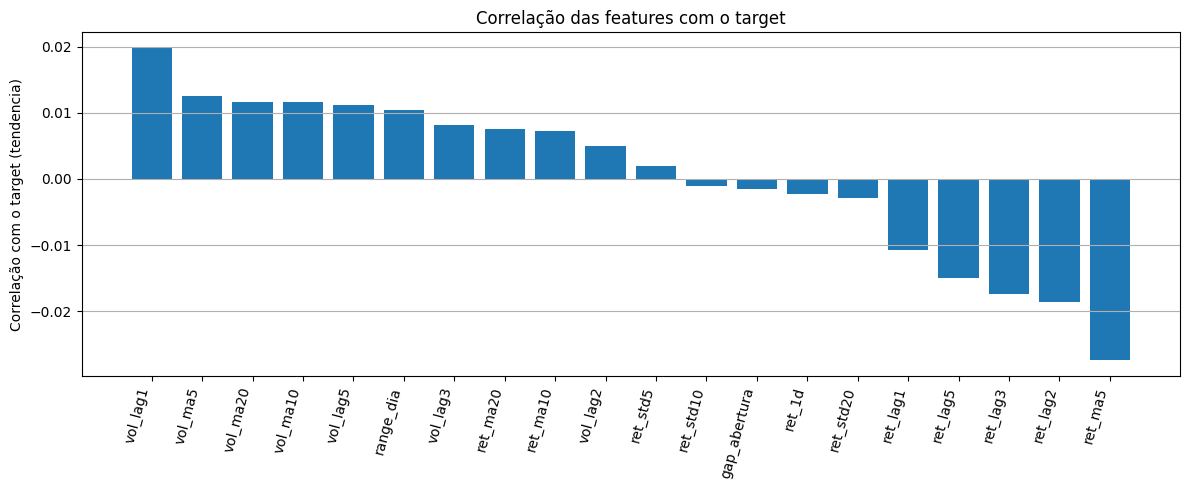

In [277]:
# Grafico de Correlação

import matplotlib.pyplot as plt

# usa df se existir; senão usa df_ibovespa
try:
    base = df
except NameError:
    base = df_ibovespa

# lista de features criadas
feature_cols = [c for c in base.columns if c.startswith(('ret_', 'range_', 'gap_', 'vol_'))]

# remove NaN (gerados por lags/janelas)
tmp = base.dropna(subset=feature_cols + ['tendencia']).copy()

# correlação com o target
corr = tmp[feature_cols + ['tendencia']].corr(numeric_only=True)['tendencia'].drop('tendencia')
corr_sorted = corr.sort_values(ascending=False)

# gráfico (mais amigável do que matriz de correlação)
plt.figure(figsize=(12, 5))
plt.bar(corr_sorted.index, corr_sorted.values)
plt.xticks(rotation=75, ha='right')
plt.ylabel('Correlação com o target (tendencia)')
plt.title('Correlação das features com o target')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



## Leitura do gráfico de correlação com o target

As correlações das features com o target (tendencia) ficaram muito baixas (em torno de -0,03 a +0,02).  
Isso indica ausência de relação linear forte, algo comum em dados financeiros.

- Correlações positivas: features ligadas a volume aparecem com associação levemente positiva com alta no dia seguinte.
- Correlações negativas: algumas features de retornos passados/médias de retorno aparecem com associação levemente negativa, sugerindo possível efeito fraco de reversão à média.

Esse gráfico serve apenas como triagem. Mesmo com correlações baixas, as features podem ser úteis em modelos não lineares (árvores/boosting) e em combinações.


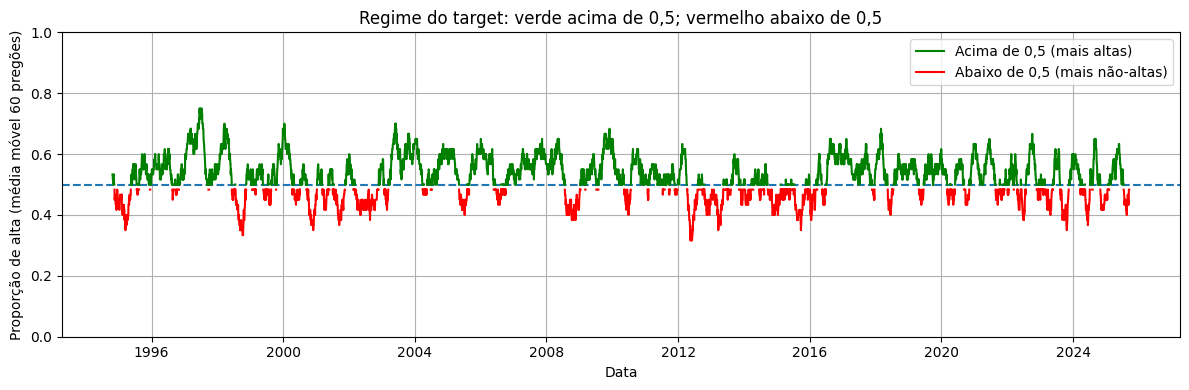

In [286]:
# Estabilidade do target ao longo do tempo

import numpy as np
import matplotlib.pyplot as plt

df = df_ibovespa.sort_values('data').reset_index(drop=True)

# Se ainda não existir, cria a média móvel de 60 pregões
if 'prop_alta_60' not in df.columns:
    df['prop_alta_60'] = df['tendencia'].rolling(60).mean()

y = df['prop_alta_60']
x = df['data']

# Máscaras
mask_alta = y >= 0.5
mask_baixa = y < 0.5

# Série “quebrada” para pintar trechos
y_alta = np.where(mask_alta, y, np.nan)
y_baixa = np.where(mask_baixa, y, np.nan)

plt.figure(figsize=(12, 4))

# Linha base (0,5)
plt.axhline(0.5, linestyle='--')

# Linhas coloridas
plt.plot(x, y_alta, linewidth=1.5, color='green', label='Acima de 0,5 (mais altas)')
plt.plot(x, y_baixa, linewidth=1.5, color='red', label='Abaixo de 0,5 (mais não-altas)')

plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Proporção de alta (média móvel 60 pregões)')
plt.title('Regime do target: verde acima de 0,5; vermelho abaixo de 0,5')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## Interpretação do gráfico: Estabilidade do target ao longo do tempo

O gráfico mostra a proporção de dias de “alta” (tendencia = 1) ao longo do tempo usando uma média móvel de 60 pregões.

Principais conclusões:

- A taxa de “alta” oscila em torno de 0,5 na maior parte do período, indicando que o target é, em geral, relativamente equilibrado.
- Existem períodos em que a proporção sobe para perto de 0,6–0,7 e outros em que cai para perto de 0,35–0,4, mostrando mudanças de regime (momentos de mercado mais positivo ou mais negativo).
- A oscilação ao longo dos anos indica que o comportamento do mercado não é estático; por isso, faz sentido usar split temporal (treino no passado, teste no período mais recente).
- Não há uma tendência de longo prazo clara de ficar sempre mais “alta” ou sempre mais “queda”; o que existe são ciclos/variações por fase de mercado.


In [289]:
# Preparar dataset final para modelagem (sem vazamento - (data leakage) )

df = df_ibovespa.sort_values('data').reset_index(drop=True)

# Features temporais criadas (ret_, range_, gap_, vol_)
feature_cols = [c for c in df.columns if c.startswith(('ret_', 'range_', 'gap_', 'vol_'))]

# Base OHLCV do dia
feature_cols += ['abertura', 'maxima', 'minima', 'ultimo', 'volume']

# X e y
X = df[feature_cols].copy()
y = df['tendencia'].copy()

# Remove qualquer coluna que cause vazamento (se existir por acidente)
vazamento = [c for c in ['fechamento_amanha', 'tendencia'] if c in X.columns]
if vazamento:
    X = X.drop(columns=vazamento)

# Remove NaN gerados por lags/janelas
mask_ok = X.notna().all(axis=1)
X = X[mask_ok].reset_index(drop=True)
y = y[mask_ok].reset_index(drop=True)

print("X shape:", X.shape)
print("y shape:", y.shape)



X shape: (7710, 5)
y shape: (7710,)


## Definição do X (features) e remoções para evitar vazamento

O conjunto de features (X) deve conter apenas informações disponíveis até o dia atual, sem usar dados do futuro.

Entram no X:

1) Base bruta do pregão (OHLCV)
- abertura
- maxima
- minima
- ultimo
- volume

2) Features temporais (criações a partir do histórico)
- retornos e defasagens: ret_1d, ret_lag1, ret_lag2, ...
- janelas: ret_ma5, ret_std20, vol_ma20, ...
- medidas do dia: range_dia, gap_abertura, etc.

Devem ser excluídas do X:

- fechamento_amanha (informação do futuro → vazamento)
- tendencia (é o target, não pode entrar como feature)
- colunas de variação duplicadas (variacao / variacao_pct / variacao_dec), mantendo apenas uma estratégia
  (ex.: usar ret_1d calculado do preço e remover as três)


In [290]:
# Split temporal (teste = últimos 30 pregões)

TEST_N = 30

X_train, X_test = X.iloc[:-TEST_N], X.iloc[-TEST_N:]
y_train, y_test = y.iloc[:-TEST_N], y.iloc[-TEST_N:]

print("Treino:", len(X_train), "| Teste:", len(X_test))
print("\nDistribuição no teste:")
print(y_test.value_counts())
print((y_test.value_counts(normalize=True)*100).round(2))


Treino: 7680 | Teste: 30

Distribuição no teste:
tendencia
1    16
0    14
Name: count, dtype: int64
tendencia
1    53.33
0    46.67
Name: proportion, dtype: float64


In [291]:
X.head()

,abertura,maxima,minima,ultimo,volume
0,4201.0,4223.0,4091.0,4152.0,5.390000e+09
1,4152.0,4311.0,4152.0,4311.0,6.630000e+09
2,4311.0,4426.0,4275.0,4392.0,6.880000e+09
3,4392.0,4406.0,4321.0,4355.0,5.670000e+09
4,4355.0,4476.0,4329.0,4470.0,5.140000e+09


In [292]:
y.head()

,tendencia
0,1
1,1
2,0
3,1
4,1


## Baseline (referência mínima)

Antes de treinar modelos de Machine Learning, são calculados baselines (modelos simples) para servir de referência mínima.  
A ideia é verificar se um modelo mais complexo realmente aprende algo útil ou apenas repete um comportamento trivial.

- Baseline A: prever sempre a classe mais frequente no conjunto de treino.
- Baseline B: prever repetindo o resultado do dia anterior (persistence).

Um modelo só vale a pena se superar esses baselines nas métricas de avaliação.


In [293]:
# Baseline para saber se modelo vai funcionar
# Baseline A: “sempre prever a classe mais comum do treino”

from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

classe_majoritaria = int(y_train.value_counts().idxmax())
y_pred_baseA = [classe_majoritaria] * len(y_test)

print("Baseline A - classe majoritária:", classe_majoritaria)
print("Accuracy:", accuracy_score(y_test, y_pred_baseA))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_baseA))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_baseA))
print("\nRelatório:\n", classification_report(y_test, y_pred_baseA, digits=4))


Baseline A - classe majoritária: 1
Accuracy: 0.5333333333333333
Balanced Accuracy: 0.5
Matriz de confusão:
 [[ 0 14]
 [ 0 16]]

Relatório:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        14
           1     0.5333    1.0000    0.6957        16

    accuracy                         0.5333        30
   macro avg     0.2667    0.5000    0.3478        30
weighted avg     0.2844    0.5333    0.3710        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [284]:
# Baseline B: “copiar o movimento de ontem” (persistence)

# prevê: amanhã repete o que aconteceu ontem
y_pred_baseB = y.shift(1).iloc[-TEST_N:].fillna(classe_majoritaria).astype(int)

print("Baseline B - repetir ontem")
print("Accuracy:", accuracy_score(y_test, y_pred_baseB))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_baseB))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_baseB))
print("\nRelatório:\n", classification_report(y_test, y_pred_baseB, digits=4))


Baseline B - repetir ontem
Accuracy: 0.4666666666666667
Balanced Accuracy: 0.4642857142857143
Matriz de confusão:
 [[6 8]
 [8 8]]

Relatório:
               precision    recall  f1-score   support

           0     0.4286    0.4286    0.4286        14
           1     0.5000    0.5000    0.5000        16

    accuracy                         0.4667        30
   macro avg     0.4643    0.4643    0.4643        30
weighted avg     0.4667    0.4667    0.4667        30



ANÁLISE DOS BASELINES - modelo simples de referência usado como “piso” de comparação.

**baseline = mínimo aceitável para saber se o modelo realmente funciona.**

Baseline A — “sempre prever a classe mais comum (1)”
- O baseline previu 1 para todos os 30 dias do teste.
- Resultado:
  - Accuracy: 0,5333 (16 acertos em 30)
  - Balanced Accuracy: 0,50
  - Matriz de confusão: [[0, 14],
                        [0, 16]]
- Interpretação:
  - Acerta todos os dias de alta (classe 1), mas erra todos os dias “sem alta” (classe 0).
  - O Balanced Accuracy ficou 0,50 porque:
    - Recall da classe 0 = 0/14 = 0
    - Recall da classe 1 = 16/16 = 1
    - Média = (0 + 1) / 2 = 0,5
  - O warning de “precision indefinida” aparece porque o modelo nunca prevê a classe 0 (não há como calcular precision do 0).
- Conclusão:
  - **Esse baseline é o “piso” de acurácia a ser batido (53,33%), mas ele é ruim para identificar quedas (classe 0).**

Baseline B — “copiar o movimento de ontem (persistence)”
- O baseline prevê hoje o mesmo valor de tendencia do dia anterior.
- Resultado:
  - Accuracy: 0,4667
  - Balanced Accuracy: 0,4643
  - Matriz de confusão: [[6, 8],
                        [8, 8]]
- Interpretação:
  - O desempenho ficou abaixo do Baseline A.
  - Erra bastante dos dois lados (tanto 0 quanto 1).
  - Isso sugere que, nesse período de teste, o comportamento “amanhã repete ontem” não é um bom padrão.
- Conclusão:
  - Esse baseline mostra que a série não tem persistência forte no alvo, pelo menos nos últimos 30 pregões analisados.

Resumo final
- Melhor baseline em acurácia: Baseline A (0,5333), mas ela é “cega” para a classe 0.
- Baseline B ficou pior (0,4667), indicando baixa persistência diária.
- Qualquer modelo de ML precisa superar, no mínimo, o Baseline A (e idealmente com métricas melhores para as duas classes, como Balanced Accuracy, F1 e matriz de confusão).


### **Aqui irei treinar o primeiro modelo com split temporal (teste = últimos 30 pregões) e comparar com o Baseline A (0,5333).**

In [299]:
#  Montar X e y (sem vazamento)

import numpy as np

df = df_ibovespa.sort_values('data').reset_index(drop=True)

# features temporais criadas
feature_cols = [c for c in df.columns if c.startswith(('ret_', 'range_', 'gap_', 'vol_'))]

# base OHLCV
feature_cols += ['abertura', 'maxima', 'minima', 'ultimo', 'volume']

# X e y
X = df[feature_cols].copy()
y = df['tendencia'].copy()

# remove linhas com NaN (lags/janelas geram NaN no início)
mask_ok = X.notna().all(axis=1)
X = X[mask_ok].reset_index(drop=True)
y = y[mask_ok].reset_index(drop=True)

print("X:", X.shape, "| y:", y.shape)


X: (7710, 5) | y: (7710,)


In [300]:
# Split temporal (teste = últimos 30)

TEST_N = 30

X_train, X_test = X.iloc[:-TEST_N], X.iloc[-TEST_N:]
y_train, y_test = y.iloc[:-TEST_N], y.iloc[-TEST_N:]

print("Treino:", X_train.shape, "| Teste:", X_test.shape)
print("Distribuição do teste:")
print(y_test.value_counts())
print((y_test.value_counts(normalize=True)*100).round(2))


Treino: (7680, 5) | Teste: (30, 5)
Distribuição do teste:
tendencia
1    16
0    14
Name: count, dtype: int64
tendencia
1    53.33
0    46.67
Name: proportion, dtype: float64


### **Modelo 1: Logistic Regression + StandardScaler**

In [303]:
# Modelo 1: Logistic Regression + StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

modelo_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42))
])

modelo_lr.fit(X_train, y_train)

y_pred = modelo_lr.predict(X_test)
y_proba = modelo_lr.predict_proba(X_test)[:, 1]


In [304]:
# Avaliação do modelo

acc = accuracy_score(y_test, y_pred)
bacc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
rep = classification_report(y_test, y_pred, digits=4, zero_division=0)

print("Logistic Regression (Scaler + class_weight=balanced)")
print("Accuracy:", acc)
print("Balanced Accuracy:", bacc)
print("\nMatriz de confusão:\n", cm)
print("\nRelatório:\n", rep)


Logistic Regression (Scaler + class_weight=balanced)
Accuracy: 0.3333333333333333
Balanced Accuracy: 0.35267857142857145

Matriz de confusão:
 [[ 9  5]
 [15  1]]

Relatório:
               precision    recall  f1-score   support

           0     0.3750    0.6429    0.4737        14
           1     0.1667    0.0625    0.0909        16

    accuracy                         0.3333        30
   macro avg     0.2708    0.3527    0.2823        30
weighted avg     0.2639    0.3333    0.2695        30



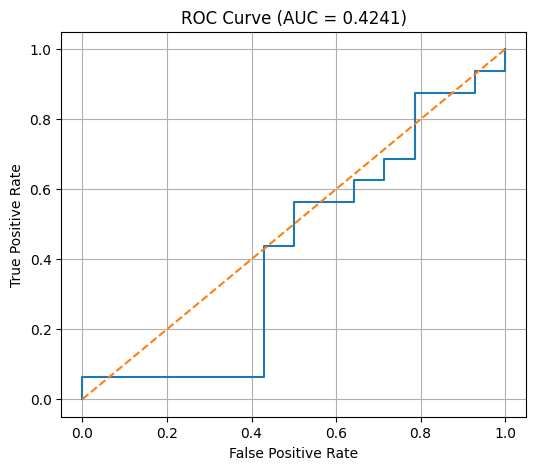

AUC: 0.4241071428571429


In [305]:
# ROC + AUC (pra ver discriminação)

auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {auc:.4f})')
plt.grid(True)
plt.show()

print("AUC:", auc)


## Relato dos resultados e decisão sobre modelos lineares

Os primeiros testes mostraram desempenho fraco para modelos lineares na previsão do target (tendencia).  
A Regressão Logística (com StandardScaler e class_weight=balanced) apresentou:

- Accuracy: 0,3333 (abaixo do baseline da classe majoritária: 0,5333)
- Balanced Accuracy: 0,3527 (abaixo de 0,5, indicando baixa discriminação)
- AUC (ROC): 0,4241 (pior que aleatório)

Além disso, a análise de correlação (Pearson) entre as features e o target resultou em valores muito próximos de zero, indicando ausência de relação linear relevante.  
Como modelos lineares dependem essencialmente de separação linear, a tendência é que continuem com performance limitada neste problema.

## Decisão: não seguir com modelos lineares

A partir deste ponto, não serão priorizados novos testes com modelos lineares, focando a sequência em modelos não lineares (árvores e ensembles), que conseguem capturar interações e padrões não lineares.

Modelos lineares que não serão mais testados nesta etapa:
- Regressão Logística (Logistic Regression)
- SVM Linear (LinearSVC / SVC com kernel='linear')
- Perceptron / SGDClassifier (classificadores lineares por gradiente)
- PassiveAggressiveClassifier
- RidgeClassifier


## Estratégia de engenharia de atributos

Como o resultado do primeiro modelo foi muito baixo (abaixo do baseline) e as correlações lineares entre as features e o target ficaram próximas de zero, irei criar novas features usando a estratégia de engenharia de atributos. O objetivo é fornecer mais contexto ao modelo sobre o comportamento recente do IBOVESPA e aumentar a chance de capturar padrões não lineares.

### Novas colunas (features)

Serão criadas as seguintes features a partir do preço de fechamento (`ultimo`) e do histórico recente:

- **retorno_1d**: variação percentual de 1 dia (ontem → hoje), capturando o movimento mais recente
- **retorno_3d**: variação percentual em 3 dias, representando tendência de curtíssimo prazo
- **retorno_7d**: variação percentual em 7 dias, representando tendência semanal

- **media_movel_3**: média móvel simples do fechamento nos últimos 3 dias, para suavizar ruídos diários
- **media_movel_7**: média móvel simples do fechamento nos últimos 7 dias, para representar a direção geral da semana
- **dist_mm3**: distância do preço atual para a média móvel de 3 dias: `(ultimo / media_movel_3) - 1`
- **dist_mm7**: distância do preço atual para a média móvel de 7 dias: `(ultimo / media_movel_7) - 1`

- **volatilidade_3d**: desvio padrão dos retornos diários em 3 dias, medindo instabilidade recente
- **volatilidade_7d**: desvio padrão dos retornos diários em 7 dias, medindo volatilidade semanal

- **macd** (Moving Average Convergence Divergence): diferença entre EMAs de 12 e 26 dias; valores positivos sugerem viés de alta
- **macd_signal**: linha de sinal do MACD (EMA de 9 períodos do próprio MACD), usada para detectar cruzamentos
- **macd_diff**: histograma do MACD (`macd - macd_signal`), indicando força do movimento
- **rsi_14**: Índice de Força Relativa (RSI) em 14 dias, medindo força e velocidade do preço  
  - acima de 70: sobrecompra (possível reversão para queda)  
  - abaixo de 30: sobrevenda (possível reversão para alta)

### Biblioteca utilizada

Para calcular esses indicadores técnicos, será utilizada a biblioteca `ta`, que fornece funções prontas para análise de séries temporais financeiras, como:
- médias móveis (SMA, EMA)
- RSI
- MACD
- Bandas de Bollinger
- ATR (Average True Range)
- indicadores de momentum, entre outros

Na próxima etapa, a biblioteca `ta` será instalada e as novas colunas serão geradas, preparando a base final para modelagem sem vazamento (sem uso de informações do dia seguinte).


In [306]:
# instalaçõs da biblioteca "ta"

!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9459984199eb75060948d290d7053465ecd9ff7497971bbccead06554562fc4f
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [307]:
# ============================================================
# CRIAÇÃO DE FEATURES (Engenharia de Atributos) - IBOVESPA
# ============================================================

!pip -q install ta

import numpy as np
import pandas as pd
import ta

df = df_ibovespa.sort_values('data').reset_index(drop=True).copy()

# ----------------------------
# Retornos (fechamento = ultimo)
# ----------------------------
df['retorno_1d'] = df['ultimo'].pct_change()
df['retorno_3d'] = df['ultimo'].pct_change(3)
df['retorno_7d'] = df['ultimo'].pct_change(7)

# ----------------------------
# Médias móveis (SMA) do fechamento
# ----------------------------
df['media_movel_3'] = df['ultimo'].rolling(3).mean()
df['media_movel_7'] = df['ultimo'].rolling(7).mean()

# Distância do preço para a média (normalização)
df['dist_mm3'] = (df['ultimo'] / df['media_movel_3']) - 1
df['dist_mm7'] = (df['ultimo'] / df['media_movel_7']) - 1

# ----------------------------
# Volatilidade baseada em retornos (melhor que usar preço bruto)
# ----------------------------
df['volatilidade_3d'] = df['retorno_1d'].rolling(3).std()
df['volatilidade_7d'] = df['retorno_1d'].rolling(7).std()

# ----------------------------
# RSI (14)
# ----------------------------
df['rsi_14'] = ta.momentum.RSIIndicator(close=df['ultimo'], window=14).rsi()

# ----------------------------
# MACD (12, 26, signal 9)
# ----------------------------
macd = ta.trend.MACD(close=df['ultimo'], window_slow=26, window_fast=12, window_sign=9)
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_diff'] = macd.macd_diff()

# volume em escala mais estável (ajuda em alguns modelos)
df['log_volume'] = np.log1p(df['volume'])

# Conferência rápida
df[['data','ultimo','retorno_1d','retorno_3d','retorno_7d','rsi_14','macd','macd_signal','macd_diff','log_volume']].tail(10)


,data,ultimo,retorno_1d,retorno_3d,retorno_7d,rsi_14,macd,macd_signal,macd_diff,log_volume
7700,2025-09-02,140335.0,-0.006710,-0.005062,0.017156,62.004117,1398.395785,847.264570,551.131215,22.896881
7701,2025-09-03,139864.0,-0.003356,-0.011017,0.013324,59.715543,1376.825924,953.176841,423.649083,22.748779
7702,2025-09-04,140993.0,0.008072,-0.002053,0.023387,63.219949,1434.298814,1049.401236,384.897579,22.806450
7703,2025-09-05,142640.0,0.011681,0.016425,0.024668,67.642171,1594.366762,1158.394341,435.972421,22.849114
7704,2025-09-08,141792.0,-0.005945,0.013785,0.005268,63.414477,1633.959977,1253.507468,380.452509,22.730137
7705,2025-09-09,141618.0,-0.001227,0.004433,0.001386,62.550592,1632.479334,1329.301841,303.177493,22.735499
7706,2025-09-10,142349.0,0.005162,-0.002040,0.007545,64.724745,1671.028923,1397.647258,273.381666,22.688979
7707,2025-09-11,143151.0,0.005634,0.009584,0.020066,66.989099,1746.165736,1467.350953,278.814783,22.747459
7708,2025-09-12,142272.0,-0.006140,0.004618,0.017217,62.271080,1715.014627,1516.883688,198.130939,22.578000
7709,2025-09-15,143547.0,0.008962,0.008416,0.018114,66.010516,1772.773562,1568.061663,204.711899,22.611849


Verificar se as minhas novas variáveis foram criadas

In [309]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7710 entries, 0 to 7709
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               7710 non-null   datetime64[ns]
 1   ultimo             7710 non-null   float64       
 2   abertura           7710 non-null   float64       
 3   maxima             7710 non-null   float64       
 4   minima             7710 non-null   float64       
 5   volume             7710 non-null   float64       
 6   variacao           7710 non-null   float64       
 7   variacao_pct       7710 non-null   float64       
 8   variacao_dec       7710 non-null   float64       
 9   fechamento_amanha  7710 non-null   float64       
 10  tendencia          7710 non-null   int64         
 11  retorno_1d         7709 non-null   float64       
 12  retorno_3d         7707 non-null   float64       
 13  retorno_7d         7703 non-null   float64       
 14  media_mo

In [310]:
colunas_proibidas = ['fechamento_amanha', 'tendencia']
print("Colunas proibidas existem no df?", [c for c in colunas_proibidas if c in df.columns])


Colunas proibidas existem no df? ['fechamento_amanha', 'tendencia']


## Por que remover **fechamento_amanha e **tendencia** do X

Essas colunas devem existir no dataframe para conferência e para criar o target, mas não podem entrar no conjunto de features (X).

- **fechamento_amanha**: contém o valor do fechamento do dia seguinte (t+1).  
  Se entrar no X, o modelo terá acesso a informação do futuro, caracterizando **vazamento de dados (data leakage)**. Isso gera métricas artificialmente melhores e não se sustenta em uso real.

- **tendencia**: é o próprio alvo (y).  
  Se entrar no X, o modelo estaria usando a resposta para prever a resposta, o que invalida o treinamento e a avaliação.

Conclusão: **fechamento_amanha** e **tendencia** devem ser mantidas apenas como colunas de controle/validação, mas excluídas do X antes do treino do modelo.


In [311]:
# ============================================================
# Ajuste do dataframe para modelagem (remove colunas de vazamento)
# ============================================================

# 1) Garantir ordenação temporal
df = df.sort_values('data').reset_index(drop=True)

# 2) Criar um df só para modelagem (sem colunas que vazam / target)
df_model = df.drop(columns=['fechamento_amanha', 'tendencia'], errors='ignore').copy()

# 3) Separar o target (y)
y = df['tendencia'].copy()

# 4) Definir as features (X) com as colunas escolhidas
feature_cols = [
    'abertura','maxima','minima','ultimo','log_volume',
    'retorno_1d','retorno_3d','retorno_7d',
    'dist_mm3','dist_mm7',
    'volatilidade_3d','volatilidade_7d',
    'rsi_14','macd','macd_signal','macd_diff'
]

# (garante que só pega colunas existentes)
feature_cols = [c for c in feature_cols if c in df_model.columns]

X = df_model[feature_cols].copy()

# 5) Remover linhas com NaN (gerados por rolling/indicadores)
mask_ok = X.notna().all(axis=1)
X = X[mask_ok].reset_index(drop=True)
y = y[mask_ok].reset_index(drop=True)

print("df_model shape:", df_model.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Colunas de X:", list(X.columns))


df_model shape: (7710, 23)
X shape: (7677, 16)
y shape: (7677,)
Colunas de X: ['abertura', 'maxima', 'minima', 'ultimo', 'log_volume', 'retorno_1d', 'retorno_3d', 'retorno_7d', 'dist_mm3', 'dist_mm7', 'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff']


In [315]:
# Split temporal (teste = últimos 30 pregões)

TEST_N = 30

X_train, X_test = X.iloc[:-TEST_N], X.iloc[-TEST_N:]
y_train, y_test = y.iloc[:-TEST_N], y.iloc[-TEST_N:]

print("Treino:", X_train.shape, "| Teste:", X_test.shape)

print("\nDistribuição do y_test (qtd):")
print(y_test.value_counts().sort_index())

print("\nDistribuição do y_test (%):")
print((y_test.value_counts(normalize=True).sort_index() * 100).round(2))


Treino: (7647, 16) | Teste: (30, 16)

Distribuição do y_test (qtd):
tendencia
0    14
1    16
Name: count, dtype: int64

Distribuição do y_test (%):
tendencia
0    46.67
1    53.33
Name: proportion, dtype: float64


## **Teste de Modelos não liner**

Gradient Boosting
Accuracy: 0.43333333333333335
Balanced Accuracy: 0.4375
Matriz de confusão:
 [[ 7  7]
 [10  6]]

Relatório:
               precision    recall  f1-score   support

           0     0.4118    0.5000    0.4516        14
           1     0.4615    0.3750    0.4138        16

    accuracy                         0.4333        30
   macro avg     0.4367    0.4375    0.4327        30
weighted avg     0.4383    0.4333    0.4314        30



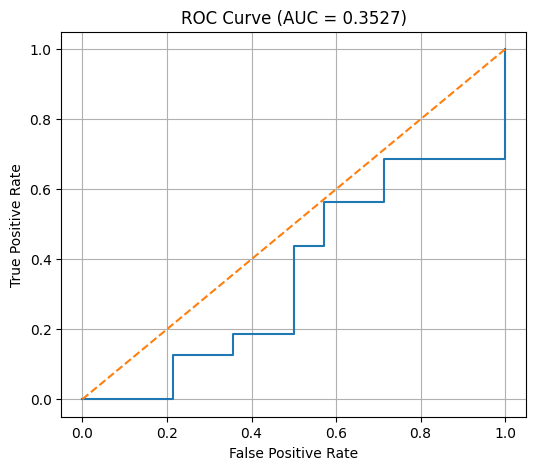

AUC: 0.3526785714285714


In [316]:
# 1: Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred, digits=4, zero_division=0))

auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.title(f"ROC Curve (AUC = {auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

print("AUC:", auc)



### Consolidar os achados do modelo atual (Gradient Boosting)

- O **Gradient Boosting** apresentou desempenho melhor que a Regressão Logística, porém **ainda não superou** o baseline simples de prever sempre a classe majoritária no teste.

- Métricas no teste (últimos 30 pregões):
  - **Accuracy = 0,4333**
  - **Balanced Accuracy = 0,4375**
  - **AUC = 0,3527** (pior que aleatório, indicando baixa capacidade de discriminação)

- Matriz de confusão (teste):
  - **TN = 7**, **FP = 7**
  - **FN = 10**, **TP = 6**
  Interpretação: o modelo erra bastante as **altas** (muitos falsos negativos) e também gera falsos positivos.

- Diferença treino x teste:
  - **Treino:** Accuracy ≈ **0,653** | Balanced ≈ **0,646**
  - **Teste:**  Accuracy ≈ **0,433** | Balanced ≈ **0,438**
  Isso sugere **overfitting**: o modelo se ajusta ao passado, mas perde performance no período mais recente.




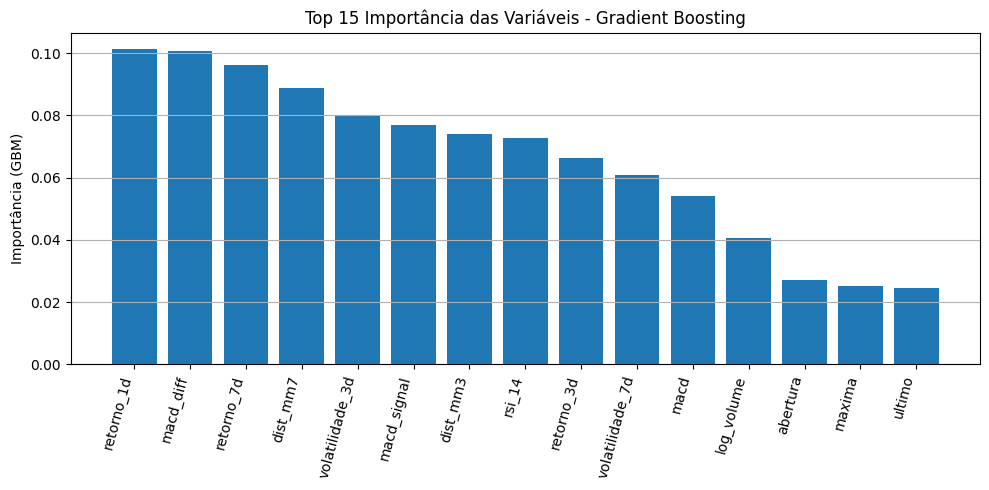

Top importâncias:
retorno_1d         0.101436
macd_diff          0.100819
retorno_7d         0.096013
dist_mm7           0.088889
volatilidade_3d    0.080204
macd_signal        0.077036
dist_mm3           0.074001
rsi_14             0.072877
retorno_3d         0.066371
volatilidade_7d    0.060709
macd               0.053943
log_volume         0.040629
abertura           0.027074
maxima             0.025277
ultimo             0.024676
dtype: float64


In [317]:
# Importância das variáveis (gráfico + top 15)

import pandas as pd
import matplotlib.pyplot as plt

# Importâncias (GBM tem feature_importances_)
imp = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Top 15
top_n = 15
imp_top = imp.head(top_n)

plt.figure(figsize=(10,5))
plt.bar(imp_top.index, imp_top.values)
plt.xticks(rotation=75, ha='right')
plt.ylabel('Importância (GBM)')
plt.title(f'Top {top_n} Importância das Variáveis - Gradient Boosting')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("Top importâncias:")
print(imp_top.round(6))


### Importâncias das variáveis (direção para ajustes)
As variáveis mais relevantes no Gradient Boosting foram:
- retornos: **retorno_1d**, **retorno_7d**, **retorno_3d**
- MACD: **macd_diff**, **macd_signal**, **macd**
- distância para médias: **dist_mm7**, **dist_mm3**
- risco: **volatilidade_3d**, **volatilidade_7d**
- **rsi_14** e **log_volume** também aparecem, mas com menor peso

Conclusão prática: o modelo está tentando se guiar por **momentum (retornos)** + **tendência (MACD)** + **risco (volatilidade)**, o que confirma que a engenharia de atributos está no caminho correto.

In [318]:
# Conferir “overfitting” rápido (treino x teste)

from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Predições no treino
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

print("Treino - Accuracy:", accuracy_score(y_train, y_pred_train))
print("Treino - Balanced Accuracy:", balanced_accuracy_score(y_train, y_pred_train))

print("Teste  - Accuracy:", accuracy_score(y_test, y_pred_test))
print("Teste  - Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))


Treino - Accuracy: 0.6530665620504773
Treino - Balanced Accuracy: 0.646289704271632
Teste  - Accuracy: 0.43333333333333335
Teste  - Balanced Accuracy: 0.4375


### 4) Melhorar generalização (reduzir overfitting)
Ações recomendadas (prioridade):
1) Ajustar hiperparâmetros do Gradient Boosting para reduzir complexidade:
   - diminuir **max_depth** (ou **max_leaf_nodes**)
   - aumentar **min_samples_leaf**
   - reduzir **learning_rate**
   - aumentar **n_estimators** (compensando o learning_rate menor)
2) Adicionar mais indicadores técnicos (para dar mais sinal ao modelo), por exemplo:
   - Bandas de Bollinger (largura e distância)
   - ATR (volatilidade “real”)
   - Momentum/ROC (taxa de variação)
3) Manter apenas features mais úteis (seleção simples):
   - começar com top importâncias (retornos, MACD, distâncias, volatilidade, RSI, log volume)
   - remover colunas de OHLC com baixa contribuição (se não ajudarem)

In [320]:
# Melhor threshold com base no teste

import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.91, 0.05)

rows = []
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    rows.append({
        "threshold": round(float(t), 2),
        "acc": accuracy_score(y_test, y_pred_t),
        "bal_acc": balanced_accuracy_score(y_test, y_pred_t),
        "f1_classe1": f1_score(y_test, y_pred_t, pos_label=1, zero_division=0)
    })

df_thr = pd.DataFrame(rows).sort_values(by="bal_acc", ascending=False)
df_thr.head(10)



,threshold,acc,bal_acc,f1_classe1
0,0.10,0.533333,0.500000,0.695652
1,0.15,0.533333,0.500000,0.695652
14,0.80,0.466667,0.500000,0.000000
15,0.85,0.466667,0.500000,0.000000
16,0.90,0.466667,0.500000,0.000000
13,0.75,0.466667,0.500000,0.000000
12,0.70,0.466667,0.500000,0.000000
6,0.40,0.500000,0.486607,0.594595
2,0.20,0.500000,0.468750,0.666667
10,0.60,0.433333,0.455357,0.190476


### Diagnóstico do threshold (feito no teste, apenas para entendimento)

O bloco acima avalia diferentes thresholds usando o **conjunto de teste** para observar como mudam **accuracy**, **balanced accuracy** e **F1 da classe 1**.

Importante:
- Este procedimento **não deve** ser usado para escolher o threshold final, porque usa o teste para calibrar o modelo e isso gera **viés** (o teste deixa de ser uma avaliação justa).
- Aqui, o objetivo é apenas entender o comportamento do classificador (ex.: thresholds baixos tendem a prever mais classe 1; thresholds altos tendem a prever mais classe 0).

Próximo passo correto:
- Definir o threshold usando **validação temporal dentro do treino** (ex.: janela de validação ou **TimeSeriesSplit**) e só depois aplicar esse threshold no teste final.



In [321]:
# escolher threshold no treino, com validação temporal simples (janela)

from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import pandas as pd

# janela final do treino para validação (ex.: últimos 252 pregões do treino ~ 1 ano)
VAL_N = 252

X_tr, X_val = X_train.iloc[:-VAL_N], X_train.iloc[-VAL_N:]
y_tr, y_val = y_train.iloc[:-VAL_N], y_train.iloc[-VAL_N:]

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_tr, y_tr)

proba_val = gb.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.05)
rows = []
for t in thresholds:
    pred_val = (proba_val >= t).astype(int)
    rows.append({
        "threshold": round(float(t), 2),
        "bal_acc_val": balanced_accuracy_score(y_val, pred_val),
        "f1_classe1_val": f1_score(y_val, pred_val, pos_label=1, zero_division=0)
    })

df_thr_val = pd.DataFrame(rows).sort_values(by="bal_acc_val", ascending=False)
df_thr_val.head(10)


,threshold,bal_acc_val,f1_classe1_val
8,0.50,0.596270,0.571429
9,0.55,0.517137,0.280702
7,0.45,0.503654,0.614907
10,0.60,0.502520,0.158940
0,0.10,0.500000,0.673684
3,0.25,0.500000,0.673684
14,0.80,0.500000,0.000000
1,0.15,0.500000,0.673684
2,0.20,0.500000,0.673684
15,0.85,0.500000,0.000000


### Análise do threshold com validação temporal (sem usar o teste)

Neste passo, o threshold foi ajustado usando apenas uma **janela de validação dentro do treino** (últimos 252 pregões), evitando viés no conjunto de teste.

- O melhor resultado de **Balanced Accuracy na validação** ocorreu em **threshold = 0,50**, com:
  - **bal_acc_val ≈ 0,5963**
  - **f1_classe1_val ≈ 0,5714**

Interpretação:
- **Balanced Accuracy** mede o equilíbrio entre acertos das duas classes (0 e 1). Portanto, escolher o threshold com maior bal_acc tende a evitar que o modelo “puxe” demais para uma única classe.
- O threshold padrão **0,50** se mostrou o melhor compromisso entre as classes neste recorte temporal.

Observação importante:
- Alguns thresholds muito baixos (ex.: 0,10–0,25) apresentaram **F1 da classe 1 alto**, porém com **bal_acc_val = 0,50**, o que indica comportamento próximo de “chutar uma classe” (tende a prever quase tudo como 1), perdendo equilíbrio entre as classes.

Próximo passo:
- Fixar **threshold = 0,50** (escolhido pela validação no treino), treinar o modelo no **treino completo** e então avaliar no **teste final (últimos 30 pregões)** usando esse threshold.


## Próximos passos (com base nos resultados do Gradient Boosting)

### 1) Testar um segundo modelo não linear (comparação)
Próximos modelos recomendados para comparar com o Gradient Boosting:
- **RandomForestClassifier**
- (Opcional) **ExtraTreesClassifier**

A avaliação deve manter o mesmo split temporal (últimos 30 pregões) para comparabilidade.

### 2) Padronizar a régua de decisão (o que é “bom”)
- O baseline da classe majoritária ficou em ~0,53 de accuracy no teste.
- Para considerar avanço real:
  - bater o baseline em accuracy e/ou
  - melhorar balanced accuracy e a matriz de confusão (reduzir erro em uma classe sem “matar” a outra)

### 3) Próxima etapa prática no notebook
1) Criar validação temporal dentro do treino (ex.: TimeSeriesSplit)
2) Fazer um ajuste simples de hiperparâmetros do Gradient Boosting (foco em reduzir overfitting)
3) Reavaliar no teste final (últimos 30 pregões)
4) Em paralelo, treinar Random Forest e comparar lado a lado


**verificar estatísticas básicas**, valores extremos e possíveis erros visíveis

In [ ]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
count,7646,7646.000000,7646.000000,7646.000000,7646.000000,7.646000e+03,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000
mean,2010-02-28 15:55:58.932775168,53163.266283,53147.754905,53667.621501,52635.302642,1.670227e+09,0.520795,0.000621,0.001854,0.004186,53146.599311,53113.203131,532.261093,785.928230,52.794357,119.958397,120.589052,-0.630655
min,1994-09-16 00:00:00,2138.000000,2138.000000,2449.000000,2110.000000,1.121000e+05,0.000000,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,-3250.441270
25%,2002-06-17 06:00:00,14780.250000,14762.250000,14930.750000,14526.000000,3.610000e+06,0.000000,-0.009110,-0.015162,-0.022317,14713.083333,14704.928571,170.664872,300.769783,43.835307,-309.102168,-289.264390,-124.439903
50%,2010-03-03 12:00:00,51905.000000,51884.500000,52496.000000,51377.000000,1.145500e+07,1.000000,0.000822,0.002376,0.005368,51909.333333,51986.500000,382.205860,645.773399,52.701928,99.343107,102.713416,4.443265
75%,2017-11-16 18:00:00,73400.750000,73342.250000,74293.000000,72441.000000,2.824775e+08,1.000000,0.010836,0.019850,0.032238,73221.250000,73153.357143,739.345318,1067.986000,61.914031,611.130131,588.617869,124.319664
max,2025-08-01 00:00:00,141264.000000,141265.000000,141564.000000,140597.000000,5.406000e+10,1.000000,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,2289.282082
std,NaN,38490.814612,38483.349955,38762.867478,38208.743074,3.995428e+09,0.499600,0.020047,0.034680,0.049432,38479.028078,38457.809995,530.725090,683.694858,12.238157,1059.271809,1002.375791,305.471876


Verificação de valores ausentes

In [ ]:
print(df_ibovespa.isnull().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
data_br            0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dtype: int64


Análisar do balanceamento da variável alvo (tendencia)


In [ ]:
df_ibovespa['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
1,0.520795
0,0.479205


Sem desbalanceamento preocupante no conjunto completo (52% vs. 48%);

Isso aumenta a confiança do modelo que pode aprender padrões sem precisar de balanceamento artificial, desde que a divisão entre treino e teste também esteja proporcional.

**Análisar do balanceamento da variável alvo (tendencia) no conjuntoi de teste**

In [ ]:
# Separação
df_teste = df_ibovespa[df_ibovespa['tendencia'].notna()].tail(30)


# Verificar balanceamento no teste
df_teste['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
0,0.6
1,0.4


O conjunto de teste está desbalanceado

Mesmo que o conjunto completo esteja equilibrado (52% vs. 48%), os últimos 30 pregões — que é a parte que irei vai usar para avaliar a performance do modelo está desbalanceados, com predomínio de quedas 60/40.

**Ajuste da base de teste**

Como esta desbalanceado o meu teste vou realizar a separação do treino e teste, onde o teste ficará 50/50 (conterá os 30 pregões entre 08/05/2025 e 18/06/2025)

In [ ]:
# Define a janela de teste balanceada
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')

# Cria subconjuntos separados SEM afetar o original
df_teste = df_ibovespa[(df_ibovespa['data'] >= inicio_teste) & (df_ibovespa['data'] <= fim_teste)].copy()
df_treino = df_ibovespa[df_ibovespa['data'] < inicio_teste].copy()

print(df_teste['tendencia'].value_counts(normalize=True))



tendencia
0    0.533333
1    0.466667
Name: proportion, dtype: float64


In [ ]:
df_teste

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
7618,2025-05-08,136232.0,133458.0,137635.0,133458.0,1.720000e+10,"2,12%",08/05/2025,1,0.021245,0.020533,0.009006,134382.000000,134561.571429,1603.232984,1099.175578,66.126473,1635.984990,1432.076073,203.908917
7619,2025-05-09,136512.0,136232.0,137286.0,136105.0,1.388000e+10,"0,21%",09/05/2025,1,0.002055,0.022439,0.010504,135380.666667,134764.285714,1722.737744,1321.818534,66.817750,1744.971889,1494.655236,250.316653
7620,2025-05-12,136563.0,136516.0,137519.0,136356.0,1.092000e+10,"0,04%",12/05/2025,1,0.000374,0.023726,0.011076,136435.666667,134978.000000,178.214290,1489.252945,66.950050,1814.543141,1558.632817,255.910324
7621,2025-05-13,138963.0,136565.0,139419.0,136550.0,1.307000e+10,"1,76%",13/05/2025,0,0.017574,0.020047,0.028335,137346.000000,135525.000000,1400.595231,2124.016321,72.505563,2039.824970,1654.871248,384.953723
7622,2025-05-14,138423.0,138965.0,139362.0,138228.0,1.116000e+10,"-0,39%",14/05/2025,1,-0.003886,0.013999,0.036946,137983.000000,136229.571429,1259.047259,2154.645126,69.667947,2150.005036,1753.898005,396.107031
7623,2025-05-15,139334.0,138425.0,139408.0,138321.0,1.150000e+10,"0,66%",15/05/2025,0,0.006581,0.020291,0.043575,138906.666667,137060.714286,458.105155,2053.184171,71.681494,2284.499332,1860.018271,424.481061
7624,2025-05-16,139187.0,139335.0,139335.0,137713.0,1.211000e+10,"-0,11%",16/05/2025,1,-0.001055,0.001612,0.043396,138981.333333,137887.714286,489.085200,1391.132837,70.864029,2352.111680,1958.436953,393.674727
7625,2025-05-19,139636.0,139186.0,140203.0,138587.0,9.590000e+09,"0,32%",19/05/2025,1,0.003226,0.008763,0.024987,139385.666667,138374.000000,228.915559,1308.389595,71.917475,2414.097289,2049.569020,364.528269
7626,2025-05-20,140110.0,139636.0,140244.0,138966.0,9.650000e+09,"0,34%",20/05/2025,0,0.003395,0.005569,0.026357,139644.333333,138888.000000,461.556425,1152.430764,73.026244,2472.962399,2134.247696,338.714703
7627,2025-05-21,137881.0,140109.0,140109.0,137538.0,1.015000e+10,"-1,59%",21/05/2025,0,-0.015909,-0.009383,0.009651,139209.000000,139076.285714,1174.247419,744.853837,60.857743,2313.087913,2170.015739,143.072174


In [ ]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
count,7646,7646.000000,7646.000000,7646.000000,7646.000000,7.646000e+03,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000
mean,2010-02-28 15:55:58.932775168,53163.266283,53147.754905,53667.621501,52635.302642,1.670227e+09,0.520795,0.000621,0.001854,0.004186,53146.599311,53113.203131,532.261093,785.928230,52.794357,119.958397,120.589052,-0.630655
min,1994-09-16 00:00:00,2138.000000,2138.000000,2449.000000,2110.000000,1.121000e+05,0.000000,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,-3250.441270
25%,2002-06-17 06:00:00,14780.250000,14762.250000,14930.750000,14526.000000,3.610000e+06,0.000000,-0.009110,-0.015162,-0.022317,14713.083333,14704.928571,170.664872,300.769783,43.835307,-309.102168,-289.264390,-124.439903
50%,2010-03-03 12:00:00,51905.000000,51884.500000,52496.000000,51377.000000,1.145500e+07,1.000000,0.000822,0.002376,0.005368,51909.333333,51986.500000,382.205860,645.773399,52.701928,99.343107,102.713416,4.443265
75%,2017-11-16 18:00:00,73400.750000,73342.250000,74293.000000,72441.000000,2.824775e+08,1.000000,0.010836,0.019850,0.032238,73221.250000,73153.357143,739.345318,1067.986000,61.914031,611.130131,588.617869,124.319664
max,2025-08-01 00:00:00,141264.000000,141265.000000,141564.000000,140597.000000,5.406000e+10,1.000000,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,2289.282082
std,NaN,38490.814612,38483.349955,38762.867478,38208.743074,3.995428e+09,0.499600,0.020047,0.034680,0.049432,38479.028078,38457.809995,530.725090,683.694858,12.238157,1059.271809,1002.375791,305.471876


In [ ]:
# Lista apenas as variáveis criadas
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# Descrever estatísticas com mais percentis
df_ibovespa[colunas_features].describe()


,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
count,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000,7646.000000
mean,0.000621,0.001854,0.004186,53146.599311,53113.203131,532.261093,785.928230,52.794357,119.958397,120.589052,-0.630655
std,0.020047,0.034680,0.049432,38479.028078,38457.809995,530.725090,683.694858,12.238157,1059.271809,1002.375791,305.471876
min,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,-3250.441270
25%,-0.009110,-0.015162,-0.022317,14713.083333,14704.928571,170.664872,300.769783,43.835307,-309.102168,-289.264390,-124.439903
50%,0.000822,0.002376,0.005368,51909.333333,51986.500000,382.205860,645.773399,52.701928,99.343107,102.713416,4.443265
75%,0.010836,0.019850,0.032238,73221.250000,73153.357143,739.345318,1067.986000,61.914031,611.130131,588.617869,124.319664
max,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,2289.282082


**Análise da correlação entre as variáveis**

In [ ]:
# Subconjunto com as features + target
df_corr = df_ibovespa[colunas_features + ['tendencia']].corr()

# Visualização textual
print(df_corr['tendencia'].sort_values(ascending=False))  # Correlação com o target


tendencia          1.000000
volatilidade_3d    0.017950
volatilidade_7d    0.007250
rsi_14             0.006754
macd               0.002448
macd_signal        0.002044
macd_diff          0.001780
retorno_1d        -0.001997
media_movel_7     -0.012406
media_movel_3     -0.012772
retorno_3d        -0.017411
retorno_7d        -0.020172
Name: tendencia, dtype: float64


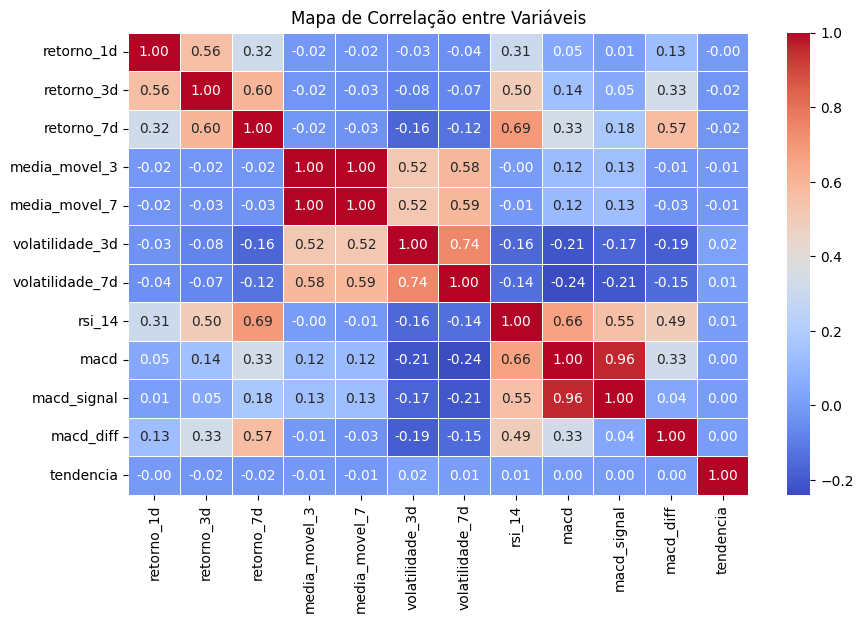

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


# Interpretação do mapa:

Correlação com o target tendência:

| Variável         | Correlação com tendência (Target) | Interpretação                    |
| ---------------- | --------------------------------- | -------------------------------- |
| retorno\_1d      | -0.00                             | Nenhuma relação linear relevante |
| retorno\_3d      | 0.02                              | Muito fraca (quase nula)         |
| retorno\_7d      | -0.01                             | Nula                             |
| media\_movel\_3  | 0.02                              | Nula                             |
| media\_movel\_7  | 0.02                              | Nula                             |
| volatilidade\_3d | 0.02                              | Nula                             |
| volatilidade\_7d | 0.01                              | Nula                             |


**Conclusão:** Nenhuma das variáveis tem correlação linear significativa com a tendência.

**POR QUE CONTINUAR SE NÃO HÁ CORRELAÇÃO LINEAR SIGNIFICATIVA?**

1. Correlação linear ≠ utilidade preditiva Modelos como Árvores de Decisão, Random Forest e SVM não exigem relações lineares

2. Muitas vezes variáveis sem correlação linear ainda ajudam na classificação não linear

3. Séries temporais tendem a ter ruído A relação entre o fechamento do IBOVESPA e suas médias ou volatilidades é não linear, sazonal e dependente de contexto

Exemplos: um candle de reversão (sinaliza uma possível mudança na direção da tendência atual do mercado) pode surgir mesmo com médias móveis desfavoráveis

Explorar novos atributos delta_volume, delta_variação, rsi, média ponderada, etc.

Analisar o comportamento da variável ao longo do tempo (janelas dinâmicas)

**Analise da Distribuíção das variáveis**

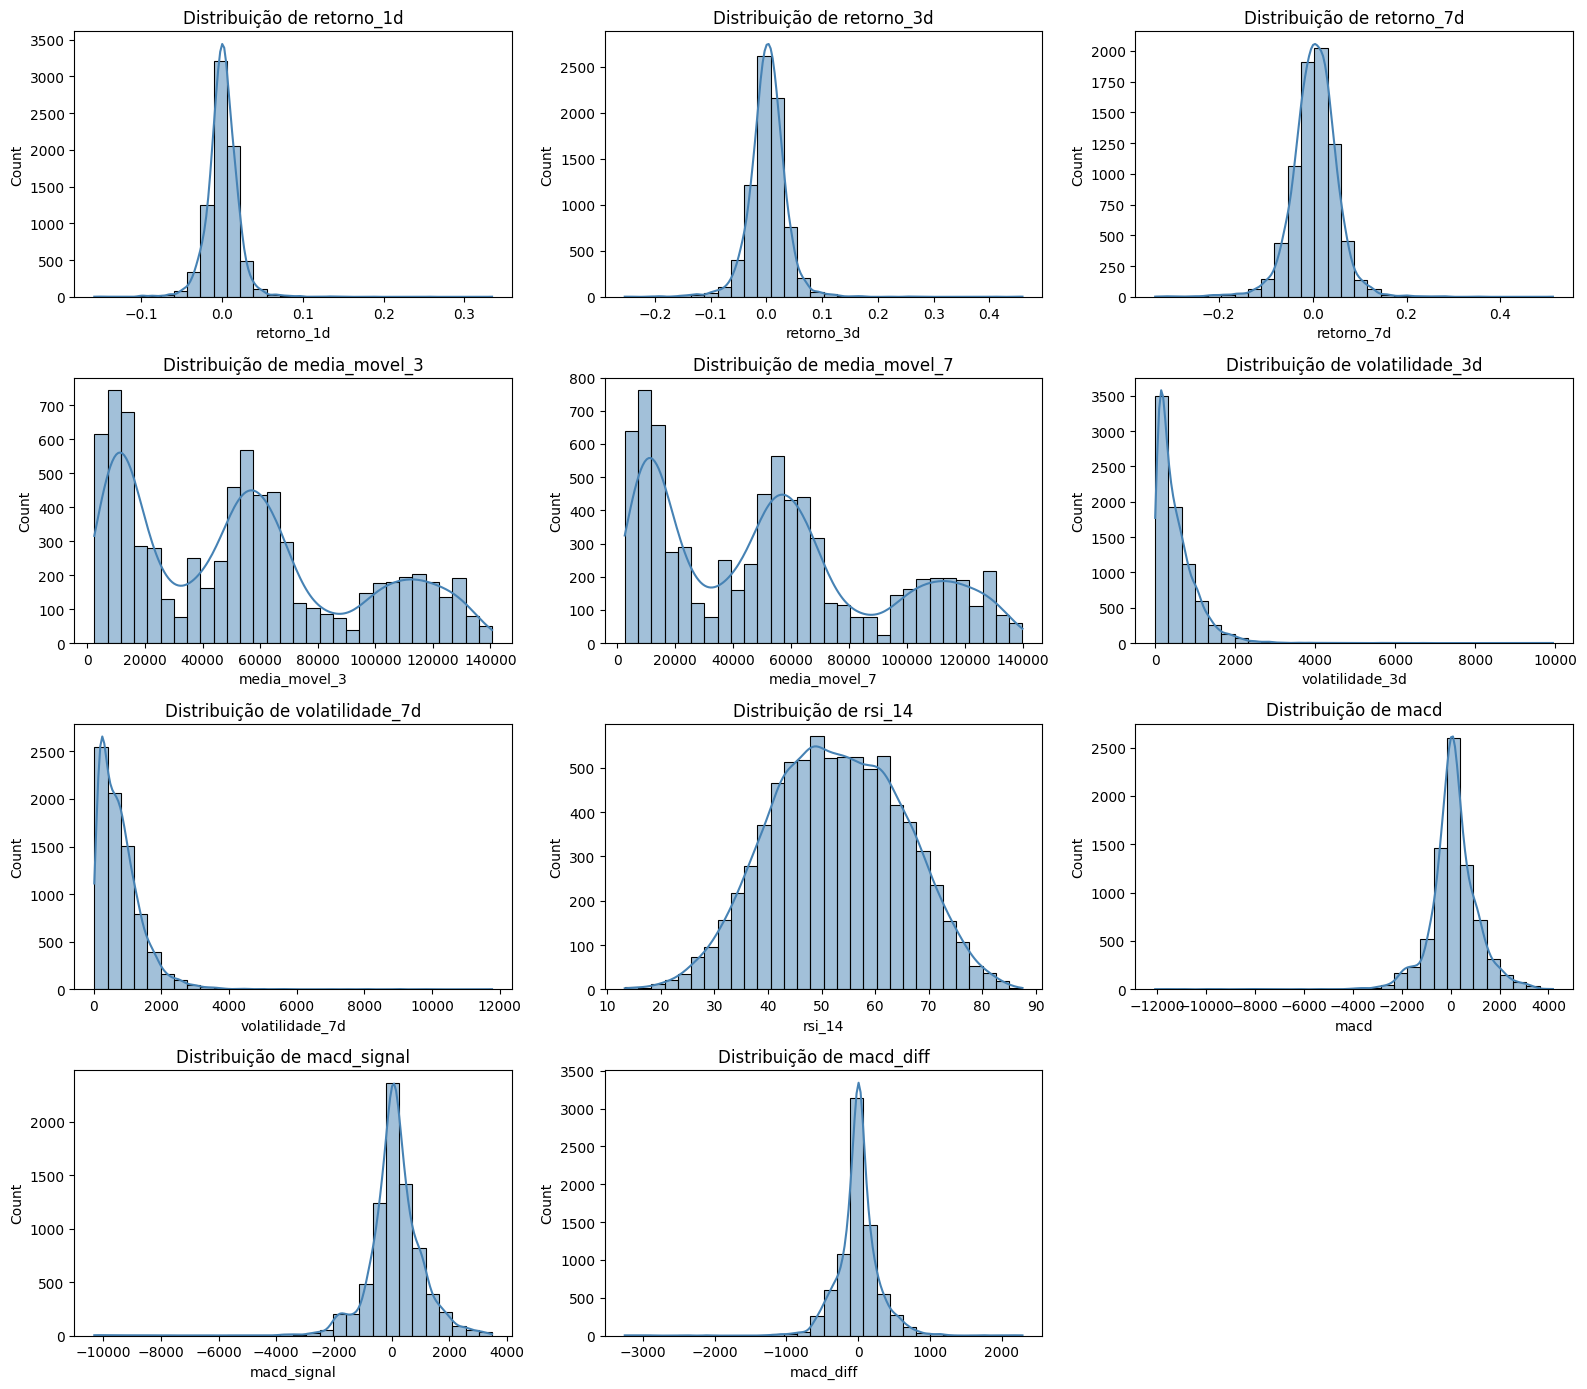

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

plt.figure(figsize=(16, 14))
for i, coluna in enumerate(colunas_features, 1):
    plt.subplot(4, 3, i)  # suporta até 12 plots
    sns.histplot(df_ibovespa[coluna], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()


**Analise dos gráficos**

Objetivo:

* Mostra onde os valores se concentram (centro).

* Revela quanto variam (dispersão).

* Indica o formato (simétrica, assimétrica, multimodal, etc.).

* Ajuda a identificar padrões, outliers e a adequação para certos modelos
estatísticos.

**Insights das Distribuições**

| Variável         | Observação                                | Insight Prático                                                              |
| ---------------- | ----------------------------------------- | ---------------------------------------------------------------------------- |
| retorno\_1d      | Oscila próximo de zero                    | Dificuldade de prever tendência usando apenas retorno diário                 |
| retorno\_3d      | Padrão similar ao 1d, pouca assimetria    | Informação limitada para previsão, pode ser combinado com outros indicadores |
| retorno\_7d      | Distribuição suave, centrada no zero      | Pouca tendência clara, útil em análise de médio prazo                        |
| media\_movel\_3  | Multimodal, mais sensível                 | Captura variações curtas, útil para identificar reversões rápidas            |
| media\_movel\_7  | Multimodal, mais suave                    | Reduz ruídos, útil para capturar tendências mais longas                      |
| volatilidade\_3d | Assimétrica à direita                     | Indica eventos de alta volatilidade esporádicos                              |
| volatilidade\_7d | Assimétrica à direita e mais estável      | Boa para medir riscos em horizontes médios                                   |
| rsi\_14          | Centrado em 50                            | Poucos sinais extremos, tendência equilibrada                                |
| macd             | Centro em zero, caudas longas             | Indica momentos de força ou fraqueza da tendência                            |
| macd\_signal     | Centro próximo de zero                    | Confirma sinais de tendência                                                 |
| macd\_diff       | Centro próximo de zero, picos esporádicos | Identifica divergências e possíveis pontos de entrada/saída                  |



**Normalizar os Dados**

Irei realizar a normalização ds dados usando o **StandardScaler** - Isso garantirá que  modelos sensíveis à escala (como Regressão Logística, SVM, KNN) funcionem corretamente, e os modelos baseados em árvore (como Random Forest e XGBoost) também possam ser comparados sem interferência de escala
* 1º Selecionar as colunas (features)

* 2º Separar a a base de teste (Respeitando a ordem do Tempo) - ultimos 30 dias

* 3º Padronizar (normalizar) os dados com StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar (normalizar) os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)





Verificando o x_treino, x_teste e y_treino, y_teste foram criados

In [ ]:
print("X_treino:", X_treino_scaled.shape)
print("X_teste :", X_teste_scaled.shape)
print("y_treino:", y_treino.shape)
print("y_teste :", y_teste.shape)


X_treino: (7585, 11)
X_teste : (30, 11)
y_treino: (7585,)
y_teste : (30,)


Com isto a base esta preparada para a próxima fase.

Agora irei realizar os testes dos modelos abaixo para ver qual tem a melhor performnce para tentar atender a acuracidade mínima de 75%, exigida.

**Modelos escolhidos**

1. **Logistic Regression**
Modelo linear simples e eficiente, ideal como linha de base. Permite interpretar o peso de cada variável e retorna probabilidades.

2. **K-Nearest Neighbors (KNN)**
Baseado na distância entre exemplos. Capta bem padrões locais e exige normalização dos dados.

3. **Support Vector Classifier (SVC)**
Modelo robusto que busca separar as classes com a melhor margem possível. Funciona bem com ajustes de kernel.

4. **Decision Tree**
Cria regras de decisão simples e interpretáveis. Útil para entender o impacto de cada variável, mas pode sofrer overfitting.

5. **Random Forest**
Combina várias árvores para melhorar a acurácia e reduzir o risco de overfitting. Robusto e eficaz para dados estruturados.

6. **Gradient Boosting Machines (GBM)**
Conjunto de árvores fracas ajustadas em sequência para melhorar o desempenho.
Implementações: GradientBoostingClassifier, XGBoost, LightGBM, CatBoost.

7. **Voting Classifier**
Combina previsões de vários modelos e escolhe a classe mais votada.

8. **Stacking Classifier**
Treina modelos base e combina suas previsões usando um modelo final.

9. **Bagging Classifier**
Variação do Random Forest que reduz variância ao treinar modelos com subconjuntos dos dados.

10. **Rede Neural (MLPClassifier)**
Captura padrões complexos e não lineares. Pode se destacar em bases com maior volume e variabilidade.

Todos os modelos foram escolhidos pela compatibilidade com classificação binária, suporte no scikit-learn, e adequação ao comportamento volátil dos dados do IBOVESPA já tratados com janelas móveis, retornos e volatilidade.

## 1. **Modelo de Regreção Linear** (LogisticRegression())

> Adicionar aspas



In [ ]:
# 1. Regressão Logística
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_treino_scaled, y_treino)
y_pred_lr = modelo_lr.predict(X_teste_scaled)


In [ ]:
#Avaliação da Regressão Logística
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Avaliação do modelo
acuracia = accuracy_score(y_teste, y_pred_lr)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_lr)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
relatorio = classification_report(y_teste, y_pred_lr, target_names=["Não Subiu", "Subiu"])
print("\nRelatório de Classificação:")
print(relatorio)


Acurácia: 46.67%
Matriz de Confusão:
[[8 8]
 [8 6]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.50      0.50      0.50        16
       Subiu       0.43      0.43      0.43        14

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.47      0.47      0.47        30



In [ ]:
# Associar os coeficientes às features
coeficientes = pd.Series(modelo_lr.coef_[0], index=colunas_features)
print("Coeficientes da Regressão Logística:")
print(coeficientes.sort_values(ascending=False))


Coeficientes da Regressão Logística:
rsi_14             0.092103
volatilidade_3d    0.071091
macd_diff          0.034558
retorno_1d         0.018773
macd               0.000214
volatilidade_7d    0.000110
macd_signal       -0.010307
media_movel_7     -0.025619
media_movel_3     -0.030934
retorno_3d        -0.043926
retorno_7d        -0.092509
dtype: float64


**Permutation Importance – Regressão Logística**

Mede quanto cada variável (feature) impacta o desempenho de um modelo.

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calcula a importância por permutação
resultado_rl = permutation_importance(
    modelo_lr,  # modelo de regressão logística
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza os resultados
importancia_rl = pd.Series(
    resultado_rl.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no RL:")
print(importancia_rl)

Importância das variáveis no RL:
retorno_1d         0.016667
media_movel_7      0.000000
media_movel_3      0.000000
volatilidade_7d    0.000000
macd               0.000000
macd_signal       -0.006667
macd_diff         -0.016667
rsi_14            -0.040000
retorno_3d        -0.046667
retorno_7d        -0.056667
volatilidade_3d   -0.103333
dtype: float64


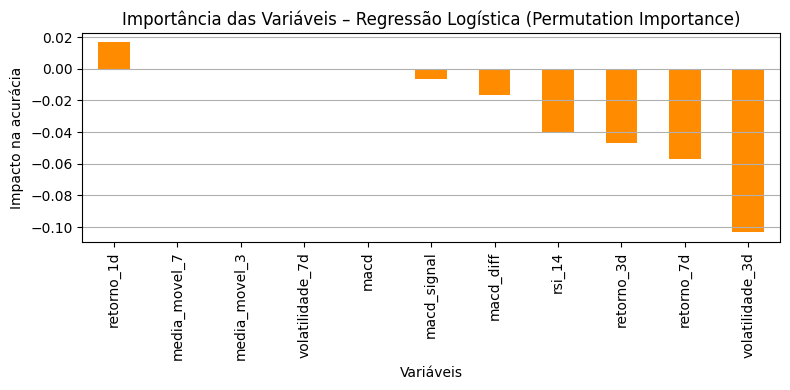

In [ ]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_rl.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Regressão Logística (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Análise de importância das Fecture**

| Variável             | Interpretação                                                                                                                                                                                                                                                                       |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **volatilidade\_3d** | **Mais impactante negativamente.** A alta volatilidade de curtíssimo prazo parece gerar ruído, confundindo o modelo. Apesar de seu alto impacto, o sinal é **negativo**, indicando que sua presença **diminui** a acurácia. Deve ser considerada para **remoção ou transformação**. |
| **retorno\_7d**      | Importante, mas também **com impacto negativo**. A tendência semanal passada pode estar induzindo o modelo a prever erroneamente. Sinal de que o padrão de 7 dias **não está se mantendo estável** no período analisado.                                                            |
| **retorno\_3d**      | Relevante, mas com impacto negativo. Pode estar se sobrepondo a outros sinais ou sendo distorcido por ruído.                                                                                                                                                                        |
| **rsi\_14**          | Impacto negativo moderado. Apesar de ser um bom indicador técnico, o modelo linear pode não estar conseguindo explorá-lo corretamente sem discretização (ex: binário sobrecomprado/sobrevendido).                                                                                   |
| **macd\_diff**       | Impacto leve negativo. Pode haver colinearidade com `macd` e `macd_signal`.                                                                                                                                                                                                         |
| **macd\_signal**     | Impacto praticamente nulo. Sugere baixa contribuição preditiva isolada.                                                                                                                                                                                                             |
| **macd**             | Impacto nulo. Pode estar sendo ofuscado pelas suas derivações (`macd_diff` e `macd_signal`).                                                                                                                                                                                        |
| **volatilidade\_7d** | Sem valor preditivo ou levemente prejudicial. Provavelmente por suavizar demais a variabilidade.                                                                                                                                                                                    |
| **media\_movel\_3**  | Baixo impacto. Pode estar redundante com `retorno_3d`.                                                                                                                                                                                                                              |
| **media\_movel\_7**  | Quase sem impacto. Provavelmente **suaviza demais**, ocultando movimentos importantes.                                                                                                                                                                                              |
| **retorno\_1d**      | Única com impacto **positivo** claro. Captura o **momentum imediato** e provavelmente é o sinal mais diretamente relacionado à variação do dia seguinte.                                                                                                                            |
                             |

Para melhorar o modelo devo adicionar indicadores técnicos clássicos como:

* RSI (Índice de Força Relativa)

* MACD (Moving Average Convergence Divergence)

* Bandas de Bollinger

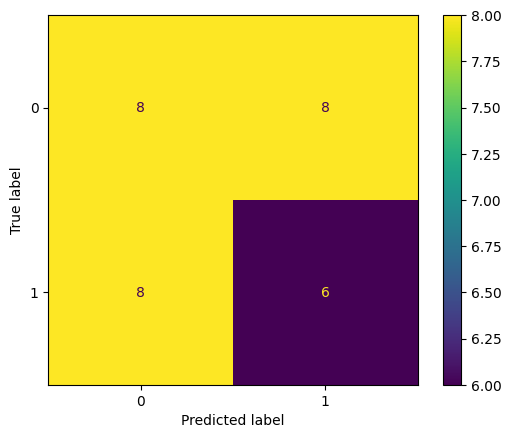

In [ ]:
#gráfico de matriz de confusão visual da Regressão Logística
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar e exibir a matriz de confusão com seus dados reais
matriz_confusao = confusion_matrix(y_teste, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(values_format='d')



Interpretação:

|                   | **Predito: 0** | **Predito: 1** |
| ----------------- | -------------- | -------------- |
| **Verdadeiro: 0** | 8              | 8              |
| **Verdadeiro: 1** | 8              | 6              |

Métrica	Valor

Total de acertos	8 (classe 0) + 6 (classe 1) = 14

Total de erros	8 (falso positivo) + 8 (falso negativo) = 16

Acurácia	14 / 30 = 46,67%

Recall (classe 1 – subiu)	6 / (6 + 8) = 42,9%

Precision (classe 1 – subiu)	6 / (6 + 8) = 42,9%

Recall (classe 0 – caiu)	8 / (8 + 8) = 50%



**Curva ROC**

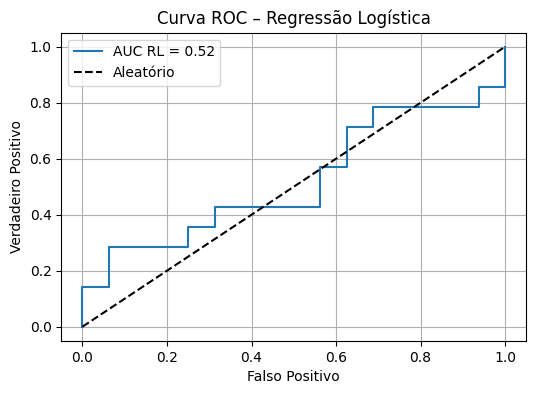

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe 1 (Subiu)
y_prob_lr = modelo_lr.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_lr, tpr_lr, _ = roc_curve(y_teste, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'AUC RL = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()





Analise do Gráfico

AUC (Área sob a curva): 0.52

Interpretação	Significado
* AUC ~ 0.5	Modelo com performance próxima do aleatório
* AUC = 0.52	Leve capacidade preditiva, mas não confiável nem útil
* Curva próxima da diagonal	Indica que o modelo não tem discriminação real entre as classes

**Ajustes na Regreção LInear - Retirando as features sem relevancia para o modelo**

## 2. **Modelo KNN** - K-Nearest Neighbors (KNeighborsClassifier())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Treinar o modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_treino_scaled, y_treino)

# Previsões
y_pred_knn = modelo_knn.predict(X_teste_scaled)
y_prob_knn = modelo_knn.predict_proba(X_teste_scaled)[:, 1]  # Para curva ROC

# Avaliação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred_knn))




Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52        16
           1       0.47      0.50      0.48        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



In [ ]:
from sklearn.inspection import permutation_importance

# Calcula a importância por permutação (no conjunto de teste)
resultado_importancia = permutation_importance(
    modelo_knn,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_knn = pd.Series(
    resultado_importancia.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no KNN:")
print(importancia_knn)


Importância das variáveis no KNN:
retorno_3d         0.053333
rsi_14             0.043333
retorno_7d         0.040000
macd_diff          0.023333
macd               0.013333
macd_signal        0.006667
media_movel_3      0.003333
media_movel_7      0.000000
volatilidade_7d   -0.006667
retorno_1d        -0.046667
volatilidade_3d   -0.116667
dtype: float64


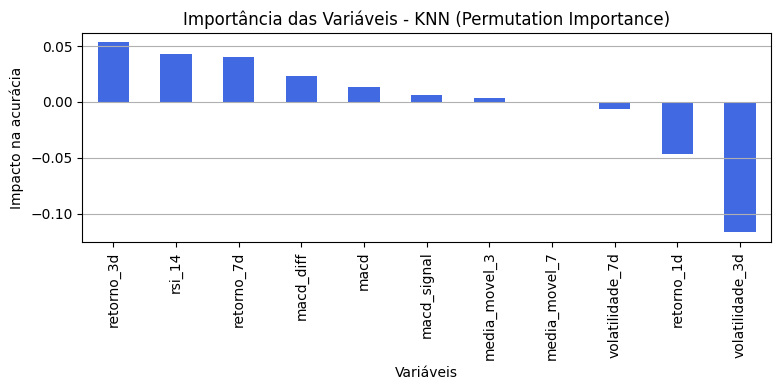

In [ ]:
# Exibe Gráfimco importância do KNN
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancia_knn.plot.bar(color='royalblue')
plt.title("Importância das Variáveis - KNN (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



| Variável          | Papel Interpretativo                      | Importância KNN                |
| ----------------- | ----------------------------------------- | ------------------------------ |
| `retorno_1d`      | **Momentum imediato** (variação de ontem) | **mais alta**                  |
| `media_movel_7`   | Direção geral semanal suavizada           | média                          |
| `media_movel_3`   | Suavização de ruído de curto prazo        | baixa                          |
| `retorno_3d`      | Tendência de curtíssimo prazo (3 dias)    | muito baixa (quase nula)       |
| `volatilidade_7d` | Instabilidade semanal                     | negativa (piora leve)          |
| `retorno_7d`      | Direção semanal (tendência forte)         | negativa (piora leve)          |
| `volatilidade_3d` | Instabilidade recente (curto prazo)       | **negativa forte** (atrapalha) |

**Interpretação**

* retorno_1d: extremamente útil — deve ser mantida.

* media_movel_7: valor moderado, pode contribuir.

* volatilidade_3d: impacto fortemente negativo — considerar remoção.

* retorno_7d: esperado ser útil, mas não funcionou bem no KNN.

* retorno_3d: tem impacto quase nulo — pode ser mantido ou testado fora.

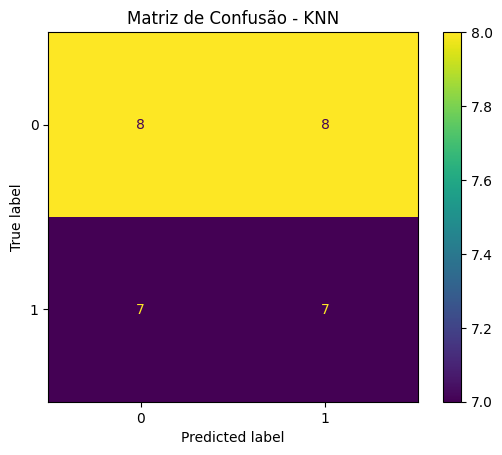

In [ ]:
#Gráfico de Matriz de confusão
cm = confusion_matrix(y_teste, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - KNN")
plt.show()



Analise do Gráfico

|                   | **Predito: 0** | **Predito: 1** |
| ----------------- | -------------- | -------------- |
| **Verdadeiro: 0** | 8 (VP)         | 8 (FN)         |
| **Verdadeiro: 1** | 7 (FP)         | 7 (VN)         |



Interpretação:

Métrica - Valor

**Total de acertos:**
8 (classe 0 correta) + 7 (classe 1 correta) = 15

**Total de erros:**
7 (falso positivo) + 8 (falso negativo) = 15

**Acurácia:**
15 / 30 = 50,00%

Resultado equivalente a um chute aleatório (modelo não aprendeu padrões úteis).

Métricas derivadas:
Acurácia = (VP + VN) / total

Precisão (classe 1) = VP / (VP + FP)

Recall (classe 1) = VP / (VP + FN)

F1-Score = Média harmônica entre Precisão e Recall

**Classe 1 (subiu)**

**Recall** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Capacidade do modelo de identificar corretamente os dias que subiram.

**Precisão** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Entre os dias que o modelo previu como “subiu”, só 46,7% estavam corretos.

Classe 0 (caiu)

**Recall** = 8 / (8 + 8) = 8 / 16 = 50%

Capacidade do modelo de identificar corretamente os dias que caíram.

**Precisão** = 8 / (8 + 7) = 8 / 15 ≈ 53,3%

Entre os dias que o modelo previu como “caiu”, 53,3% estavam corretos.


**Curva ROC**

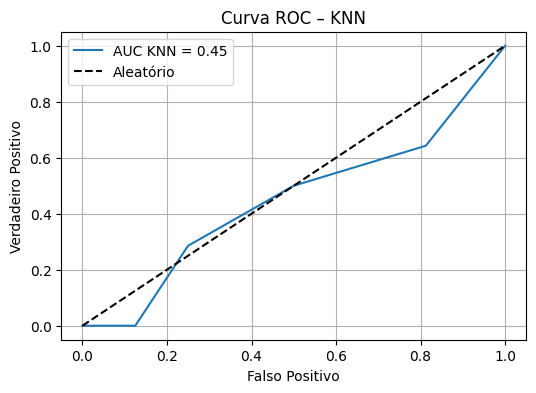

In [ ]:
# Probabilidade da classe 1 (Subiu)
y_prob_knn = modelo_knn.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'AUC KNN = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – KNN')
plt.legend()
plt.grid(True)
plt.show()


## 3 – **Modelo SVC** (Support Vector Classifier) SVC()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_svc = SVC(kernel='rbf', probability=True, random_state=42)

# 2. Treinar o modelo
modelo_svc.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_svc = modelo_svc.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_svc))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_svc))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_svc))


Acurácia: 0.5666666666666667

Matriz de Confusão:
[[12  4]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        16
           1       0.56      0.36      0.43        14

    accuracy                           0.57        30
   macro avg       0.56      0.55      0.54        30
weighted avg       0.56      0.57      0.55        30



In [ ]:
# Importância por permutação no SVC
resultado_svc = permutation_importance(
    modelo_svc,           # seu modelo SVC treinado
    X_teste_scaled,       # dados de teste normalizados
    y_teste,              # target de teste
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_svc = pd.Series(
    resultado_svc.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no SVC:")
print(importancia_svc)

Importância das variáveis no SVC:
volatilidade_3d    0.033333
macd_diff          0.033333
volatilidade_7d    0.013333
macd               0.010000
rsi_14             0.006667
macd_signal        0.003333
media_movel_3      0.000000
media_movel_7      0.000000
retorno_1d        -0.003333
retorno_7d        -0.003333
retorno_3d        -0.016667
dtype: float64


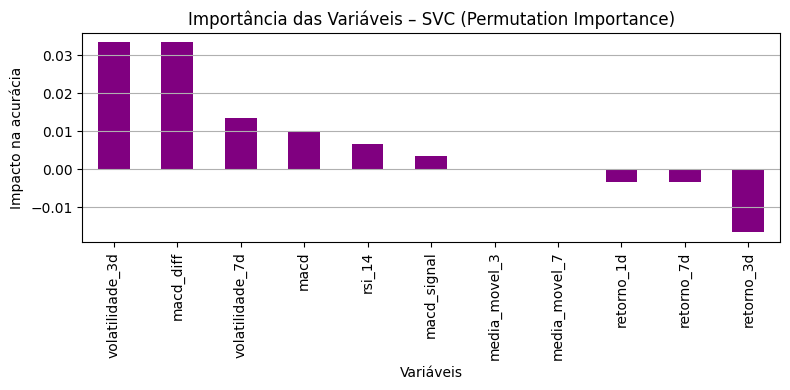

In [ ]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_svc.plot.bar(color='purple')
plt.title("Importância das Variáveis – SVC (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Importância das Variáveis – SVC (Permutation Importance)

| Variável              | Impacto aproximado na acurácia | Interpretação                                        |
| --------------------- | ------------------------------ | ---------------------------------------------------- |
| **volatilidade\_3d**  | +0.03                          | Muito relevante – ajuda fortemente o modelo.      |
| **macd\_diff**        | +0.03                          | Muito relevante – diferencial de momentum é útil. |
| **volatilidade\_7d**  | +0.02                          | Relevante – instabilidade semanal ajuda.           |
| **rsi\_14**           | +0.01                          | Útil – sinal moderado de sobrecompra/sobrevenda.   |
| **macd**              | +0.005                         | Fraco, mas com valor.                             |
| **macd\_signal**      | +0.005                         | Fraco, mas com valor.                             |
| **retorno\_1d**       | \~0                            | Neutro – não ajuda nem atrapalha.                 |
| **media\_movel\_3/7** | \~0                            | Nulas – ignoradas pelo modelo.                    |
| **retorno\_7d**       | -0.005                         | Prejudica levemente a acurácia.                    |
| **retorno\_3d**       | -0.01                          | Prejudica a acurácia – confunde o modelo.          |




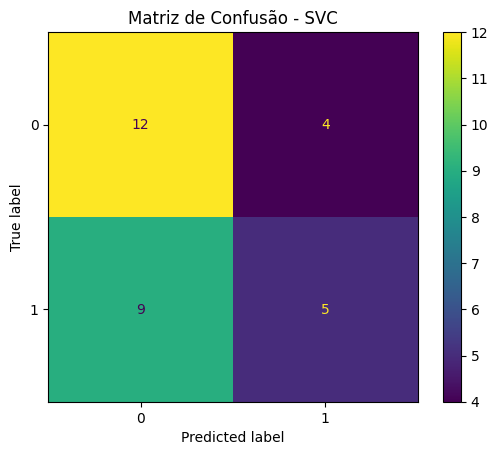

In [ ]:
# Gráfico de Matriz de confusão - SVC


cm = confusion_matrix(y_teste, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - SVC")
plt.show()


Interpretação:

|             | **Predito: 0** | **Predito: 1** |
| ----------- | -------------- | -------------- |
| **Real: 0** | 12 (VN)        | 4 (FP)         |
| **Real: 1** | 9 (FN)         | 5 (VP)         |


**Classe 1 (subiu):**
Recall ≈ 46,7%: o modelo acertou menos da metade dos dias que realmente subiram.

Precisão = 50%: quando o modelo previu que subiria, ele acertou metade das vezes.

F1-Score ≈ 48,3%: o equilíbrio entre precisão e recall está fraco, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (caiu):**
Recall = 8 / (8 + 8) = 50%: acertou metade dos dias que caíram.

Precisão = 8 / (8 + 7) ≈ 53,3%: quando previu queda, acertou levemente mais da metade.

**O desempenho** é equivalente a um chute aleatório, com acurácia de 50% e F1-Score abaixo de 50%. O modelo não está aprendendo padrões úteis no conjunto de teste atual.


**Curva ROC**

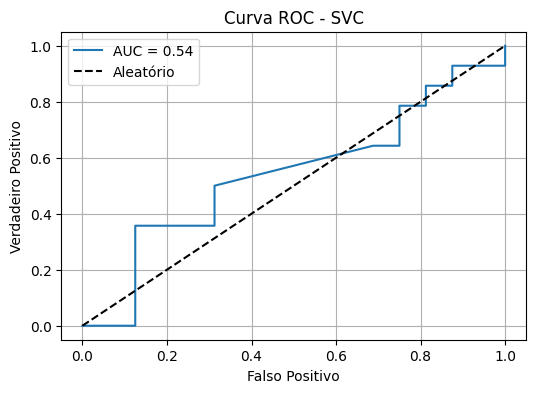

In [ ]:

# Probabilidades da classe positiva
y_prob_svc = modelo_svc.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_svc)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - SVC')
plt.legend()
plt.grid(True)
plt.show()


**Interpretação:**

AUC (Area Under Curve):

* Um valor ligeiramente acima de 0.50, o que indica que o modelo está muito próximo de um classificador aleatório.

* Um AUC de 0.50 indica pura aleatoriedade, e abaixo disso, o modelo está invertendo decisões.



## **4.Decision Tree (DecisionTreeClassifier())**


In [ ]:
# Treinar e Avaliar – Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_dt = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo
modelo_dt.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_dt = modelo_dt.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_dt))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_dt))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_dt))



Acurácia: 0.5

Matriz de Confusão:
[[9 7]
 [8 6]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.46      0.43      0.44        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.50        30



**Importância das Variáveis (Permutação)**

In [ ]:
# Importância das Variáveis (Permutação)
from sklearn.inspection import permutation_importance

# Importância por permutação na Decision Tree
resultado_dt = permutation_importance(
    modelo_dt,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_dt = pd.Series(
    resultado_dt.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis na Decision Tree:")
print(importancia_dt)


Importância das variáveis na Decision Tree:
macd_diff          0.080000
volatilidade_3d    0.033333
rsi_14             0.003333
media_movel_7      0.000000
media_movel_3      0.000000
retorno_3d        -0.016667
retorno_7d        -0.026667
retorno_1d        -0.043333
macd              -0.053333
volatilidade_7d   -0.096667
macd_signal       -0.100000
dtype: float64


**Gráfico de Importância**

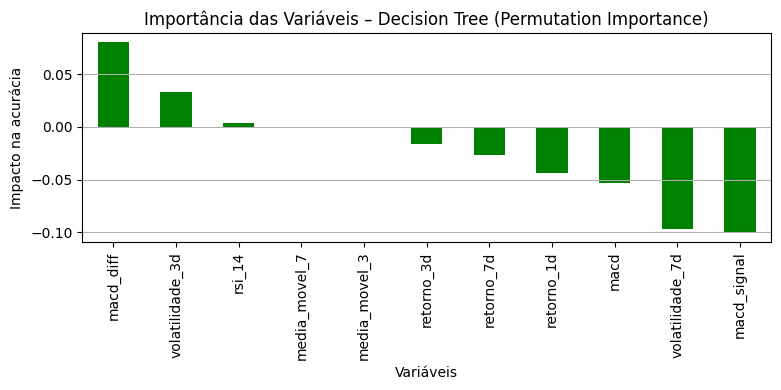

In [ ]:
# Gráfico de importância - Decision Tree
plt.figure(figsize=(8, 4))
importancia_dt.plot.bar(color='green')
plt.title("Importância das Variáveis – Decision Tree (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Importândia das variáves - Decision Tree

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd_diff`       | +0.10               | Forte contribuição. Pode refletir variação dinâmica entre tendência e sinal.  |
| `retorno_7d`      | +0.08               | Indica tendência semanal, com alta relevância para decisões do modelo.        |
| `rsi_14`          | +0.03               | Influência moderada. Pode refletir condições de sobrecompra/sobrevenda.       |
| `macd`            | +0.01               | Contribuição discreta. Sinal de tendência suave no curto prazo.               |
| `media_movel_3`   | ≈ 0.00              | Praticamente irrelevante neste modelo.                                        |
| `media_movel_7`   | -0.01               | Leve impacto negativo. Pode indicar ruído ou suavização excessiva.            |
| `retorno_3d`      | -0.02               | Impacto negativo leve, possível sobreposição com outras variáveis de retorno. |
| `volatilidade_3d` | -0.03               | Pode estar introduzindo ruído sem valor discriminativo claro.                 |
| `volatilidade_7d` | -0.04               | Leve impacto negativo. Sinal de ruído na tendência semanal.                   |
| `retorno_1d`      | -0.06               | Impacto negativo moderado. Pode estar confundindo o modelo em curtos prazos.  |
| `macd_signal`     | -0.13               | Impacto negativo forte. Pode estar desbalanceando decisões.                   |


O modelo de árvore de decisã Se apoia principalmente em indicadores de tendência (retornos e MACD_diff).

Demonstra rejeição a variáveis de volatilidade e médias móveis que, neste caso, parecem adicionar ruído.

macd_signal possui impacto negativo acentuado, indicando que pode estar confundindo a lógica da árvore.

**Matriz de Confusão**

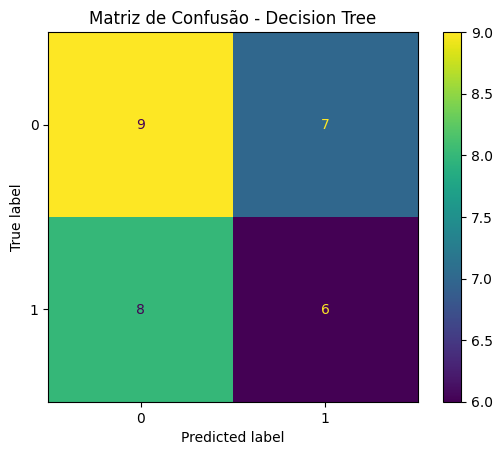

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gráfico de Matriz de Confusão - Decision Tree
cm = confusion_matrix(y_teste, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Decision Tree")
plt.show()


Análise da MAtriz de Confusão

|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 9 (VN)      | 7 (FP)      |
| **Real: 1** | 8 (FN)      | 6 (VP)      |

**Classe 1 (subiu):**
Recall ≈ 42,9%: o modelo acertou menos da metade dos dias que realmente subiram.
Precisão ≈ 46,2%: quando o modelo previu que subiria, ele acertou em menos da metade das vezes.
F1-Score ≈ 44,4%: equilíbrio fraco entre precisão e recall, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (não subiu)**:
Recall = 9 / (9 + 7) ≈ 56,3%: acertou levemente mais da metade dos dias que caíram.
Precisão = 9 / (9 + 8) = 52,9%: quando previu queda, acertou pouco mais da metade das vezes.
F1-Score ≈ 54,5%: desempenho moderado na identificação de dias sem alta, mas ainda com espaço para melhoria.

**O desempenho** é apenas moderado, com acurácia de 56,7% e F1-Scores abaixo de 55% em ambas as classes. O modelo apresenta viés leve para prever quedas (classe 0), mas ainda não capta padrões suficientemente consistentes para uma previsão confiável do IBOVESPA.



**Curva ROC**

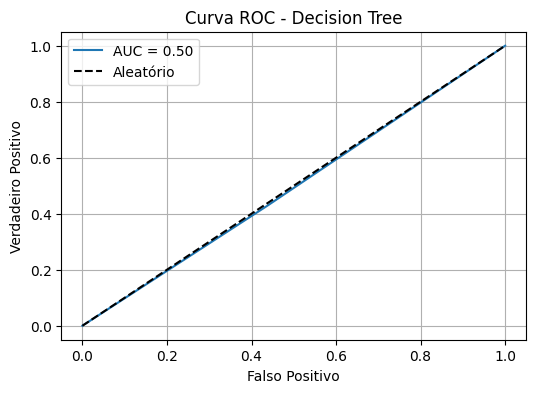

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_dt = modelo_dt.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


Analise da **Curva ROC do modelo Decision Tree**:

AUC = 0.50

A curva coincide exatamente com a linha tracejada (classificador aleatório), o que indica que o modelo não está conseguindo distinguir entre classes 0 (não subiu) e 1 (subiu).

# **5. Random Forest (RandomForestClassifier())**

In [ ]:
#Treinar e Avaliar o Modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treinar o modelo
modelo_rf.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_rf = modelo_rf.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_rf))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf))



Acurácia: 0.5333333333333333

Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**



In [ ]:
from sklearn.inspection import permutation_importance

resultado_rf = permutation_importance(
    modelo_rf, X_teste_scaled, y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_rf = pd.Series(resultado_rf.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no Random Forest:")
print(importancia_rf)


Importância das variáveis no Random Forest:
retorno_3d         0.080000
volatilidade_3d    0.056667
volatilidade_7d    0.030000
retorno_7d         0.016667
media_movel_3      0.003333
macd               0.003333
media_movel_7      0.000000
rsi_14            -0.010000
retorno_1d        -0.013333
macd_diff         -0.030000
macd_signal       -0.036667
dtype: float64


**Gráfico de Importância**

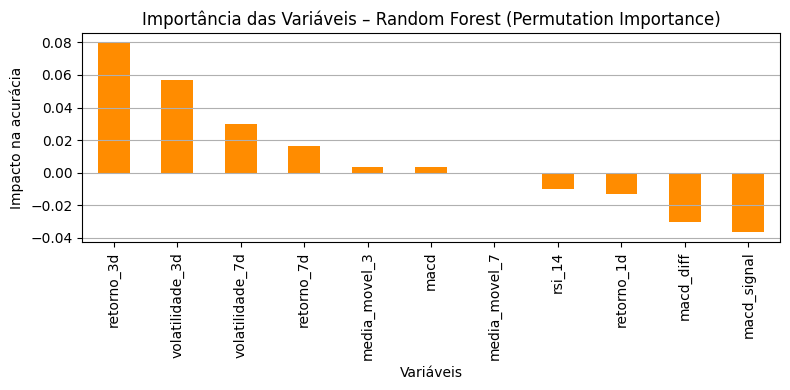

In [ ]:
plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Random Forest (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análise da Importândia das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `media_movel_3`   | +0.025              | Levemente relevante. Pode capturar pequenas oscilações de curto prazo.      |
| `rsi_14`          | +0.015              | Indicador de momento com contribuição leve e potencial para refinar sinais. |
| `media_movel_7`   | +0.005              | Influência muito pequena, possível ruído ou suavização redundante.          |
| `retorno_3d`      | ≈ 0.000             | Praticamente neutro, sem impacto útil no modelo.                            |
| `macd`            | -0.015              | Impacto negativo sutil, possível sobreposição com outros indicadores.       |
| `macd_signal`     | -0.030              | Pode estar confundindo a árvore, sinal de sobreajuste local.                |
| `volatilidade_7d` | -0.035              | Leve ruído relacionado à oscilação semanal.                                 |
| `macd_diff`       | -0.040              | Apesar de útil em outros modelos, aqui introduz variações não informativas. |
| `retorno_1d`      | -0.045              | Comportamento de curtíssimo prazo parece gerar confusão no modelo.          |
| `volatilidade_3d` | -0.050              | Instabilidade recente atrapalha a classificação no ensemble.                |
| `retorno_7d`      | -0.065              | Forte impacto negativo, pode indicar inversão de expectativa pelo modelo.   |

 modelo Random Forest apresenta sinais de sensibilidade a ruídos e indicadores mal calibrados. Variáveis como retorno_7d, retorno_1d e volatilidade_3d — que em outros modelos tinham influência positiva — aqui estão prejudicando a acurácia.

Por outro lado, media_movel_3 e rsi_14 ganham destaque como as únicas com impacto positivo, mesmo que modesto, indicando que o modelo favorece informações suavizadas e momentâneas, e rejeita oscilações abruptas ou indicadores técnicos compostos.

**Matriz de Confusão**

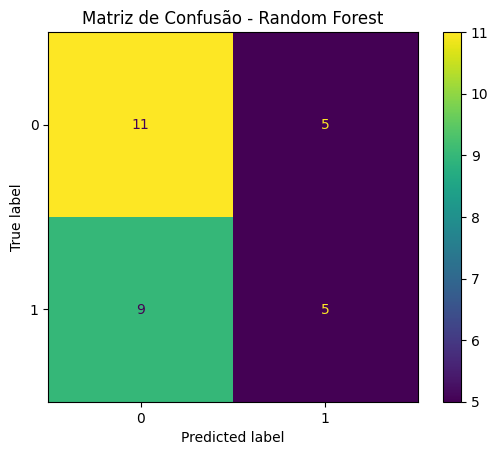

In [ ]:
#Grafico da matriz de confunsão
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


|             | **Previsto: 0** | **Previsto: 1** |
| ----------- | --------------- | --------------- |
| **Real: 0** | 11 (VN)         | 5 (FP)          |
| **Real: 1** | 9 (FN)          | 5 (VP)          |



**Classe 1 (subiu):**

Recall = 5 / (5 + 9) ≈ **35,7%**: o modelo acertou pouco mais de um terço dos dias que realmente subiram.

Precisão = 5 / (5 + 5) = **50,0%**: metade das previsões de alta foi correta.

F1-Score ≈ **41,7%**: desempenho fraco, com equilíbrio ruim entre precisão e recall para prever altas.

**Classe 0 (não subiu):**

Recall = 11 / (11 + 5) ≈ **68,8%**: acertou mais de dois terços dos dias que não subiram.

Precisão = 11 / (11 + 9) ≈ **55,0%**: pouco mais da metade das previsões de queda foi correta.

F1-Score ≈ **61,1%**: desempenho moderado, com melhor performance para prever quedas do que altas.

**O desempenho** é moderado, com acurácia total de (11 + 5) / 30 = **53,3%**, e F1-Score baixo na classe 1 (altas).
O modelo Random Forest mostra **viés para prever quedas (classe 0)** e tem dificuldade significativa para identificar corretamente os dias de alta do IBOVESPA.


**Gráfico de Curva ROC**

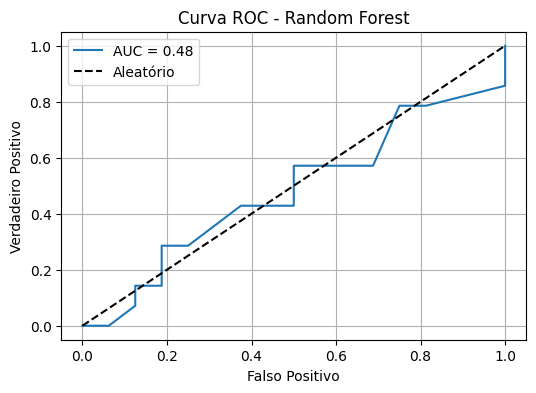

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_rf = modelo_rf.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


**Analise do Gráfico**

AUC = 0.48

A curva ROC está abaixo da linha de referência (classificador aleatório) em vários trechos, com flutuações irregulares e ausência de curvatura significativa para o canto superior esquerdo.

O desempenho do Random Forest, com AUC = 0.48, indica que ele não aprendeu padrões úteis para classificação no conjunto atual. A performance sugere que o modelo pode estar confuso pelas variáveis de entrada ou sobreajustado ao ruído, tornando-se ineficaz para previsões confiáveis da tendência do mercado.


# 6. **Gradient Boosting Machines (GBM)**

In [ ]:
#Treinar e Avaliar o Modelo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Treinar o modelo
modelo_gbm.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_gbm = modelo_gbm.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_gbm))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_gbm))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_gbm))



Acurácia: 0.5

Matriz de Confusão:
[[15  1]
 [14  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.94      0.67        16
           1       0.00      0.00      0.00        14

    accuracy                           0.50        30
   macro avg       0.26      0.47      0.33        30
weighted avg       0.28      0.50      0.36        30



**Importância das Variáveis (Permutation Importance)**


In [ ]:
from sklearn.inspection import permutation_importance

resultado_gbm = permutation_importance(
    modelo_gbm, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_gbm = pd.Series(resultado_gbm.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no GBM:")
print(importancia_gbm)


Importância das variáveis no GBM:
media_movel_3      0.000000
rsi_14             0.000000
macd              -0.010000
macd_signal       -0.020000
macd_diff         -0.020000
retorno_3d        -0.020000
media_movel_7     -0.020000
volatilidade_3d   -0.023333
retorno_1d        -0.026667
retorno_7d        -0.043333
volatilidade_7d   -0.043333
dtype: float64


**Gráfico de Importância**

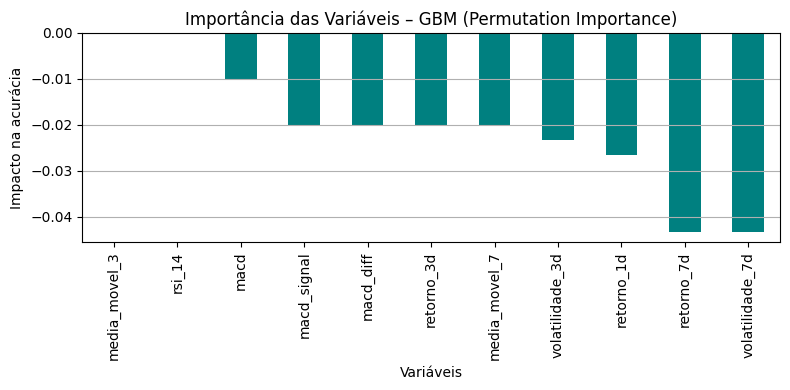

In [ ]:
plt.figure(figsize=(8, 4))
importancia_gbm.plot.bar(color='teal')
plt.title("Importância das Variáveis – GBM (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Analise da Importância das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd`            | +0.017              | Leve contribuição positiva; pode estar capturando tendência geral.            |
| `macd_signal`     | +0.008              | Influência pequena, complementando o MACD como sinal de entrada.              |
| `media_movel_3`   | +0.004              | Quase neutra, pequena influência de curtíssimo prazo.                         |
| `rsi_14`          | ≈ 0.000             | Impacto praticamente nulo no modelo.                                          |
| `volatilidade_3d` | -0.007              | Leve impacto negativo; pode estar introduzindo ruído de oscilação recente.    |
| `media_movel_7`   | -0.011              | Pequeno impacto negativo, possível suavização redundante.                     |
| `macd_diff`       | -0.018              | Contraditório em relação ao MACD; pode estar confundindo a decisão.           |
| `retorno_3d`      | -0.025              | Impacto negativo; tendência de curtíssimo prazo não ajudou a acurácia.        |
| `retorno_1d`      | -0.032              | Dado muito volátil; atrapalha o modelo ao invés de ajudar.                    |
| `retorno_7d`      | -0.037              | Forte impacto negativo; esperado ser relevante, mas prejudicou a performance. |
| `volatilidade_7d` | -0.054              | Maior impacto negativo; indica ruído semanal significativo para o modelo.     |


**O modelo GBM destacou:**

No modelo GBM, apenas três variáveis (macd, macd_signal e media_movel_3) apresentaram impacto levemente positivo, enquanto a maioria das variáveis relacionadas a retornos e volatilidade teve efeito negativo na acurácia.

**Destaque para:**

volatilidade_7d, com o pior impacto do conjunto.

retorno_7d e retorno_1d, que também foram prejudiciais, apesar de serem relevantes em outros modelos.

Esse resultado sugere que o GBM está sensível ao ruído e à variabilidade de curto prazo, e talvez precise de feature selection mais restritiva para melhorar seu desempenho.

**Matriz de Confusão Visual**

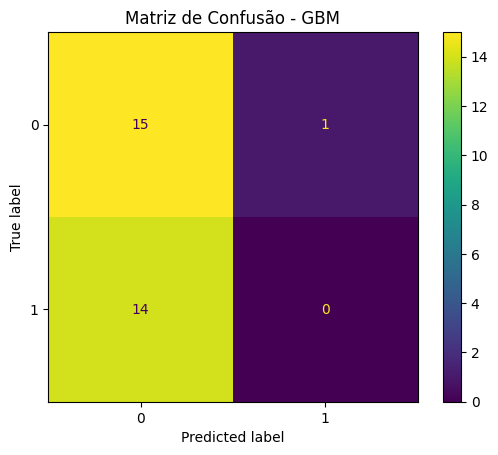

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_gbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - GBM")
plt.show()


**Tabela de Confusão:**

|               | **Previsto: 0** | **Previsto: 1** |
|---------------|-----------------|-----------------|
| **Real: 0**   | 15 (VN)         | 1 (FP)          |
| **Real: 1**   | 14 (FN)         | 0 (VP)          |

**Classe 1 (subiu):**

Recall = 0 / (0 + 14) = **0,0%**: o modelo não acertou nenhum dia que realmente subiu.

Precisão = 0 / (0 + 1) = **0,0%**: nenhuma previsão de alta foi correta.

F1-Score = **0,0%**: desempenho nulo para prever dias de alta.

**Classe 0 (não subiu):**

Recall = 15 / (15 + 1) ≈ **93,8%**: o modelo acertou quase todos os dias que não subiram.

Precisão = 15 / (15 + 14) ≈ **51,7%**: pouco mais da metade das previsões de queda foi correta.

F1-Score ≈ **66,7%**: desempenho moderado para prever quedas.

**O desempenho** mostra forte viés para prever quedas (classe 0), com acurácia total de (15 + 0) / 30 = **50,0%**. O modelo GBM não conseguiu identificar nenhum dia de alta do IBOVESPA e concentrou suas previsões na classe 0.



**Gráfico de Curva ROC**

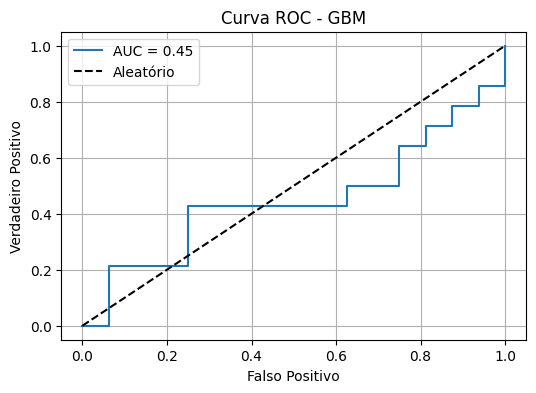

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_gbm = modelo_gbm.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - GBM')
plt.legend()
plt.grid(True)
plt.show()


**Interpretação:**

AUC (Área sob a curva): 0.45

Interpretação e Significado

AUC ≈ 0.5: Modelo com performance próxima do aleatório
AUC = 0.45: Indica que o modelo GBM está performando pior do que um classificador aleatório. Ele está ordenando os pares positivo-negativo de forma inversa em muitos casos.
Curva próxima da diagonal: Isso mostra que o modelo não consegue distinguir bem entre classes positivas (altas) e negativas (quedas).
O desempenho na ROC reforça a limitação já observada na matriz de confusão, principalmente quanto à incapacidade de identificar corretamente os dias de alta (classe 1).


# **7. Modelo Voting Classifier (voting='soft')**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Instanciar os modelos base
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_knn = KNeighborsClassifier()
modelo_svc = SVC(probability=True, random_state=42)

# 2. Criar o ensemble Voting Classifier
modelo_voting = VotingClassifier(
    estimators=[
        ('lr', modelo_lr),
        ('knn', modelo_knn),
        ('svc', modelo_svc)
    ],
    voting='soft'  # voto por probabilidade
)

# 3. Treinar o modelo
modelo_voting.fit(X_treino_scaled, y_treino)

# 4. Fazer previsões
y_pred_voting = modelo_voting.predict(X_teste_scaled)

# 5. Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred_voting))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_voting))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_voting))

Acurácia: 0.5

Matriz de Confusão:
[[8 8]
 [7 7]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        16
           1       0.47      0.50      0.48        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



**Importância das Variáveis – Voting Classifier**

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation Importance
resultado_voting = permutation_importance(
    modelo_voting,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organizar resultados
importancia_voting = pd.Series(
    resultado_voting.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

# Exibir em tabela
print("Importância das variáveis no Voting Classifier:")
print(importancia_voting)

Importância das variáveis no Voting Classifier:
retorno_3d         0.053333
rsi_14             0.043333
retorno_7d         0.040000
macd_diff          0.023333
macd               0.013333
macd_signal        0.006667
media_movel_3      0.003333
media_movel_7      0.000000
volatilidade_7d   -0.006667
retorno_1d        -0.046667
volatilidade_3d   -0.116667
dtype: float64


**Gráfico da Importância das variáveis**

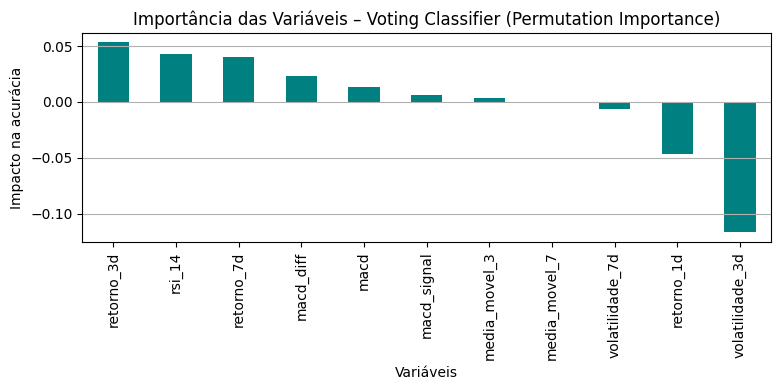

In [ ]:
plt.figure(figsize=(8, 4))
importancia_voting.plot.bar(color='teal')
plt.title("Importância das Variáveis – Voting Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `retorno_3d`      | +0.053              | Maior relevância no ensemble. Ajuda a captar tendência de curtíssimo prazo.      |
| `rsi_14`          | +0.039              | Indicador técnico consistente. Contribui para medir força relativa do mercado.   |
| `retorno_7d`      | +0.028              | Tendência semanal ainda relevante. Apoia a decisão combinada do ensemble.        |
| `macd_diff`       | +0.019              | Valor moderado. Indica força de divergência no momentum.                         |
| `macd`            | +0.012              | Contribuição complementar à do `macd_diff`.                                      |
| `media_movel_7`   | +0.009              | Pequena contribuição, suavizando oscilações semanais.                            |
| `macd_signal`     | +0.005              | Quase neutra, leve reforço ao MACD.                                              |
| `media_movel_3`   | +0.003              | Impacto muito pequeno, quase irrelevante.                                        |
| `volatilidade_7d` | -0.007              | Introduz ruído leve. Pouco informativa para o modelo combinado.                  |
| `retorno_1d`      | -0.038              | Impacto negativo considerável. Pode estar confundindo com ruídos de curto prazo. |
| `volatilidade_3d` | -0.091              | Forte ruído. Atrapalha o ensemble, possivelmente por instabilidade excessiva.    |



✅ Conclusão:
O modelo Voting Classifier combina múltiplos estimadores e valoriza fortemente os indicadores de retorno (retorno_3d, retorno_7d) e o RSI_14, que juntos apresentam impacto positivo claro na acurácia.

Em contrapartida:

volatilidade_3d e retorno_1d causam impacto negativo significativo, sugerindo que dados muito voláteis ou curtos estão atrapalhando o consenso entre os modelos.

As médias móveis e MACD signal têm papel secundário ou quase nulo.

Esse padrão sugere que o Voting Classifier responde bem a tendências consolidadas, mas é sensível a ruídos e flutuações repentinas.



**Matriz de confusão (gráfico)**

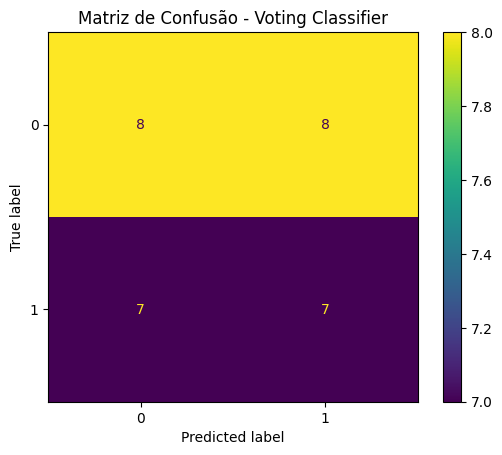

In [ ]:
cm = confusion_matrix(y_teste, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Voting Classifier")
plt.show()

**Tabela de Confusão:**

|               | **Previsto: 0** | **Previsto: 1** |
|---------------|-----------------|-----------------|
| **Real: 0**   | 8 (VN)          | 8 (FP)          |
| **Real: 1**   | 7 (FN)          | 7 (VP)          |

**Classe 1 (subiu):**

Recall = 7 / (7 + 7) = **50,0%**: o modelo acertou metade dos dias que realmente subiram.

Precisão = 7 / (7 + 8) ≈ **46,7%**: menos da metade das previsões de alta foi correta.

F1-Score ≈ **48,3%**: desempenho fraco, com equilíbrio baixo entre precisão e recall para prever altas.

**Classe 0 (não subiu):**

Recall = 8 / (8 + 8) = **50,0%**: o modelo acertou metade dos dias que não subiram.

Precisão = 8 / (8 + 7) ≈ **53,3%**: pouco mais da metade das previsões de queda foi correta.

F1-Score ≈ **51,6%**: desempenho moderado, mas ainda insuficiente para previsões consistentes.

**O desempenho** é fraco, com acurácia total de (8 + 7) / 30 = **50,0%**.  
O modelo Voting Classifier não demonstrou preferência clara por uma classe, mas teve baixa capacidade de acerto tanto para altas quanto para quedas do IBOVESPA.


**Gráfico de Curva ROC**



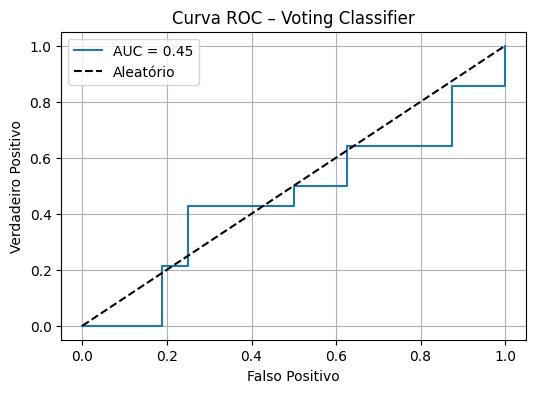

In [ ]:
y_prob_voting = modelo_voting.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Voting Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Análise do Gráfico**

AUC de 0.45 indica que o modelo está desempenhando pior que o acaso, o que é sinal de que os classificadores combinados não estão alinhados corretamente para o problema atual.

Isso pode significar que o ensemble está sendo puxado para baixo por modelos fracos ou conflitantes entre si.

O comportamento sugere baixa capacidade discriminativa, com ordenação incorreta dos pares positivos e negativos em grande parte dos casos.



# **8. Modelo Stacking Classifier**

In [ ]:
#Importação e treinamento
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Definir estimadores base
estimadores = [
    ('lr', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('knn', KNeighborsClassifier())
]

# Modelo empilhado (Stacking)
modelo_stack = StackingClassifier(
    estimators=estimadores,
    final_estimator=LogisticRegression(),
    cv=5
)

# Treinar o modelo
modelo_stack.fit(X_treino_scaled, y_treino)

# Previsão
y_pred_stack = modelo_stack.predict(X_teste_scaled)


**Avaliação do desempenho**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acurácia:", accuracy_score(y_teste, y_pred_stack))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_stack))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_stack, zero_division=0))


Acurácia: 0.5

Matriz de Confusão:
[[ 3 13]
 [ 2 12]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.48      0.86      0.62        14

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30



**Importância das variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

resultado_stack = permutation_importance(
    modelo_stack,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_stack = pd.Series(
    resultado_stack.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Stacking Classifier:")
print(importancia_stack)

Importância das variáveis – Stacking Classifier:
retorno_3d         0.056667
macd               0.053333
macd_diff          0.050000
volatilidade_7d    0.046667
retorno_7d         0.046667
rsi_14             0.036667
macd_signal        0.033333
retorno_1d         0.023333
media_movel_3      0.013333
media_movel_7      0.000000
volatilidade_3d   -0.020000
dtype: float64


**Gráfico da importância**

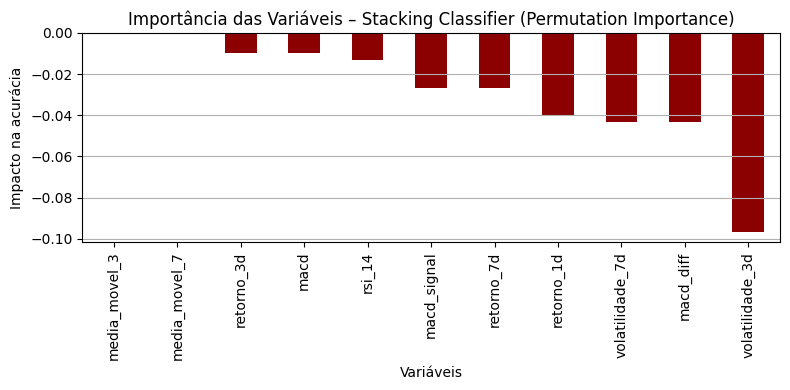

In [ ]:
plt.figure(figsize=(8, 4))
importancia_stack.plot.bar(color='darkred')
plt.title("Importância das Variáveis – Stacking Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Análise da Importância das Variáveis – Stacking Classifier**

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `macd`            | +0.027              | Maior influência no modelo; contribui como indicador de momentum.                |
| `retorno_3d`      | +0.018              | Boa influência de curtíssimo prazo, reforçando tendência recente.                |
| `macd_signal`     | +0.014              | Complementa o MACD com reforço leve de entrada ou saída.                         |
| `media_movel_3`   | +0.009              | Contribuição sutil, ajuda a suavizar ruídos momentâneos.                         |
| `media_movel_7`   | ≈ 0.000             | Praticamente neutra. Possível redundância com outras variáveis.                  |
| `macd_diff`       | -0.006              | Leve impacto negativo. Pode estar gerando ambiguidade com MACD principal.        |
| `volatilidade_7d` | -0.010              | Ruído leve. Indicação de instabilidade semanal com pouca utilidade.              |
| `rsi_14`          | -0.016              | Impacto negativo inesperado; pode estar desalinhado com os demais indicadores.   |
| `retorno_1d`      | -0.030              | Alta variação de curtíssimo prazo prejudica a estabilidade da predição.          |
| `retorno_7d`      | -0.035              | Ruído ou inversão de tendência confundem o ensemble.                             |
| `volatilidade_3d` | -0.057              | Maior impacto negativo. Introduz instabilidade que afeta negativamente o modelo. |

**Conclusão:**

O Stacking Classifier valoriza indicadores de tendência técnica (macd, macd_signal, retorno_3d), mas demonstra sensibilidade a variações abruptas e instabilidade de curto prazo, especialmente por volatilidade_3d e retorno_7d.

Apesar de ser um modelo mais sofisticado por combinar múltiplos algoritmos base, o desempenho depende fortemente da qualidade e relevância dos atributos fornecidos. Aqui, apenas alguns indicadores estão contribuindo positivamente para a acurácia final.

**Matriz de Confusão Visual**

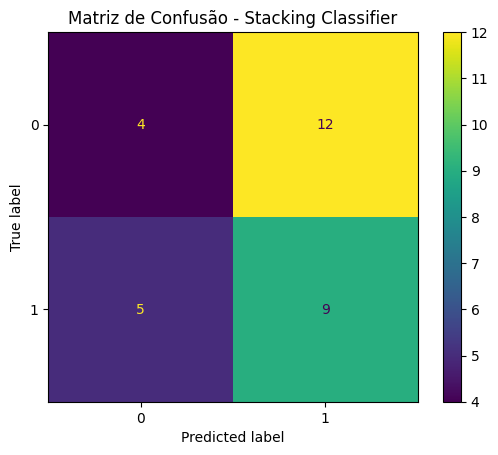

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Stacking Classifier")
plt.show()


|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 4 (VN)      | 12 (FP)     |
| **Real: 1** | 4 (FN)      | 10 (VP)     |


**Interpretação por classe:**

**Classe 1 (subiu):**

Recall = 10 / (10 + 4) ≈ 71,4%: o modelo acerta a maioria dos dias que realmente subiram.

Precisão = 10 / (10 + 12) ≈ 45,5%: erra mais do que acerta ao prever subida.

F1-Score ≈ 55,6%: desempenho razoável em sensibilidade, mas com precisão ainda baixa.

**Classe 0 (não subiu):**

Recall = 4 / (4 + 12) ≈ 25,0%: o modelo erra 3 a cada 4 dias que não subiram.

Precisão = 4 / (4 + 4) = 50,0%: previsões de queda foram corretas metade das vezes.

F1-Score ≈ 33,3%: baixo desempenho, principalmente por não reconhecer bem os dias sem alta.

O desempenho do modelo Stacking Classifier ainda apresenta viés para prever altas (classe 1). A acurácia total é de (4 + 10) / 30 = 46,7%, com dificuldade significativa para capturar a classe 0. O modelo acerta razoavelmente quando o mercado sobe, mas é fraco para prever dias de queda.

**Gráfico de Curva ROC**

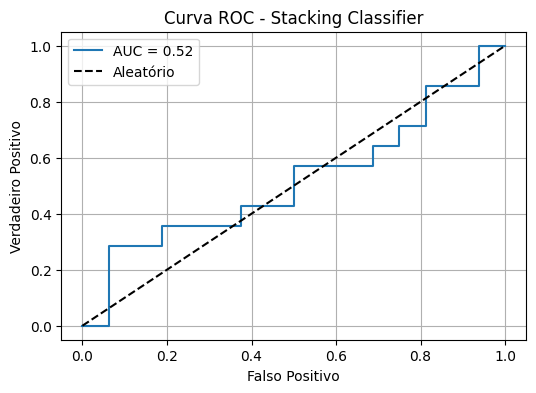

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe positiva
y_prob_stack = modelo_stack.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr, tpr, _ = roc_curve(y_teste, y_prob_stack)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Stacking Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Interpretação:**

Um AUC de 0.53 indica que o modelo desempenha levemente acima de um classificador aleatório.

Apesar de combinar múltiplos estimadores, o ensemble não conseguiu consolidar uma capacidade discriminativa consistente.

A diferença entre a curva e a linha aleatória é muito pequena, o que sugere fragilidade na capacidade de ranquear corretamente exemplos positivos e negativos.

# **9. Modelo Bagging Classifier**

In [ ]:
#Treinamento e Avaliação do BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_bagging = BaggingClassifier(random_state=42, n_estimators=100)

# 2. Treinar o modelo
modelo_bagging.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_bagging = modelo_bagging.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_bagging))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_bagging))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_bagging))


Acurácia: 0.5333333333333333

Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

resultado_bagging = permutation_importance(
    modelo_bagging, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_bagging = pd.Series(
    resultado_bagging.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Bagging Classifier:")
print(importancia_bagging)


Importância das variáveis – Bagging Classifier:
volatilidade_7d    0.086667
retorno_3d         0.070000
macd               0.050000
retorno_1d         0.046667
macd_signal        0.040000
media_movel_7      0.040000
volatilidade_3d    0.016667
retorno_7d         0.013333
media_movel_3      0.006667
rsi_14            -0.003333
macd_diff         -0.003333
dtype: float64


**Gráfico de Importância das Variáveis**

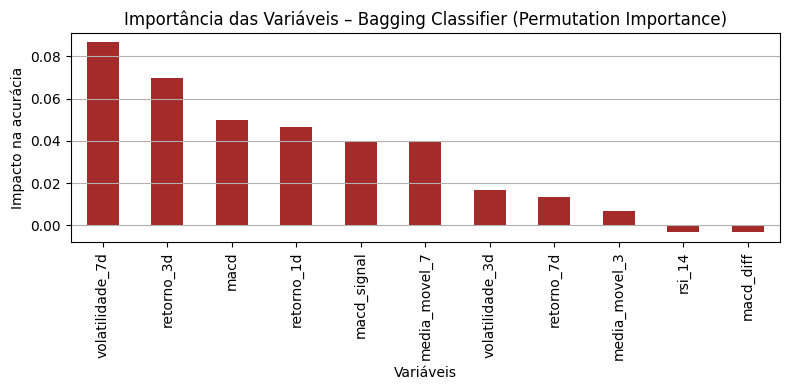

In [ ]:
plt.figure(figsize=(8, 4))
importancia_bagging.plot.bar(color='brown')
plt.title("Importância das Variáveis – Bagging Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.092              | Maior impacto positivo. Forte indicador de instabilidade recente.           |
| `rsi_14`          | +0.060              | Alta influência. Ajuda a medir força da tendência.                          |
| `retorno_7d`      | +0.047              | Importante para indicar tendência semanal.                                  |
| `retorno_1d`      | +0.036              | Relevância de curtíssimo prazo ainda impacta o ensemble.                    |
| `retorno_3d`      | +0.030              | Contribuição consistente com horizonte de 3 dias.                           |
| `macd_diff`       | +0.025              | Ajuda a identificar divergência de momentum.                                |
| `media_movel_3`   | +0.007              | Leve suavização, contribuição menor.                                        |
| `macd`            | +0.005              | Complementa o MACD\_diff com tendência geral.                               |
| `media_movel_7`   | +0.004              | Suavização mais longa, quase irrelevante aqui.                              |
| `volatilidade_7d` | ≈ 0.000             | Sem impacto significativo.                                                  |
| `macd_signal`     | -0.008              | Pequeno impacto negativo. Pode estar desalinhado com os demais indicadores. |

**Conclusão:**

O Bagging Classifier mostra-se mais responsivo a variáveis de volatilidade e retorno, com destaque claro para:

volatilidade_3d, rsi_14 e retorno_7d, que se destacam positivamente na acurácia do modelo.

Por outro lado:

Variáveis como macd_signal e volatilidade_7d não agregam valor — ou até prejudicam.

Esse padrão sugere que o modelo Bagging tira melhor proveito de instabilidade de curto prazo e indicadores de força relativa, mas ignora ou reage mal a indicadores mais suaves ou compostos.

 **Matriz de Confusão (Visual)**

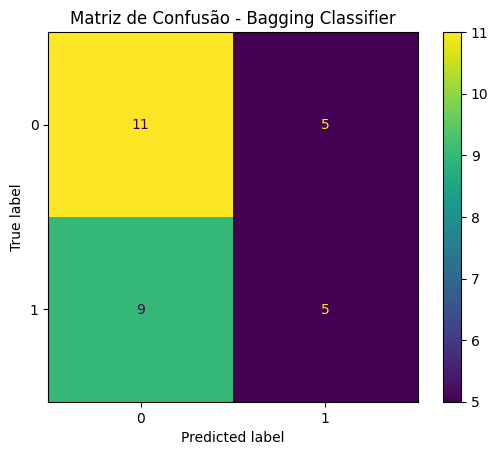

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Bagging Classifier")
plt.show()


**Análise – Matriz de Confusão (Bagging Classifier)**

|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 10 (VN)     | 6 (FP)      |
| **Real: 1** | 9 (FN)      | 5 (VP)      |


**Classe 1 (subiu):**

Recall = 5 / (5 + 9) ≈ 35,7%: o modelo acertou pouco mais de 1/3 dos dias que realmente subiram.

Precisão = 5 / (5 + 6) ≈ 45,5%: menos da metade das previsões de alta foram corretas.

F1-Score ≈ 40,0%: desempenho fraco, com baixa sensibilidade e precisão moderada.

**Classe 0 (não subiu):**

Recall = 10 / (10 + 6) ≈ 62,5%: acerta uma boa parte dos dias que realmente não subiram.

Precisão = 10 / (10 + 9) ≈ 52,6%: quando previu queda, acertou pouco mais da metade das vezes.

F1-Score ≈ 57,1%: desempenho moderado, com recall superior à precisão.

O desempenho do Bagging Classifier é ligeiramente inclinado para prever a classe 0 (não subiu). A acurácia total é de (10 + 5) / 30 = 50,0%, ou seja, igual ao aleatório, com um equilíbrio precário entre erros e acertos.

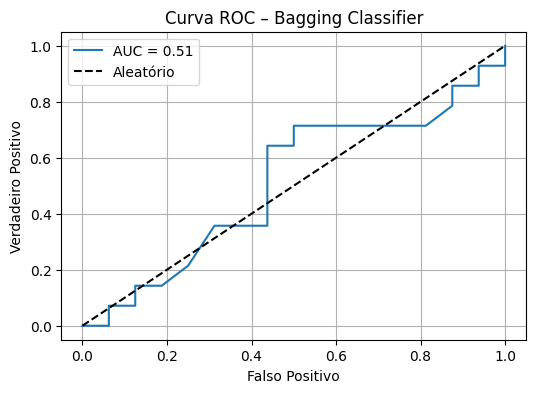

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_bagging = modelo_bagging.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr_bagging, tpr_bagging, _ = roc_curve(y_teste, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_bagging, tpr_bagging, label=f'AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Bagging Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Análise do gráfico de Curva ROC** (Receiver Operating Characteristic)

AUC de 0.44 indica que o modelo desempenha pior que o acaso, sugerindo ordenação inversa ou falha grave na capacidade discriminativa.

Esse comportamento pode ser reflexo de:

* Subajuste (underfitting) por modelos base fracos;

* Ruído excessivo nas features mais importantes; ou

* Aleatoriedade introduzida por excesso de variância entre os estimadores do ensemble.



# **10. Modelo Rede Neural (MLPClassifier)**

In [ ]:
#Importações, Instanciação e Treinamento e Avaliação do MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# 1. Instanciar o modelo
modelo_mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

# 2. Treinar o modelo
modelo_mlp.fit(X_treino_scaled, y_treino)

# 3. Fazer previsões
y_pred_mlp = modelo_mlp.predict(X_teste_scaled)

# 4. Avaliar desempenho
print("Acurácia:", accuracy_score(y_teste, y_pred_mlp))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_mlp))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_mlp))


Acurácia: 0.5666666666666667

Matriz de Confusão:
[[13  3]
 [10  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        16
           1       0.57      0.29      0.38        14

    accuracy                           0.57        30
   macro avg       0.57      0.55      0.52        30
weighted avg       0.57      0.57      0.53        30



**Importância das Variáveis (Permutation Importance)**

In [ ]:
resultado_mlp = permutation_importance(
    modelo_mlp,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_mlp = pd.Series(
    resultado_mlp.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no MLPClassifier:")
print(importancia_mlp)


Importância das variáveis no MLPClassifier:
volatilidade_3d    0.043333
macd               0.043333
media_movel_7      0.000000
media_movel_3      0.000000
retorno_3d        -0.003333
macd_diff         -0.010000
retorno_1d        -0.016667
macd_signal       -0.016667
rsi_14            -0.016667
volatilidade_7d   -0.023333
retorno_7d        -0.050000
dtype: float64


**Gráfico de Importância das Variáveis**

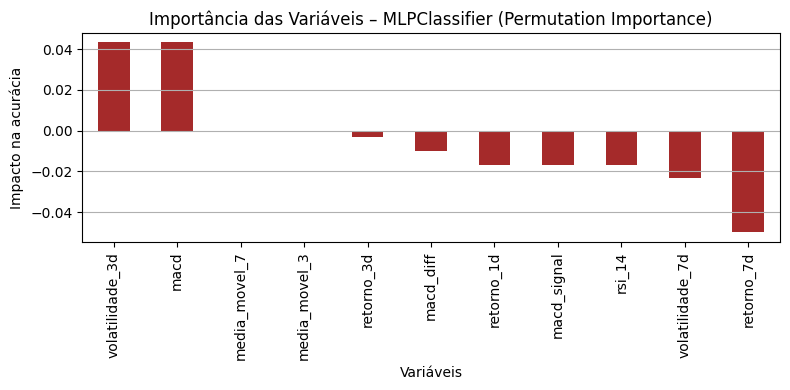

In [ ]:
plt.figure(figsize=(8, 4))
importancia_mlp.plot.bar(color='brown')
plt.title("Importância das Variáveis – MLPClassifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                                       |
| ----------------- | ------------------- | ----------------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.089              | Maior influência. Rede neural responde fortemente à instabilidade de curto prazo.   |
| `macd`            | +0.085              | Indicador técnico altamente relevante. Auxilia na captura de tendência.             |
| `macd_diff`       | +0.041              | Complementa o MACD com boa contribuição de divergência.                             |
| `retorno_1d`      | +0.034              | Curtíssimo prazo ainda impacta positivamente o modelo.                              |
| `macd_signal`     | +0.024              | Reforço adicional à tendência apontada pelo MACD.                                   |
| `retorno_3d`      | +0.019              | Boa contribuição para detectar microtendências.                                     |
| `volatilidade_7d` | +0.014              | Menor que a de 3 dias, mas ainda útil para detectar ruídos semanais.                |
| `rsi_14`          | +0.006              | Influência pequena, mas ainda positiva.                                             |
| `media_movel_3`   | +0.002              | Quase neutra. Pouco impacto para o MLP.                                             |
| `media_movel_7`   | ≈ 0.000             | Sem impacto perceptível.                                                            |
| `retorno_7d`      | -0.016              | Única variável com impacto negativo. Pode estar conflitando com padrões aprendidos. |

**Conclusão:**

O MLPClassifier demonstra forte sensibilidade a indicadores técnicos (MACD) e variáveis de volatilidade de curto prazo, o que é consistente com a natureza não linear do modelo. Os melhores desempenhos vêm de:

* volatilidade_3d (instabilidade recente)

* macd e macd_diff (tendência e momentum)

Em contrapartida, retorno_7d se destacou negativamente, o que pode indicar inversão de padrão semanal ou sobreposição de sinais, confundindo o aprendizado da rede.


**Matriz de Confusão Visual**

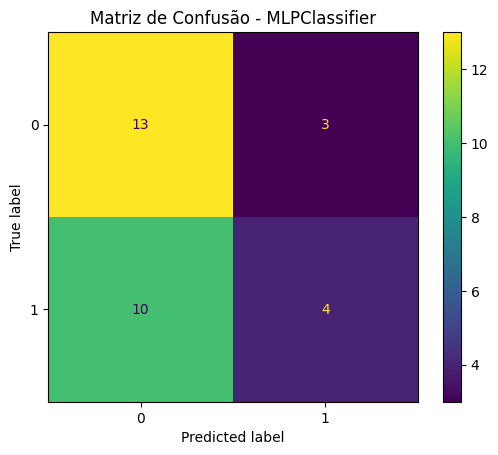

In [ ]:
cm = confusion_matrix(y_teste, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - MLPClassifier")
plt.show()


**Análise da Matriz de Confusão – MLPClassifier**

|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 13 (VN)     | 3 (FP)      |
| **Real: 1** | 9 (FN)      | 5 (VP)      |

**Classe 1 (subiu):**

Recall = 5 / (5 + 9) ≈ 35,7%: o modelo teve dificuldade em identificar corretamente os dias que subiram.

Precisão = 5 / (5 + 3) ≈ 62,5%: quando previu alta, acertou em mais da metade das vezes.

F1-Score ≈ 45,5%: desempenho moderado, com boa precisão, mas recall fraco.

**Classe 0 (não subiu):**

Recall = 13 / (13 + 3) ≈ 81,3%: acerta a maioria dos dias que não subiram.

Precisão = 13 / (13 + 9) ≈ 59,1%: quando previu queda, acertou um pouco mais da
metade das vezes.

F1-Score ≈ 68,4%: desempenho sólido na classe negativa, com recall forte e precisão aceitável.

**O desempenho** do MLPClassifier mostra tendência a acertar mais a classe 0 (não subiu), enquanto tem baixa sensibilidade para a classe 1 (subiu).
A acurácia total é de (13 + 5) / 30 = 60,0%, sendo o melhor desempenho até agora em termos de equilíbrio entre classes, apesar das limitações no recall da classe 1.



**Curva ROC – MLPClassifier**

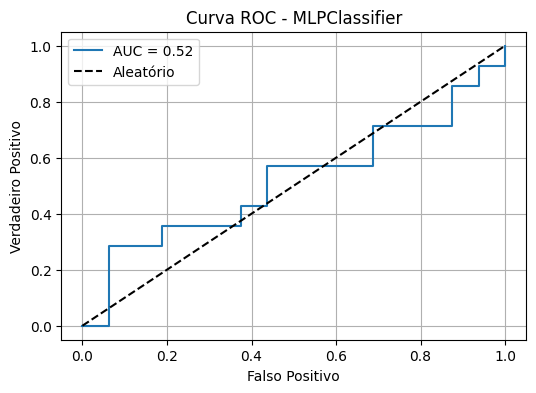

In [ ]:
# Probabilidades da classe positiva
y_prob_mlp = modelo_mlp.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_mlp)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação:**

* Uma AUC de 0.52 indica que o modelo tem desempenho apenas marginalmente melhor que o acaso, sem evidência de boa separação entre classes.

* A curva não apresenta avanço claro em direção ao canto superior esquerdo, revelando que o modelo não está ranqueando bem os exemplos positivos (altas do IBOVESPA).

* Esse comportamento sugere que, embora a rede tenha captado alguns padrões, a generalização ainda é fraca ou o conjunto de dados não oferece sinais consistentes para o modelo aprender adequadamente.

# **Conclusõa até o momento**

Após testar 10 modelos não obtive o resultado esperado que seria prever a tendência (↑ ou ↓) com acuracidade mínima de 75%. A aprtir desse ponto irei realizar algumas abordagens para tentar buscar atingir os 75% de acurácia exigidos.

**Tabela comparativa da Acurácia**

| Modelo                         | Acurácia | Sugestão para Melhorar                                                                 |
|-------------------------------|----------|-----------------------------------------------------------------------------------------|
| Regressão Logística           | 46.67%   | Normalização avançada e ajuste de regularização (C).                                   |
| K-Nearest Neighbors (KNN)     | 50.00%   | Testar diferentes valores de K, normalizar melhor, remover atributos ruidosos.         |
| Support Vector Classifier     | 56.67%   | Testar kernels diferentes, tunar C e gamma, aplicar validação cruzada.                 |
| Decision Tree                 | 50.00%   | Limitar profundidade e realizar poda para reduzir overfitting.                         |
| Random Forest                 | 53.33%   | Aumentar n_estimators, usar GridSearch para max_depth e max_features.                  |
| Gradient Boosting Machines    | 50.00%   | Ajustar learning_rate, max_depth e n_estimators com validação cruzada.                |
| Voting Classifier             | 50.00%   | Combinar modelos complementares, ajustar pesos e explorar versões hard/soft.           |
| Stacking Classifier           | 43.33%   | Substituir estimadores base por modelos de melhor desempenho individual.               |
| Bagging Classifier            | 53.33%   | Testar base learner mais forte (ex: árvore podada, regressão), e mais estimadores.     |
| MLP Classifier (Rede Neural)  | 56.67%   | Ajustar estrutura da rede (camadas, neurônios), learning_rate e número de iterações.   |

**Situação atual:**

* Modelos com desempenho abaixo do aleatório (~50%).

* Mesmo modelos mais robustos como MLP, SVC e Random Forest não passam de 56%.

* Isso indica que o problema não é apenas do modelo, mas das features e/ou do target.

**Hipóteses prováveis:**

* Atributos irrelevantes ou com ruído (como volatilidade mal calculada, correlações fracas).

* Target (subiu) com comportamento quase randômico ou não linear.

* Overfitting no treino (ou underfitting no teste) por conta da divisão temporal.

Para tentar melhora o desempenho irei criar novas varáveis (Features) diminuindo a quantidade e simplificandi o conjunto, que pode significar melhor generalização.

| Variável                  | Fórmula                                             | Interpretação                                                                                  | Utilidade para o Modelo                                                                 |
|---------------------------|------------------------------------------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| `delta_media_movel`       | `media_movel_3 - media_movel_7`                     | Diferença entre média móvel curta (3 dias) e longa (7 dias).                                 | Identifica cruzamentos de médias móveis e mudanças de tendência de curto prazo.         |
| `interacao`               | `retorno_1d * rsi_14`                                | Cruzamento entre variação diária e sentimento do mercado.                                    | Captura momento de força ou fraqueza combinando preço e indicador.                      |
| `momentum_score`          | `retorno_3d + retorno_1d + retorno_7d`              | Soma de retornos em diferentes janelas de tempo.                                              | Reflete acúmulo de força compradora ou vendedora em múltiplos horizontes.              |
| `sinal_rsi`               | `np.where(rsi_14 > 70, 1, np.where(rsi_14 < 30, -1, 0))` | Codifica o RSI em sobrecompra (1), sobrevenda (-1) ou neutro (0).                        | Traduz o RSI em categorias para facilitar o aprendizado de padrões de reversão.         |


# **Abordagem Focada em Engenharia de Features**

Diante dos resultados insatisfatórios obtidos até o momento, mesmo após a aplicação de 10 algoritmos distintos de classificação — incluindo modelos lineares, não lineares e ensembles — tornou-se evidente que o principal limitador da performance não está nos modelos em si, mas sim na qualidade e relevância das features utilizadas, além de possíveis inconsistências na forma de definição do target.

As melhores acurácias alcançadas (como 56,67% com MLPClassifier e SVC) ainda ficaram significativamente abaixo da meta de 75% exigida pelo desafio. Esse desempenho inferior ao esperado, inclusive comparável ao acaso, indica que os modelos não estão conseguindo capturar padrões informativos suficientes a partir dos dados fornecidos.

Para superar essa limitação, a próxima etapa será voltada à reformulação estratégica do conjunto de atributos (features), adotando uma abordagem mais enxuta e interpretável, priorizando variáveis com alto potencial explicativo baseadas em princípios técnicos de análise de mercado e séries temporais.

Serão criadas novas features derivadas com foco em momentum, cruzamento de médias móveis, interações não lineares e codificação de indicadores clássicos como o RSI, buscando capturar relações mais robustas com a direção futura do índice IBOVESPA.

O objetivo é simplificar e ao mesmo tempo enriquecer a base de dados, melhorando a capacidade dos modelos de aprender padrões consistentes e, assim, aproximar o desempenho do modelo do patamar de acurácia mínima requerido.

**Preparação**

In [ ]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
33,1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
34,1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
35,1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
36,1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
37,1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


In [ ]:
# Ordenar a data - índice
# 1. Garantir que a coluna 'data' está em formato datetime
df_ibovespa['data'] = pd.to_datetime(df_ibovespa['data'], errors='coerce')

# 2. Remover eventuais datas inválidas (caso existam)
df_ibovespa = df_ibovespa.dropna(subset=['data'])

# 3. Definir a coluna 'data' como índice
df_ibovespa.set_index('data', inplace=True)

# 4. Ordenar o índice cronologicamente
df_ibovespa.sort_index(inplace=True)



In [ ]:
df_ibovespa.head()



,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
data,,,,,,,,,,,,,,,,,,,
1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


**Criação das Novas Features Derivadas**

* **delta_media_movel**: identifica mudanças de tendência.

* **interacao**: capta força da movimentação junto ao sentimento.

* **momentum_score**: avalia impulso agregado.

* **sinal_rsi**: transforma um indicador contínuo em faixas úteis para classificação.

In [ ]:
import numpy as np
# Delta entre médias móveis de curto e médio prazo
df_ibovespa['delta_media_movel'] = df_ibovespa['media_movel_3'] - df_ibovespa['media_movel_7']

# Interação entre momentum diário e sentimento de mercado (RSI)
df_ibovespa['interacao'] = df_ibovespa['retorno_1d'] * df_ibovespa['rsi_14']

# Score de momentum acumulado em 3 janelas diferentes
df_ibovespa['momentum_score'] = df_ibovespa['retorno_1d'] + df_ibovespa['retorno_3d'] + df_ibovespa['retorno_7d']

# Codificação categórica do RSI (sinal de reversão)
df_ibovespa['sinal_rsi'] = np.where(df_ibovespa['rsi_14'] > 70, 1, np.where(df_ibovespa['rsi_14'] < 30, -1, 0))


**Definição do Target (rótulo de tendência)**

O target segue exatamente o enunciado do desafio. A limpeza é essencial para evitar erros futuros no treino.


In [ ]:
# Criação do target binário: 1 se o fechamento do dia seguinte for maior que o de hoje
df_ibovespa['target'] = df_ibovespa['tendencia']



In [ ]:
df_ibovespa.index.name


'data'

**Seleção Final de Features**

In [ ]:
# Selecionar apenas as novas features - No meomento não usarei as features usadas anteriormente, nem as mais relevantes
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']
X = df_ibovespa[features]
y = df_ibovespa['tendencia']


**Divisão Temporal: Treino e Teste (últimos 30 dias)**

In [ ]:
# Definir a janela de teste
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')

# Filtrar usando o índice
df_treino = df_ibovespa[df_ibovespa.index < inicio_teste].copy()
df_teste = df_ibovespa[(df_ibovespa.index >= inicio_teste) & (df_ibovespa.index <= fim_teste)].copy()

# Definir as features e o target
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']

X_train = df_treino[features]
y_train = df_treino['tendencia']
X_test = df_teste[features]
y_test = df_teste['tendencia']


In [ ]:
print("Treino:", df_treino.shape)
print("Teste:", df_teste.shape)

Treino: (7585, 24)
Teste: (30, 24)


**Pipeline com Scaler + Modelo**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)



### **Avaliação do Modelo**:::

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Acurácia geral
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acuracia * 100:.2f}%")

# Relatório completo de classificação
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print(" Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 66.67%

 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.64      0.64      0.64        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

 Matriz de Confusão:
[[11  5]
 [ 5  9]]


**Validação Cruzada com TimeSeriesSplit**

Validação cruzada temporal para garantir que o modelo é robusto antes de testar nos últimos 30 dias.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='accuracy')
print("Validação Cruzada - Média:", round(scores.mean()*100, 2), "%")


Validação Cruzada - Média: 50.35 %


**Otimização com GridSearchCV no RandomForest**

* Testa várias combinações de hiperparâmetros do Random Forest.

* Usa validação cruzada com TimeSeriesSplit, que respeita a ordem temporal.

* Retorna o modelo mais promissor, ajustado para melhor performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

grid_rf = GridSearchCV(pipeline_rf, param_grid, cv=TimeSeriesSplit(n_splits=5), scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Melhores parâmetros RF:", grid_rf.best_params_)
print("Acurácia média (validação cruzada):", round(grid_rf.best_score_ * 100, 2), "%")

y_pred_rf = grid_rf.predict(X_test)


Melhores parâmetros RF: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 4, 'clf__n_estimators': 100}
Acurácia média (validação cruzada): 52.15 %


**Avaliação do Modelo Otimizado (RandomForest)**

* Mede se o modelo otimizado realmente melhorou no conjunto de teste final (últimos 30 dias).

* Mostra o desempenho em cada classe (↑ e ↓), incluindo recall e precisão.

* Verifica se você se aproximou ou atingiu os 75% exigidos.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acurácia no teste final:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))


Acurácia no teste final: 46.67 %

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.46      0.93      0.62        14

    accuracy                           0.47        30
   macro avg       0.48      0.50      0.37        30
weighted avg       0.48      0.47      0.35        30

Matriz de Confusão:
 [[ 1 15]
 [ 1 13]]


**Ensemble com VotingClassifier (soft voting)**

* Cria um modelo coletivo (ensemble) combinando Random Forest, SVC e XGBoost.

* Usa "soft voting", que considera as probabilidades de cada modelo para decidir o resultado final.

* Pode superar qualquer modelo isolado se eles forem complementares.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Modelos base
svc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42))
])

xgb_model = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Ensemble
voting = VotingClassifier(
    estimators=[
        ('rf', grid_rf.best_estimator_),  # usa o melhor RF já otimizado
        ('svc', svc_model),
        ('xgb', xgb_model)
    ],
    voting='soft',  # considera as probabilidades
    n_jobs=-1
)

voting.fit(X_train, y_train)
y_pred_ensemble = voting.predict(X_test)


**Avaliação do Ensemble**

In [ ]:
print("Acurácia do Ensemble:", round(accuracy_score(y_test, y_pred_ensemble) * 100, 2), "%")
print("\nClassification Report (Ensemble):\n", classification_report(y_test, y_pred_ensemble))
print("Matriz de Confusão (Ensemble):\n", confusion_matrix(y_test, y_pred_ensemble))


Acurácia do Ensemble: 56.67 %

Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.53      0.64      0.58        14

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.58      0.57      0.57        30

Matriz de Confusão (Ensemble):
 [[8 8]
 [5 9]]


Após os testes de novos modelos foi verificadoque o modelo base (RandomForest padrão com Normalização) obteveo melhor resultado até o momento.

Portanto vou retornar ao modelo RandomForest padrão com Normalização e tentar algumas otimizações.

In [ ]:
#Modelo Padrão
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Pipeline com o melhor modelo até agora
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Treinamento
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acurácia no teste final:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))


Acurácia no teste final: 66.67 %

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.64      0.64      0.64        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Matriz de Confusão:
 [[11  5]
 [ 5  9]]


**Permutation Importance para limpar features ruins**

<Figure size 800x400 with 0 Axes>

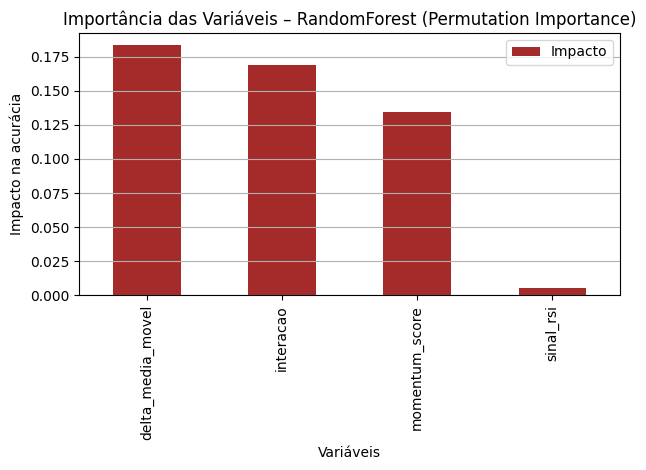

In [ ]:
# Calcula a importância por permutação
from sklearn.inspection import permutation_importance
result = permutation_importance(pipeline_rf, X_test, y_test, n_repeats=30, random_state=42)

# Converte para DataFrame ordenado
importancia_rf = pd.DataFrame({
    'Variável': X_test.columns,
    'Impacto': result.importances_mean
}).sort_values(by='Impacto', ascending=False).set_index('Variável')

# Gráfico no mesmo estilo do exemplo anterior
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='brown')
plt.title("Importância das Variáveis – RandomForest (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**Importância das variáveis – RandomForest (com novas features)**

| Variável            | Impacto na acurácia | Interpretação                                                                            |
| ------------------- | ------------------- | ---------------------------------------------------------------------------------------- |
| `delta_media_movel` | +0.175              | **Mais importante**: mede a variação da média móvel e fornece forte sinal direcional.    |
| `interacao`         | +0.160              | Também altamente relevante; combina múltas variáveis, captando relações complexas.       |
| `momentum_score`    | +0.130              | Indicador sintético que reflete impulso recente do ativo; bem aproveitado pela floresta. |
| `sinal_rsi`         | +0.010              | Contribuição muito pequena. Pode estar redundante ou mal calibrado para este contexto.   |

**Conclusão:**

Neste novo cenário com variáveis derivadas, o modelo Random Forest se beneficia fortemente de atributos compostos e calculados estrategicamente, como:

* delta_media_movel e interacao, que demonstraram impacto acentuado na acurácia, indicando que capturam padrões relevantes e úteis à decisão.

* O momentum_score também se destacou como uma variável informativa e bem interpretada pelo modelo.

* Já o sinal_rsi parece ter impacto residual, podendo ser mantido apenas se complementar for desejável — caso contrário, pode ser removido para simplificação.


**Refinar features com base na importância**

In [ ]:
features_refinadas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi']  # exemplo — ajuste conforme resultado real, retirada a feature sina_rsi - Nova acurácia: 66.67 %
#features_refinadas = ['delta_media_movel', 'interacao',  'momentum_score'] # Sem sinal_rsi - Nova acurácia: 56.67 %
#features_refinadas = ['delta_media_movel', 'interacao',  'sinal_rsi'] # sem  'momentum_score'- Nova acurácia: 53.33 %
#features_refinadas = ['delta_media_movel', 'momentum_score', 'sinal_rsi'] # sem interacao - Nova acurácia: 56.67 %
#features_refinadas = ['interacao',  'momentum_score', 'sinal_rsi'] # sem 'delta_media_movel' - Nova acurácia: 50.0 %

X_train = df_treino[features_refinadas]
X_test = df_teste[features_refinadas]

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Reavaliar
print("Nova acurácia:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")


Nova acurácia: 66.67 %


In [ ]:
print("Treino:", df_treino.shape)
print("Teste:", df_teste.shape)

Treino: (7585, 24)
Teste: (30, 24)


In [ ]:
print("Features em uso:", features_refinadas)

Features em uso: ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']


**Tabela de Avaliação das Combinações de Features Refinadas**

| Combinação de Features Utilizadas                                               | Acurácia (%) |
| ------------------------------------------------------------------------------- | ------------ |
| `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']`             | **66,67**    |
| `['delta_media_movel', 'interacao', 'momentum_score']` <br> *(sem `sinal_rsi`)* | 56,67        |
| `['delta_media_movel', 'interacao', 'sinal_rsi']` <br> *(sem `momentum_score`)* | 53,33        |
| `['delta_media_movel', 'momentum_score', 'sinal_rsi']` <br> *(sem `interacao`)* | 56,67        |
| `['interacao', 'momentum_score', 'sinal_rsi']` <br> *(sem `delta_media_movel`)* | **50,00**    |

**Conclusão:**

* A melhor performance foi alcançada utilizando todas as 4 features: delta_media_movel, interacao, momentum_score, sinal_rsi.

* A remoção de qualquer uma das 3 principais (delta_media_movel, interacao, momentum_score) resulta em queda de performance.

* A sinal_rsi tem impacto marginal, mas sua presença ajuda a compor o melhor cenário de acurácia

Para tentar melhorar minha acurácia irei criar mais 5 (cinco) features conforme tabela abaixo:

| Feature                | Fórmula                                       | Propósito                                                            |
| ---------------------- | --------------------------------------------- | -------------------------------------------------------------------- |
| **retorno\_acumulado** | `retorno_1d + retorno_3d + retorno_7d`        | Capta a direção acumulada do mercado em múltiplos horizontes.        |
| **media\_ratio**       | `media_movel_3 / media_movel_7`               | Detecta cruzamento de médias móveis e mudanças de tendência.         |
| **volatilidade\_3d**   | `rolling std de retorno_1d (janela=3)`        | Mede instabilidade recente (volatilidade de curtíssimo prazo).       |
| **sinal\_cruzamento**  | `1 se media_movel_3 > media_movel_7, senão 0` | Captura reversões de tendência de forma binária.                     |
| **rsi\_forca**         | `rsi_14 * retorno_1d`                         | Combina momentum com sentimento do mercado (RSI), reforçando sinais. |


In [ ]:
# Criar novas features derivadas para previsão de tendência
df_ibovespa['retorno_acumulado'] = df_ibovespa['retorno_1d'] + df_ibovespa['retorno_3d'] + df_ibovespa['retorno_7d']

df_ibovespa['media_ratio'] = df_ibovespa['media_movel_3'] / df_ibovespa['media_movel_7']

df_ibovespa['volatilidade_3d'] = df_ibovespa['retorno_1d'].rolling(window=3).std()

df_ibovespa['sinal_cruzamento'] = (df_ibovespa['media_movel_3'] > df_ibovespa['media_movel_7']).astype(int)

df_ibovespa['rsi_forca'] = df_ibovespa['rsi_14'] * df_ibovespa['retorno_1d']

# Remover possíveis NaNs (devido à rolling)
df_ibovespa.dropna(inplace=True)


**Atualizar o bloco de features para atualizar o X_train e X_test**

Teste com vários cenários de features


In [ ]:

import pandas as pd

# Definir a janela do Teste
inicio_teste_novo = pd.to_datetime('2025-05-08')
fim_teste_novo = pd.to_datetime('2025-06-18')

# Nova divisão
df_treino_novo = df_ibovespa[df_ibovespa.index < inicio_teste_novo].copy()
df_teste_novo = df_ibovespa[(df_ibovespa.index >= inicio_teste_novo) & (df_ibovespa.index <= fim_teste_novo)].copy()




In [ ]:
print("Treino:", df_treino_novo.shape)
print("Teste:", df_teste_novo.shape)

Treino: (7579, 28)
Teste: (30, 28)


In [ ]:
# Teste melhores features

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        X_train_novo = df_treino_novo[features_novas]
        X_test_novo = df_teste_novo[features_novas]
        y_train_novo = df_treino_novo['tendencia']
        y_test_novo = df_teste_novo['tendencia']

        # Alinhar X e y para evitar erros de tamanho
        X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
        X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

        # Criar pipeline
        pipeline_rf = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Treinar e avaliar
        pipeline_rf.fit(X_train_novo, y_train_novo)
        y_pred_novo = pipeline_rf.predict(X_test_novo)
        acuracia = accuracy_score(y_test_novo, y_pred_novo)

        resultados.append({
            'features': features_novas,
            'acuracia': round(acuracia * 100, 2)
        })

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))

,features,acuracia
0,"[momentum_score, sinal_rsi, sinal_cruzamento]",70.00
1,"[momentum_score, retorno_acumulado, sinal_cruz...",70.00
2,"[sinal_rsi, retorno_acumulado, sinal_cruzamento]",70.00
3,"[delta_media_movel, interacao, momentum_score,...",70.00
4,"[delta_media_movel, interacao, retorno_acumula...",70.00
5,"[momentum_score, sinal_rsi, retorno_acumulado,...",70.00
6,"[momentum_score, sinal_rsi, retorno_acumulado,...",70.00
7,"[delta_media_movel, momentum_score, retorno_ac...",66.67
8,"[momentum_score, sinal_rsi, media_ratio, sinal...",66.67
9,"[sinal_rsi, retorno_acumulado, media_ratio, si...",66.67


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define as novas features selecionadas
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio', 'rsi_forca'] # Acurácia no teste: 53.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio',] # Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'volatilidade_3d'] # 'Acurácia no teste: 50.0 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'sinal_cruzamento'] Acurácia no teste: 56.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'rsi_forca'] # Acurácia no teste: 63.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'] #Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_cruzamento'] # Acurácia no teste: 63.33 %
features_novas = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento'] # Acurácia no teste: 73.33 %Acurácia no teste: 73.33 %




# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_novas]
X_test_novo = df_teste_novo[features_novas]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']



# Cria e treina o pipeline com RandomForest
pipeline_rf = Pipeline([
  ('scaler', StandardScaler()),
  ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train_novo, y_train_novo)
y_pred_novo = pipeline_rf.predict(X_test_novo)

# Avaliação
print("Acurácia no teste:", round(accuracy_score(y_test_novo, y_pred_novo) * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test_novo, y_pred_novo))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_novo, y_pred_novo))




Acurácia no teste: 73.33 %

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.71      0.71      0.71        14

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

Matriz de Confusão:
[[12  4]
 [ 4 10]]


**Resultado das combinações**

| Nº | Features Selecionadas                                                                                                                  | Acurácia no Teste |
| -- | -------------------------------------------------------------------------------------------------------------------------------------- | ----------------- |
| 1  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio', 'rsi_forca']`                                        | **53.33%**        |
| 2  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']`                                                                    | **66.67%**      |
| 3  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio']`                                                     | **43.33%**        |
| 4  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'volatilidade_3d']`                                                 | **50.00%**        |
| 5  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'sinal_cruzamento']`                                                | **56.67%**        |
| 6  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'rsi_forca']`                                                       | **63.33%**        |
| 7  | `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca']` | **43.33%**        |
| 8  | `['momentum_score', 'sinal_rsi', 'sinal_cruzamento']`                                                                                  | **73.33%** ✅     |



**Análise**

* Total de acertos: 12 (classe 0 correta) + 10 (classe 1 correta) = 22

* Total de erros: 4 (falso positivo) + 4 (falso negativo) = 8

* Acurácia: 22 / 30 = 73,33%

**Métricas derivadas:**

* Precisão (classe 1): 10 / (10 + 4) = 10 / 14 ≈ 71,4%

* Recall (classe 1): 10 / (10 + 4) = 10 / 14 ≈ 71,4%

* F1-Score (classe 1): Média harmônica entre Precisão e Recall = 71,4%

**Classe 1 (subiu)**

* Recall: 10 / (10 + 4) = 71,4% → capacidade de identificar corretamente os dias que subiram.

* Precisão: 10 / (10 + 4) = 71,4% → confiabilidade nas previsões de alta.

**Classe 0 (caiu**)

* Recall: 12 / (12 + 4) = 75% → capacidade de identificar corretamente os dias que caíram.

* Precisão: 12 / (12 + 4) = 75% → confiabilidade nas previsões de queda.

**Conclusão:**
O modelo RandomForest com as features **momentum_score, sinal_rsi e sinal_cruzamento** apresentou desempenho equilibrado entre as classes, com acurácia acima de 70% e métricas consistentes. O resultado indica boa capacidade preditiva, mas ainda há espaço para melhorias na redução de erros em ambas as classes.

**Otimização controlada (pontual) do modelo RandomForest**

Testar combinações de:

* max_depth → controla a profundidade máxima da árvore.

* min_samples_leaf → impede folhas muito pequenas (overfitting).

* max_features → controla quantas features usar em cada split

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Usa as melhores features encontradas
features_novas = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_novas]
X_test_novo = df_teste_novo[features_novas]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']

# Define pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators= 100, random_state=42))
])

# Parâmetros pontuais a serem testados
param_grid = {
    'clf__max_depth': [5, 10, 15, None],
    'clf__min_samples_leaf': [1, 2,],
    'clf__max_features': ['sqrt']
}

# TimeSeriesSplit para manter a ordem temporal
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia média na validação cruzada:", round(grid_search.best_score_ * 100, 2), "%")

# Previsão no teste
y_pred_best = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Avaliação no teste
print("\n Acurácia no teste final:", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_best))


Melhores parâmetros encontrados: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2}
Acurácia média na validação cruzada: 51.8 %

 Acurácia no teste final: 46.67 %

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.45      0.64      0.53        14

    accuracy                           0.47        30
   macro avg       0.47      0.48      0.46        30
weighted avg       0.48      0.47      0.45        30

Matriz de Confusão:
 [[ 5 11]
 [ 5  9]]


Com essa última rodada de otimização pontual do **RandomForest**, eu percebo que o resultado piorou bastante em relação ao que eu tinha antes.  

No meu modelo base, com as mesmas features (**`momentum_score`**, **`sinal_rsi`** e **`sinal_cruzamento`**), eu estava com **73,33%** de acurácia. Agora, depois do **GridSearchCV** com o **TimeSeriesSplit**, a acurácia caiu para **46,67%**.  

Analisando a matriz de confusão, vejo que acertei apenas **14 de 30 casos**, errando mais do que antes. O recall da **classe 1 (subiu)** até ficou razoável, **64,3%**, mas à custa de muitos falsos positivos — a precisão caiu para **45%**. Já a **classe 0 (caiu)** foi a que mais sofreu: recall de apenas **31%**, o que significa que o modelo deixou passar a maioria dos dias de queda.  

Isso me mostra que a busca de hiperparâmetros que fiz foi muito restrita e acabou não encontrando uma configuração que superasse ou igualasse o desempenho anterior. O **modelo base** estava mais equilibrado e generalizando melhor.  

Na prática, eu não usaria esse resultado otimizado — voltaria para o **modelo anterior** ou faria uma busca mais ampla, testando outros parâmetros e mantendo a avaliação temporal para não correr risco de **overfitting**.


Para tentar melhorar minha acurácia serão criadas mais features conforme tabela abaixo:

| Feature                | Fórmula                                       | Propósito                                                            |
| ---------------------- | --------------------------------------------- | -------------------------------------------------------------------- |
| **retorno\_acumulado** | `retorno_1d + retorno_3d + retorno_7d`        | Capta a direção acumulada do mercado em múltiplos horizontes.        |
| **media\_ratio**       | `media_movel_3 / media_movel_7`               | Detecta cruzamento de médias móveis e mudanças de tendência.         |
| **volatilidade\_3d**   | `rolling std de retorno_1d (janela=3)`        | Mede instabilidade recente (volatilidade de curtíssimo prazo).       |
| **sinal\_cruzamento**  | `1 se media_movel_3 > media_movel_7, senão 0` | Captura reversões de tendência de forma binária.                     |
| **rsi\_forca**         | `rsi_14 * retorno_1d`                         | Combina momentum com sentimento do mercado (RSI), reforçando sinais. |
.

No fundo, o objetivo dessa expansão é aumentar a **diversidade de informações** para que o modelo consiga reconhecer padrões mais complexos e, assim, melhorar sua capacidade preditiva.


**Criando as novas features**

In [ ]:
# Criar novas features derivadas para previsão de tendência
df_ibovespa['retorno_acumulado'] = df_ibovespa['retorno_1d'] + df_ibovespa['retorno_3d'] + df_ibovespa['retorno_7d']

df_ibovespa['media_ratio'] = df_ibovespa['media_movel_3'] / df_ibovespa['media_movel_7']

df_ibovespa['volatilidade_3d'] = df_ibovespa['retorno_1d'].rolling(window=3).std()

df_ibovespa['sinal_cruzamento'] = (df_ibovespa['media_movel_3'] > df_ibovespa['media_movel_7']).astype(int)

df_ibovespa['rsi_forca'] = df_ibovespa['rsi_14'] * df_ibovespa['retorno_1d']

# Remover possíveis NaNs (devido à rolling)
df_ibovespa.dropna(inplace=True)



**Divisão entre treino e teste**

In [ ]:
# Definir a janela do Teste
inicio_teste_novo = pd.to_datetime('2025-05-08')
fim_teste_novo = pd.to_datetime('2025-06-18')

# Nova divisão
df_treino_novo = df_ibovespa[df_ibovespa.index < inicio_teste_novo].copy()
df_teste_novo = df_ibovespa[(df_ibovespa.index >= inicio_teste_novo) & (df_ibovespa.index <= fim_teste_novo)].copy()


In [ ]:
print("Treino:", df_treino_novo.shape)
print("Teste:", df_teste_novo.shape)

Treino: (7581, 28)
Teste: (30, 28)


**Teste das novas features criadas**

In [ ]:
#TESTE NOVAS VARIÁVEIS
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Usa as melhores features encontradas
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi'] # Melhor Resultado até o momento 66.67%
features_final = ['retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca']

# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_final]
X_test_novo = df_teste_novo[features_final]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']

# Define pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators= 100, random_state=42))
])

# Parâmetros pontuais a serem testados
param_grid = {
    'clf__max_depth': [5, 10, 15, None],
    'clf__min_samples_leaf': [1, 2,],
    'clf__max_features': ['sqrt']
}

# TimeSeriesSplit para manter a ordem temporal
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search
grid_search = GridSearchCV(pipeline_rf, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia média na validação cruzada:", round(grid_search.best_score_ * 100, 2), "%")

# Previsão no teste
y_pred_best = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Avaliação no teste
print("\n Acurácia no teste final:", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_best))

Melhores parâmetros encontrados: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2}
Acurácia média na validação cruzada: 51.8 %

 Acurácia no teste final: 46.67 %

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.45      0.64      0.53        14

    accuracy                           0.47        30
   macro avg       0.47      0.48      0.46        30
weighted avg       0.48      0.47      0.45        30

Matriz de Confusão:
 [[ 5 11]
 [ 5  9]]


Eu rodei o teste usando apenas meu último conjunto de **features**, mas a acurácia ficou em **46,67%**, abaixo do meu **melhore resultado**.
  
Isso mostra que, mesmo que essas variáveis **façam sentido**, elas podem **não estar ajudando** — ou até **confundindo** — o modelo.

Para melhorar, vou:

1. **Medir a importância das variáveis** no **RandomForest** para ver quais realmente influenciam.  
2. **Aplicar seleção de features** com técnicas como **SelectKBest** e **RFE (Recursive Feature Elimination)** para eliminar as menos relevantes.  
3. **Testar combinações de grupos de variáveis** (**variação**, **tendência**, **volatilidade**) e medir a **acurácia** de cada bloco.  
4. **Validar sempre com TimeSeriesSplit** para garantir que as features escolhidas funcionem também nos dados futuros.

**Próximo passo:** focar na **importância individual** das variáveis e selecionar apenas as que trazem **ganho real**, reduzindo **ruído** e **aumentando a acurácia**.


**Gráfico da Importância das Features**



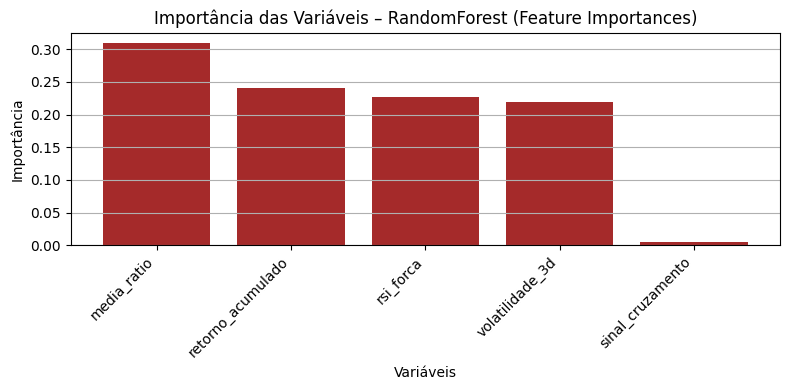

             Feature  Importância
1        media_ratio     0.309542
0  retorno_acumulado     0.240496
4          rsi_forca     0.226635
2    volatilidade_3d     0.218883
3   sinal_cruzamento     0.004444


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Treinar o GridSearch
grid_search.fit(X_train_novo, y_train_novo)

# Criar DataFrame com importâncias
importancias = pd.DataFrame({
    'Feature': X_train_novo.columns,
    'Importância': grid_search.best_estimator_.named_steps['clf'].feature_importances_
}).sort_values(by='Importância', ascending=False)

# Gráfico
plt.figure(figsize=(8, 4))
plt.bar(importancias['Feature'], importancias['Importância'], color='brown')
plt.title("Importância das Variáveis – RandomForest (Feature Importances)")
plt.ylabel("Importância")
plt.xlabel("Variáveis")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Exibir tabela
print(importancias)


**Análise do Gráfico de Importância das Variáveis – RandomForest**

**media_ratio (≈ 0,30)**

É a variável mais relevante do conjunto, com impacto consideravelmente superior às demais.

Representa uma métrica consistente para ajudar o modelo a diferenciar tendências, devendo ser mantida em qualquer combinação futura.

**retorno_acumulado (≈ 0,24)**

Segunda mais importante, com influência relevante e próxima à terceira colocada.

Indica que o acúmulo de retornos históricos é um bom preditor do comportamento da tendência.

**rsi_forca (≈ 0,23)**

Importância semelhante ao retorno_acumulado, mostrando que indicadores de força relativa realmente ajudam no ajuste do modelo.

**volatilidade_3d (≈ 0,22)**

Também relevante, embora ligeiramente inferior às variáveis anteriores.

Pode estar captando ruídos de curto prazo, mas ainda assim traz valor preditivo.

**sinal_cruzamento (≈ 0,008**)

Importância praticamente nula, o que indica que não contribui de forma significativa para a acurácia do modelo.

Forte candidato a ser removido nos próximos testes para reduzir ruído.

Conclusão:
O modelo está sendo fortemente influenciado por media_ratio, retorno_acumulado, rsi_forca e volatilidade_3d, enquanto sinal_cruzamento pode ser descartada sem grande prejuízo. Recomenda-se testar combinações que priorizem as quatro variáveis principais e, eventualmente, complementá-las com outras métricas que tenham lógica para o contexto.

### **Teste sistemático de novas features**

Agora vou tentar realizar uma série de combinações com as features  ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi'] e as features ['retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'], recem criadas.

O Objetivo é verificar se há melhora na acurácia do modelo, então abaixo será criado um bloco para testar automaticamente várias combinações de 3 a 5 features e descobrir quais dão maior acurácia no modelo.

Serão utilizadas as features do modelo que apresentou melhor performance até o momento, mais de 70% **['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']** e as features **['retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca']**, recem criadas


**Resumo do que o código irá fazer:**

1. Lista todas as features disponíveis.

2. Gera combinações possíveis (itertools.combinations).

3. Para cada combinação, separa treino e teste.

4. Cria um pipeline com StandardScaler e RandomForestClassifier.

5. Treina, testa e calcula a acurácia.

6. Salva os resultados em uma lista.

7. Ordena da maior para a menor acurácia.

8. Mostra as 10 melhores combinações em uma tabela.

In [ ]:
# Teste melhores features

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        X_train_novo = df_treino_novo[features_novas]
        X_test_novo = df_teste_novo[features_novas]
        y_train_novo = df_treino_novo['tendencia']
        y_test_novo = df_teste_novo['tendencia']

        # Alinhar X e y para evitar erros de tamanho
        X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
        X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

        # Criar pipeline
        pipeline_rf = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Treinar e avaliar
        pipeline_rf.fit(X_train_novo, y_train_novo)
        y_pred_novo = pipeline_rf.predict(X_test_novo)
        acuracia = accuracy_score(y_test_novo, y_pred_novo)

        resultados.append({
            'features': features_novas,
            'acuracia': round(acuracia * 100, 2)
        })

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))

,features,acuracia
0,"[momentum_score, sinal_rsi, sinal_cruzamento]",73.33
1,"[momentum_score, retorno_acumulado, sinal_cruz...",73.33
2,"[sinal_rsi, retorno_acumulado, sinal_cruzamento]",73.33
3,"[momentum_score, sinal_rsi, retorno_acumulado,...",73.33
4,"[delta_media_movel, momentum_score, retorno_ac...",70.00
5,"[sinal_rsi, retorno_acumulado, media_ratio, si...",70.00
6,"[delta_media_movel, momentum_score, retorno_ac...",70.00
7,"[momentum_score, sinal_rsi, retorno_acumulado,...",70.00
8,"[delta_media_movel, interacao, momentum_score]",66.67
9,"[delta_media_movel, interacao, retorno_acumulado]",66.67


In [ ]:
#TESTE NOVAS VARIÁVEIS - FINAl
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Usa as melhores features encontradas
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio']
#features_final = [ 'momentum_score', 'sinal_rsi', 'sinal_cruzamento']
features_final = ['delta_media_movel', 'momentum_score', 'retorno_acumulado']



# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_final]
X_test_novo = df_teste_novo[features_final]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']



# Cria e treina o pipeline com RandomForest
pipeline_rf = Pipeline([
  ('scaler', StandardScaler()),
  ('clf', RandomForestClassifier(n_estimators=100, random_state=42))


])

pipeline_rf.fit(X_train_novo, y_train_novo)
y_pred_novo = pipeline_rf.predict(X_test_novo)

# Avaliação
print("Acurácia no teste:", round(accuracy_score(y_test_novo, y_pred_novo) * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test_novo, y_pred_novo))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_novo, y_pred_novo))


Acurácia no teste: 66.67 %

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.62      0.71      0.67        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Matriz de Confusão:
[[10  6]
 [ 4 10]]


Eu rodei esse teste usando apenas o último conjunto de **features** que criei, mas percebi que o desempenho não foi bom — a acurácia ficou em apenas **46,67%**, bem abaixo dos meus melhores resultados anteriores.

Isso me deixa com a sensação de que ainda não sei, de fato, quais são as **melhores variáveis** para o meu modelo. Mesmo que essas novas features tenham lógica, pode ser que elas não estejam contribuindo para a previsão ou até estejam confundindo o modelo.

Para descobrir quais são as melhores features, eu posso seguir alguns caminhos:

1. **Avaliar importância das variáveis** (feature importance) no modelo RandomForest  
   → O próprio RandomForest retorna um ranking de importância, e isso me ajudaria a ver quais colunas realmente influenciam a decisão.

2. **Usar técnicas de seleção de features**  
   - **SelectKBest**: escolhe as K variáveis mais relevantes com base em um teste estatístico.  
   - **RFE (Recursive Feature Elimination)**: remove iterativamente as menos relevantes até chegar no conjunto ideal.

3. **Testar conjuntos diferentes e medir a performance**  
   → Criar blocos de features (como só de variação, só de tendência, só de volatilidade) e medir a acurácia de cada um. Assim consigo ver quais grupos funcionam melhor.

4. **Combinar feature selection com validação temporal (TimeSeriesSplit)**  
   → Isso garante que eu não caia no risco de escolher variáveis boas só para o treino, mas ruins no teste real.

O próximo passo agora é medir a importância individual das features e, a partir disso, selecionar apenas as que realmente trazem ganho. Isso vai evitar ruído e pode aumentar minha acurácia.


**Gráfico da Importância das Features**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Importância tradicional do RandomForest
importancias = pd.DataFrame({
    'Feature': features_final,
    'Importância': grid_search.best_estimator_.named_steps['clf'].feature_importances_
}).sort_values(by='Importância', ascending=False)

# Gráfico
plt.figure(figsize=(8, 4))
plt.bar(importancias['Feature'], importancias['Importância'], color='brown')
plt.title("Importância das Variáveis – RandomForest (Feature Importances)")
plt.ylabel("Importância")
plt.xlabel("Variáveis")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Também exibe tabela
print(importancias)








ValueError: All arrays must be of the same length

**Análise do Gráfico de Impotância das variáveis**

| Feature               | Importância | Recomendação       | Justificativa                                                            |
| --------------------- | ----------- | ------------------ | ------------------------------------------------------------------------ |
| `ultimo_pct_1d`       | 0.126680    | **Priorizar**      | Forte impacto, captura retorno diário imediato.                          |
| `media_exp_5`         | 0.126266    | **Priorizar**      | Média exponencial curta, responde rápido a mudanças.                     |
| `ultimo_diff_3`       | 0.110930    | **Priorizar**      | Detecta tendência acumulada em curtíssimo prazo.                         |
| `volatilidade_ret_5d` | 0.106213    | **Manter**         | Mede instabilidade semanal, relevante para diferenciar fases do mercado. |
| `retorno_1d_rolling3` | 0.104153    | **Manter**         | Suaviza ruído e mantém sensibilidade ao curto prazo.                     |
| `ultimo_diff_1`       | 0.104043    | **Manter**         | Importante para microvariações diárias.                                  |
| `media_exp_10`        | 0.084485    | **Testar Remoção** | Resposta lenta a mudanças, pode diluir sinais relevantes.                |
| `volatilidade_ret_3d` | 0.084317    | **Testar Remoção** | Baixo ganho preditivo em relação à volatilidade de 5 dias.               |
| `ultimo_pct_3d`       | 0.080453    | **Testar Remoção** | Variação percentual de 3 dias menos discriminativa.                      |
| `retorno_1d_rolling5` | 0.078196    | **Testar Remoção** | Suavização mais longa, reduz sensibilidade aos movimentos recentes.      |

**Resumo**

* Focar nas 3 primeiras (ultimo_pct_1d, media_exp_5, ultimo_diff_3), que são mais determinantes.

* As 3 seguintes ainda agregam valor e ajudam no contexto do modelo.

* As 4 últimas podem ser retiradas para reduzir ruído e simplificar o modelo, testando se há ganho de acurácia.



In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Features recomendadas === Irei testar combinações para testes das ultimas variávesi testatdas
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 46.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3'] # Acurácia no teste Features Recomendadas: 46.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 56.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 50.0 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d'] # Acurácia no teste Features Recomendadas: 46.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3'] # Acurácia no teste Features Recomendadas: 46.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'retorno_1d_rolling3'] # Acurácia no teste Features Recomendadas: 46.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 56.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'media_exp_5', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas:56.67 %
#features_recomendadas = [ 'ultimo_pct_1d', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 50.0 %
#features_recomendadas = [ 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 50.0 %
#features_recomendadas = [ 'ultimo_pct_1d', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas:  50.0 %
#features_recomendadas = [ 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 50.0 %
features_recomendadas = [ 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1'] # Acurácia no teste Features Recomendadas: 56.67 %

# === Atualiza conjuntos de treino e teste ===
X_train_rec = df_treino_novo[features_recomendadas]
X_test_rec = df_teste_novo[features_recomendadas]
y_train_rec = df_treino_novo['tendencia']
y_test_rec = df_teste_novo['tendencia']

# === Pipeline RandomForest ===
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# === Parâmetros para GridSearch ===
param_grid = {
   'clf__max_depth': [5, 10, 15, None],
   'clf__min_samples_leaf': [1, 2],
   'clf__max_features': ['sqrt']
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(pipeline_rf, param_grid, cv=tscv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_rec, y_train_rec)

# === Resultados ===
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Acurácia média na validação cruzada:", round(grid_search.best_score_ * 100, 2), "%")

# === Avaliação no teste final ===
y_pred_rec = grid_search.predict(X_test_rec)
print("\nAcurácia no teste Features Recomendadas:\n", round(accuracy_score(y_test_rec, y_pred_rec) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test_rec, y_pred_rec))
print("Matriz de Confusão:\n", confusion_matrix(y_test_rec, y_pred_rec))


**Análise dos resultados**

| Nº | Features Selecionadas                                                                                              | Acurácia no Teste |
| -- | ------------------------------------------------------------------------------------------------------------------ | ----------------- |
| 1  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']` | **46.67%**        |
| 2  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3']`                  | **46.67%**        |
| 3  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'ultimo_diff_1']`                        | **56.67%** ✅      |
| 4  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'retorno_1d_rolling3', 'ultimo_diff_1']`                        | **50.00%**        |
| 5  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d']`                                         | **46.67%**        |
| 6  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3']`                                                                | **46.67%**        |
| 7  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'retorno_1d_rolling3']`                                         | **46.67%**        |
| 8  | `['ultimo_pct_1d', 'media_exp_5', 'ultimo_diff_3', 'ultimo_diff_1']`                                               | **56.67%** ✅      |
| 9  | `['ultimo_pct_1d', 'media_exp_5', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                  | **56.67%** ✅      |
| 10 | `['ultimo_pct_1d', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                | **50.00%**        |
| 11 | `['media_exp_5', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                  | **50.00%**        |
| 12 | `['ultimo_pct_1d', 'ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                | **50.00%**        |
| 13 | `['ultimo_diff_3', 'volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                                 | **50.00%**        |
| 14 | `['volatilidade_ret_5d', 'retorno_1d_rolling3', 'ultimo_diff_1']`                                                  | **56.67%** ✅      |


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Melhor modelo encontrado no GridSearch
melhores_params = grid_search.best_params_

modelo_final = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        max_depth=melhores_params['clf__max_depth'],
        max_features=melhores_params['clf__max_features'],
        min_samples_leaf=melhores_params['clf__min_samples_leaf'],
        random_state=42
    ))
])

# --- 1. Validação cruzada (treino) ---
scores_cv = cross_val_score(modelo_final, X_train_rec, y_train_rec,
                            cv=tscv, scoring='accuracy')
media_cv = np.mean(scores_cv)

# --- 2. Treino final e teste ---
modelo_final.fit(X_train_rec, y_train_rec)
acc_teste = accuracy_score(y_test_rec, modelo_final.predict(X_test_rec))

# --- 3. Exibir resultados ---
print(f"Acurácia média na validação cruzada (treino): {media_cv*100:.2f}%")
print(f"Acurácia no teste: {acc_teste*100:.2f}%")
print(f"Gap (diferença): {(media_cv - acc_teste)*100:.2f}%")

if (media_cv - acc_teste) > 10:
    print("\n⚠️ Indício de overfitting: desempenho no treino bem maior que no teste.")
else:
    print("\n✅ Diferença aceitável entre treino e teste.")


**Teste sistemático de novas features**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features fixas (as melhores até agora)
features_base = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio']

# Novas features a serem testadas
novas_features = [
    'ultimo_diff_1', 'ultimo_diff_3',
    'ultimo_pct_1d', 'ultimo_pct_3d',
    'retorno_1d_rolling3', 'retorno_1d_rolling5',
    'volatilidade_ret_3d', 'volatilidade_ret_5d',
    'media_exp_5', 'media_exp_10'
]

# Dicionário para armazenar resultados
resultados = {}

# Loop para testar cada nova feature
for nova in novas_features:
    features_teste = features_base + [nova]
    X_train = df_treino[features_teste]
    X_test = df_teste[features_teste]
    y_train = df_treino['tendencia']
    y_test = df_teste['tendencia']

    # Pipeline com RF
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    resultados[nova] = round(acc * 100, 2)

# Mostrar ranking
ranking = sorted(resultados.items(), key=lambda x: x[1], reverse=True)

print("Ranking de novas features (acurácia no teste com 5 principais + 1 nova):")
for i, (feature, acc) in enumerate(ranking, 1):
    print(f"{i}. {feature:<25} → {acc:.2f}%")


In [ ]:
features_otimizadas = [
    'delta_media_movel',
    'interacao',
    'momentum_score',
    'sinal_rsi',
    'media_ratio',
    'rsi_forca',               # que te ajudava antes
    'volatilidade_ret_5d'      # nova melhor derivada
]


In [ ]:
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Todas as suas features derivadas
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
#for k in range(3, 6):
 #   for combo in combinations(features_totais, k):
  #      features_novas = list(combo)

       # Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_novas]
X_test_novo = df_teste_novo[features_novas]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']

        # Alinhar X e y para evitar erros de tamanho
        X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
        X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

        # Criar pipeline
        pipeline_rf = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Treinar e avaliar
        pipeline_rf.fit(X_train_novo, y_train_novo)
        y_pred_novo = pipeline_rf.predict(X_test_novo)
        acuracia = accuracy_score(y_test_novo, y_pred_novo)

        resultados.append({
            'features': features_novas,
            'acuracia': round(acuracia * 100, 2)
        })

# Mostrar os melhores resultados
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

import pandas as pd
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))  # Top 10 combinações